In [1]:
import torch
torch.cuda.empty_cache()

In [45]:
!nvidia-smi

Tue Mar 25 19:14:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.70                 Driver Version: 572.70         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   55C    P8              5W /   75W |     347MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# install 3dSlicer and ITK snap

# CREATE GROUP OF 65 SLICES

In [4]:
# in_path  = r"G:\Liver_tumor_images\input\labels"
# out_path = r"G:\Liver_tumor_images\output\labels" # we beed to create a folder where we can store the slicied labels 

# in_path  = r"G:\Liver_tumor_images\input\images"
# out_path = r"G:\Liver_tumor_images\output\images"

In [5]:
from glob import glob
import shutil
import os
import math
import nibabel as nib
import numpy as np
from natsort import natsorted  # Import natural sorting

In [6]:
# natsorted(glob(in_path +'/*'))

In [7]:
# len(glob(in_path +'/*/*'))

# MOVING of DCOM files from one folder to another 

In [8]:
# for patient in natsorted(glob(in_path +'/*')): # in this input path gives us every file path after in_path/* or after in_path/
    
#     print(patient)
#     patient_name = os.path.basename(os.path.normpath(patient))
    
#     print(patient_name)
    
    #for images DCM < 64
    #number_folders = max(1, math.ceil(len(glob(patient+'/*')) / 64))

    #for images DCM and label DCM > 64
    # number_folders = int(len(natsorted(glob(patient+'/*')))/64)
    
    # print(number_folders)
    # files = natsorted(glob(patient+'/*'))
    
    # for folder_idx in range(number_folders):
    #     output_path_name = os.path.join(out_path, f"{patient_name}_{folder_idx}")
    #     os.mkdir(output_path_name)  # Create subfolder

    #     # Move 64 files per subfolder
    #     for file in files[folder_idx * 64 : (folder_idx + 1) * 64]:  
    #         shutil.move(file, output_path_name)
             
                         
    
    

# Cnvert the DICOM files into NIFTIES 

In [9]:
# %pip install dicom2nifti

# it will have 2 params , 1st is path of your nifties and 2nd is path where u want to save ur nifties + name of ur file

In [10]:
# import dicom2nifti
# in_path_images = r"G:\Liver_tumor_images\output\images\*"
# in_path_labels = r"G:\Liver_tumor_images\output\labels\*" 
# out_path_images = r"G:\Liver_tumor_images\nifti_files\images" 
# out_path_labels = r"G:\Liver_tumor_images\nifti_files\labels" 

# list_images = natsorted(glob(in_path_images))
# list_labels = natsorted(glob(in_path_labels))

# len(list_images) ,len( list_labels) , list_images , list_labels


In [11]:
#to convert images into nifti.gz
# for patient in list_images:
#     patient_name = os.path.basename(os.path.normpath(patient))
#     print(patient)
#     dicom2nifti.dicom_series_to_nifti(patient , os.path.join(out_path_images,patient_name+'.nii.gz'))

In [12]:
# converts labels into nifti.gz
# for patient in list_labels:
#     patient_name = os.path.basename(os.path.normpath(patient))
#     print(patient)
#     dicom2nifti.dicom_series_to_nifti(patient , os.path.join(out_path_labels,patient_name+'.nii.gz'))

# Find empty

In [13]:
# # it means images that doesnt contain liver , soo delete or skip them . 
# input_nifti_file_path = r"G:\Liver_tumor_images\nifti_files\labels\*"

# list_labels= sorted(glob(input_nifti_file_path))

# for patient in list_labels:
#     nifti_file = nib.load(input_nifti_file_path)

#     fdata = nifti_file.get_fdata(patient)

#     np_unique = np.unique(fdata)

#     if len(np_unique ) == 1:
#         print(patient)
    
    


# pre-processing

In [14]:
# from monai.transforms import (
#     Compose, 
#     LoadImaged,
#     ToTensord,
#     EnsureChannelFirstd,
#     Spacingd,
#     ScaleIntensityRanged,
#     CropForegroundd,
#     Resized
# )

# from monai.data import Dataset ,DataLoader
# from monai.utils import set_determinism

In [15]:
data_dir  = r"G:/Liver_tumor_images/Task03_Liver"

In [16]:



# train_images = natsorted(glob(os.path.join(data_dir , "TrainImages" , "*.nii.gz"))) 
# train_labels = natsorted(glob(os.path.join(data_dir , "TrainLabels" , "*.nii.gz")))
 
 
# test_images = natsorted(glob(os.path.join(data_dir , "TestImages" , "*.nii.gz"))) 
# test_labels = natsorted(glob(os.path.join(data_dir , "TestLabels" , "*.nii.gz")))

# train_files = [{"image" : image_name , 'label' : image_label } for image_name , image_label in zip(train_images, train_labels)]
# test_files = [{"image" : image_name , 'label' : image_label } for image_name , image_label in zip(val_images, val_labels)]
 

In [17]:
# train_files[:5]

# DATA TRANSFORM USING MONAI

In [18]:
# load images using LoadImage from monai

# do transform 

# Compose chains multiple transforms togther 

#ToTensord(keys=['image', 'label'])
#Converts the loaded image and label into PyTorch tensors.
# keys=['image', 'label'] ensures both image and label are converted.


#LoadImaged(keys=['image', 'label'])
# Loads medical image and label from disk.
# keys=['image', 'label']: It processes both the input image and its corresponding label.

# orig_transforms = Compose (
#     [


#         LoadImaged(keys = ['image','label']),
#         EnsureChannelFirstd(keys= ['image' ,'label']), # add a channel before converting into tensor .
#         # bcz we know we need an additional dimension so that we can convert value into tensor .
#         # (512,512,128) -> (1,512,512,128) like only 1 batch of 512,512,128 image
#         ToTensord(keys=['image','label'])
        
#     ]
# )


# train_transforms = Compose (
#     [


#         LoadImaged(keys = ['image','label']),
#         EnsureChannelFirstd(keys= ['image' ,'label']), # add a channel before converting into tensor .
#         # bcz we know we need an additional dimension so that we can convert value into tensor .
#         # (512,512,128) -> (1,512,512,128) like only 1 batch of 512,512,128 image
#         Spacingd(keys=['image','label'] , pixdim=(1.5,1.5,2)), # rescaling of images , not labels , bcz not every image will have same size
#         # the pixdim value is a experimented value and can be different for different user with different data
#         ScaleIntensityRanged(keys='image' , a_min=-200 , a_max=200 , b_min=0.0 , b_max=1.0 , clip=True),
#         # its like image processing , changing the intestiy of pixels . 
#         #b_min and b_max is like normalization
        
#         CropForegroundd(keys=['image','label'] , source_key='image' ,allow_smaller=True), # sourcekey tells in which image the key is
        
#         # Note : we are performing all transformation before converting it to tensor .
        
#         Resized(keys=['image','label'] , spatial_size=[128,128,64]), # resizing of image
#         ToTensord(keys=['image','label'])
        
#     ]
# )

# val_transforms = Compose (
#     [
#         LoadImaged(keys = ['image','label']),
#         EnsureChannelFirstd(keys= ['image' ,'label']),
#         Spacingd(keys=['image','label'] , pixdim=(1.5,1.5,2)),
#         ScaleIntensityRanged(keys='image' , a_min=-200 , a_max=200 , b_min=0.0 , b_max=1.0 , clip=True),
#         CropForegroundd(keys=['image','label'],source_key='image',allow_smaller=True),
#         Resized(keys=['image','label'] , spatial_size=[128,128,64]), # the last one represent number of slices
#         ToTensord(keys=['image','label'])
        
#     ]

# )

In [19]:
# orig_ds = Dataset(data = train_files , transform=orig_transforms)
# orig_loader = DataLoader(
#     orig_ds,
#     batch_size = 1 ,
    
# )


# train_ds = Dataset(data = train_files , transform=train_transforms)
# train_loader = DataLoader(
#     train_ds,
#     batch_size = 1 ,
    
# )

# val_ds = Dataset(data = val_files , transform=val_transforms)
# val_loader = DataLoader(
#     val_ds,
#     batch_size = 1 ,
    
# )

In [20]:
# from monai.utils import first
# import matplotlib.pyplot as plt
# test_patient = first(train_loader)
# orig_patient = first(orig_loader)

In [21]:
# print(test_patient['label'])
# print(test_patient['image'])

In [22]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Create figure with proper size
# plt.figure(figsize=(12, 6))  

# # First subplot (Original Image)
# plt.subplot(1, 3, 1)
# plt.title('Slice of Original Patient')

# image_orig = np.array(orig_patient['image'][0, 0, :, :, 30], dtype=np.float32)  
# plt.imshow(image_orig, cmap="gray")

# # Second subplot (Test Image)
# plt.subplot(1, 3, 2)
# plt.title('Slice of Test Patient')

# image_test = np.array(test_patient['image'][0, 0, :, :, 30], dtype=np.float32)  
# plt.imshow(image_test, cmap="gray")

# # Third subplot (Label - Check if it exists)
# plt.subplot(1, 3, 3)
# plt.title('Label of Test Patient')

# if 'label' in test_patient:  # Check if label exists
#     label = np.array(test_patient['label'][0, 0, :, :, 30], dtype=np.float32)
#     plt.imshow(label, cmap="gray")
# else:
#     plt.text(0.5, 0.5, "No Test Label Available", fontsize=12, ha='center', va='center')
#     plt.axis("off")

# # Show the plot
# plt.show()



In [23]:
# import torch
# print(torch.min(test_patient['image']))
# print(torch.max(test_patient['image']))

In [ ]:
import os
from glob import glob
#import shutil
#from tqdm import tqdm
#import dicom2nifti
#import numpy as np
#import nibabel as nib
from monai.transforms import (
    Compose,
    EnsureChannelFirstD,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,

)
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism


def prepare(in_dir, pixdim=(1.5, 1.5, 1.0), a_min=-200, a_max=200, spatial_size=[128, 128, 64], cache=True):
    """
    This function is for preprocessing, it contains only the basic transforms, but you can add more operations that you
    find in the Monai documentation.
    https://monai.io/docs.html
    """

    set_determinism(seed=0)

    path_train_volumes = natsorted(glob(os.path.join(in_dir, "TrainImages_8", "*.nii.gz")))
    path_train_segmentation = natsorted(glob(os.path.join(in_dir, "TrainLabels_8", "*.nii.gz")))

    path_test_volumes = natsorted(glob(os.path.join(in_dir, "TestImages_3", "*.nii.gz")))
    path_test_segmentation = natsorted(glob(os.path.join(in_dir, "TestLabels_3", "*.nii.gz")))

    train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in
                   zip(path_train_volumes, path_train_segmentation)]
    test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in
                  zip(path_test_volumes, path_test_segmentation)]

    # vol = image and seg = label

    train_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstD(keys=["vol", "seg"]),
            Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True),
            CropForegroundd(keys=["vol", "seg"], source_key="vol"),
            Resized(keys=["vol", "seg"], spatial_size=spatial_size),
            ToTensord(keys=["vol", "seg"]),

        ]
    )

    test_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            EnsureChannelFirstD(keys=["vol", "seg"]),
            Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True),
            CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
            Resized(keys=["vol", "seg"], spatial_size=spatial_size),
            ToTensord(keys=["vol", "seg"]),

        ]
    )

    if cache:
        train_ds = CacheDataset(data=train_files, transform=train_transforms, cache_rate=1.0)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = CacheDataset(data=test_files, transform=test_transforms, cache_rate=1.0)
        test_loader = DataLoader(test_ds, batch_size=1)

        return train_loader, test_loader

    else:
        train_ds = Dataset(data=train_files, transform=train_transforms)
        train_loader = DataLoader(train_ds, batch_size=1)

        test_ds = Dataset(data=test_files, transform=test_transforms)
        test_loader = DataLoader(test_ds, batch_size=1)

        return train_loader, test_loader

c:\Users\Bhavesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
from monai.utils import first
import matplotlib.pyplot as plt
def show_patient(data,SLICE_NUMBER=1 ,train:bool=True,test:bool=False):
    
    check_patient_train ,check_patient_test = data
    
    view_train_patient = first(check_patient_train)
    view_test_patient = first(check_patient_test)
    
    if train:
        
        # Create figure with proper size
        plt.figure(figsize=(12, 6))  

        # First subplot (Original Image)
        plt.subplot(1, 2, 1)
        plt.title(f'vol {SLICE_NUMBER}')

        view_train_patient_image = np.array(view_train_patient['vol'][0, 0, :, :, SLICE_NUMBER], dtype=np.float16 )
        plt.imshow(view_train_patient_image, cmap="gray")

        # Second subplot (Test Image)
        plt.subplot(1, 2, 2)
        plt.title(f'seg {SLICE_NUMBER}')
        view_train_patient_label = np.array(view_train_patient['seg'][0, 0, :, :, SLICE_NUMBER], dtype=np.float16)  
        plt.imshow(view_train_patient_label, cmap="gray")

        # Show the plot
        plt.show()
    
    
    if test:
        
        # Create figure with proper size
        plt.figure(figsize=(12, 6))  

        # First subplot (Original Image)
        plt.subplot(1, 2, 1)
        plt.title(f'vol {SLICE_NUMBER}')

        view_test_patient = np.array(view_test_patient['vol'][0, 0, :, :, SLICE_NUMBER], dtype=np.float16)  
        plt.imshow(view_test_patient, cmap="gray")

        # Second subplot (Test Image)
        plt.subplot(1, 2, 2)
        plt.title(f'seg {SLICE_NUMBER}')
        view_test_patient = np.array(view_test_patient['seg'][0, 0, :, :, SLICE_NUMBER], dtype=np.float16)  
        plt.imshow(view_test_patient, cmap="gray")

        # Show the plot
        plt.show()

In [26]:
data_dir  = r"G:/Liver_tumor_images/Task03_Liver"
patient = prepare(in_dir=data_dir)

c:\Users\Bhavesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)
Loading dataset: 100%|██████████| 3/3 [00:40<00:00, 13.60s/it]


In [27]:
import torch
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# loss calculation and training loop

In [28]:
from monai.utils import first
import matplotlib.pyplot as plt
import torch
import os
import numpy as np
from monai.losses import DiceLoss
from tqdm import tqdm

def dice_metric(predicted, target):
    '''
    In this function we take `predicted` and `target` (label) to calculate the dice coeficient then we use it 
    to calculate a metric value for the training and the validation.
    '''
    dice_value = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
    value = 1 - dice_value(predicted, target).item()
    return value

def calculate_weights(val1, val2):
    '''
    In this function we take the number of the background and the forgroud pixels to return the `weights` 
    for the cross entropy loss values.
    '''
    count = np.array([val1, val2])
    summ = count.sum()
    weights = count/summ
    weights = 1/weights
    summ = weights.sum()
    weights = weights/summ
    return torch.tensor(weights, dtype=torch.float32)

def train(model, data_in, loss, optim, max_epochs, model_dir, test_interval=1 , device=device):
    
    # data_in = path of data
    # lets say , epoch 1 => loss = 0.9
    # epoch 2 => loss = 0.8 
    # since loss of epoch 2<loss of epoch 1 , then save the model
    # save model in epoch 2 
    # epich 3 => loss = 0.85 , then dont save the model since loss of epoch 3> loss n epoch 2 or saved model's loss
    
    
    best_metric = -1
    best_metric_epoch = -1
    save_loss_train = []
    save_loss_test = []
    save_metric_train = []
    save_metric_test = []
    train_loader, test_loader = data_in

    for epoch in range(max_epochs):
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epochs}")
        model.train()
        train_epoch_loss = 0
        train_step = 0
        epoch_metric_train = 0
        for batch_data in train_loader:
            
            train_step += 1

            volume = batch_data["vol"]
            label = batch_data["seg"]
            label = label != 0
            volume, label = (volume.to(device), label.to(device))

            optim.zero_grad()
            outputs = model(volume)
            
            train_loss = loss(outputs, label)
            
            train_loss.backward()
            optim.step()

            train_epoch_loss += train_loss.item()
            print(
                f"{train_step}/{len(train_loader) // train_loader.batch_size}, "
                f"Train_loss: {train_loss.item():.4f}")

            train_metric = dice_metric(outputs, label)
            epoch_metric_train += train_metric
            print(f'Train_dice: {train_metric:.4f}')

        print('-'*20)
        
        train_epoch_loss /= train_step
        print(f'Epoch_loss: {train_epoch_loss:.4f}')
        save_loss_train.append(train_epoch_loss)
        np.save(os.path.join(model_dir, 'loss_train.npy'), save_loss_train)
        
        epoch_metric_train /= train_step
        print(f'Epoch_metric: {epoch_metric_train:.4f}')

        save_metric_train.append(epoch_metric_train)
        np.save(os.path.join(model_dir, 'metric_train.npy'), save_metric_train)

        if (epoch + 1) % test_interval == 0:

            model.eval()
            with torch.no_grad():
                test_epoch_loss = 0
                test_metric = 0
                epoch_metric_test = 0
                test_step = 0

                for test_data in test_loader:

                    test_step += 1

                    test_volume = test_data["vol"]
                    test_label = test_data["seg"]
                    test_label = test_label != 0
                    test_volume, test_label = (test_volume.to(device), test_label.to(device),)
                    
                    test_outputs = model(test_volume)
                    
                    test_loss = loss(test_outputs, test_label)
                    test_epoch_loss += test_loss.item()
                    test_metric = dice_metric(test_outputs, test_label)
                    epoch_metric_test += test_metric
                    
                
                test_epoch_loss /= test_step
                print(f'test_loss_epoch: {test_epoch_loss:.4f}')
                save_loss_test.append(test_epoch_loss)
                np.save(os.path.join(model_dir, 'loss_test.npy'), save_loss_test)

                epoch_metric_test /= test_step
                print(f'test_dice_epoch: {epoch_metric_test:.4f}')
                save_metric_test.append(epoch_metric_test)
                np.save(os.path.join(model_dir, 'metric_test.npy'), save_metric_test)

                if epoch_metric_test > best_metric:
                    best_metric = epoch_metric_test
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join(
                        model_dir, "best_metric_model.pth"))
                
                print(
                    f"current epoch: {epoch + 1} current mean dice: {test_metric:.4f}"
                    f"\nbest mean dice: {best_metric:.4f} "
                    f"at epoch: {best_metric_epoch}"
                )


    print(
        f"train completed, best_metric: {best_metric:.4f} "
        f"at epoch: {best_metric_epoch}")



def calculate_pixels(data):
    val = np.zeros((1, 2))

    for batch in tqdm(data):
        batch_label = batch["seg"] != 0
        _, count = np.unique(batch_label, return_counts=True)

        if len(count) == 1:
            count = np.append(count, 0)
        val += count

    print('The last values:', val)
    return val

# Load parameters then train

In [29]:
# from monai.networks.nets import UNet
# from monai.networks.layers import Norm
# from monai.losses import DiceLoss, DiceCELoss

# import torch
# # # from preporcess import prepare
# # # from utilities import train

# model_dir = r"G:\Liver_tumor_images\Task03_Liver\train_tumor_output"
# # data_in = prepare(data_dir, cache=True)

# device = device
# model = UNet(
#     spatial_dims=3,
#     in_channels=1,
#     out_channels=2,
#     channels=(16, 32, 64, 128, 256), 
#     strides=(2, 2, 2, 2),
#     num_res_units=2,
#     norm=Norm.BATCH,
# ).to(device)


# #loss_function = DiceCELoss(to_onehot_y=True, sigmoid=True, squared_pred=True, ce_weight=calculate_weights(1792651250,2510860).to(device))
# loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
# optimizer = torch.optim.Adam(model.parameters(), 1e-5, weight_decay=1e-5, amsgrad=True)

# if __name__ == '__main__':
#     train(model, patient, loss_function, optimizer, 600, model_dir)


In [30]:
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss, DiceCELoss

import torch

model_dir = r"G:\Liver_tumor_images\Task03_Liver\train_tumor_output"
model_path = "Liver_tumor/unet_model_v10.pth"

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize UNet model
model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256), 
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)

# ✅ Load saved parameters BEFORE training
model.load_state_dict(torch.load(model_path))
print("Model parameters loaded successfully!")

# Define loss function and optimizer
loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-4, weight_decay=1e-5, amsgrad=True)

if __name__ == '__main__':
    train(model, patient, loss_function, optimizer, 180, model_dir)


Model parameters loaded successfully!
----------
epoch 1/180
1/5, Train_loss: 0.0476
Train_dice: 0.9524
2/5, Train_loss: 0.0464
Train_dice: 0.9536
3/5, Train_loss: 0.0726
Train_dice: 0.9274
4/5, Train_loss: 0.0689
Train_dice: 0.9311
5/5, Train_loss: 0.0828
Train_dice: 0.9172
--------------------
Epoch_loss: 0.0637
Epoch_metric: 0.9363
test_loss_epoch: 0.0955
test_dice_epoch: 0.9045
current epoch: 1 current mean dice: 0.9128
best mean dice: 0.9045 at epoch: 1
----------
epoch 2/180
1/5, Train_loss: 0.0452
Train_dice: 0.9548
2/5, Train_loss: 0.0352
Train_dice: 0.9648
3/5, Train_loss: 0.0473
Train_dice: 0.9527
4/5, Train_loss: 0.0403
Train_dice: 0.9597
5/5, Train_loss: 0.0536
Train_dice: 0.9464
--------------------
Epoch_loss: 0.0443
Epoch_metric: 0.9557
test_loss_epoch: 0.1374
test_dice_epoch: 0.8626
current epoch: 2 current mean dice: 0.8632
best mean dice: 0.9045 at epoch: 1
----------
epoch 3/180
1/5, Train_loss: 0.0372
Train_dice: 0.9628
2/5, Train_loss: 0.0338
Train_dice: 0.9662
3/5

# Testting

In [31]:
from monai.utils import first, set_determinism
from monai.transforms import(
    Compose,
    EnsureChannelFirstd,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
    Activations,
)

from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.data import CacheDataset, DataLoader, Dataset

import torch
import matplotlib.pyplot as plt

import os
from glob import glob
import numpy as np

from monai.inferers import sliding_window_inference

In [32]:
model_dir = r"G:\Liver_tumor_images\Task03_Liver\train_tumor_output"

In [33]:
train_loss = np.load(os.path.join(model_dir, 'loss_train.npy'))
train_metric = np.load(os.path.join(model_dir, 'metric_train.npy'))
test_loss = np.load(os.path.join(model_dir, 'loss_test.npy'))
test_metric = np.load(os.path.join(model_dir, 'metric_test.npy'))

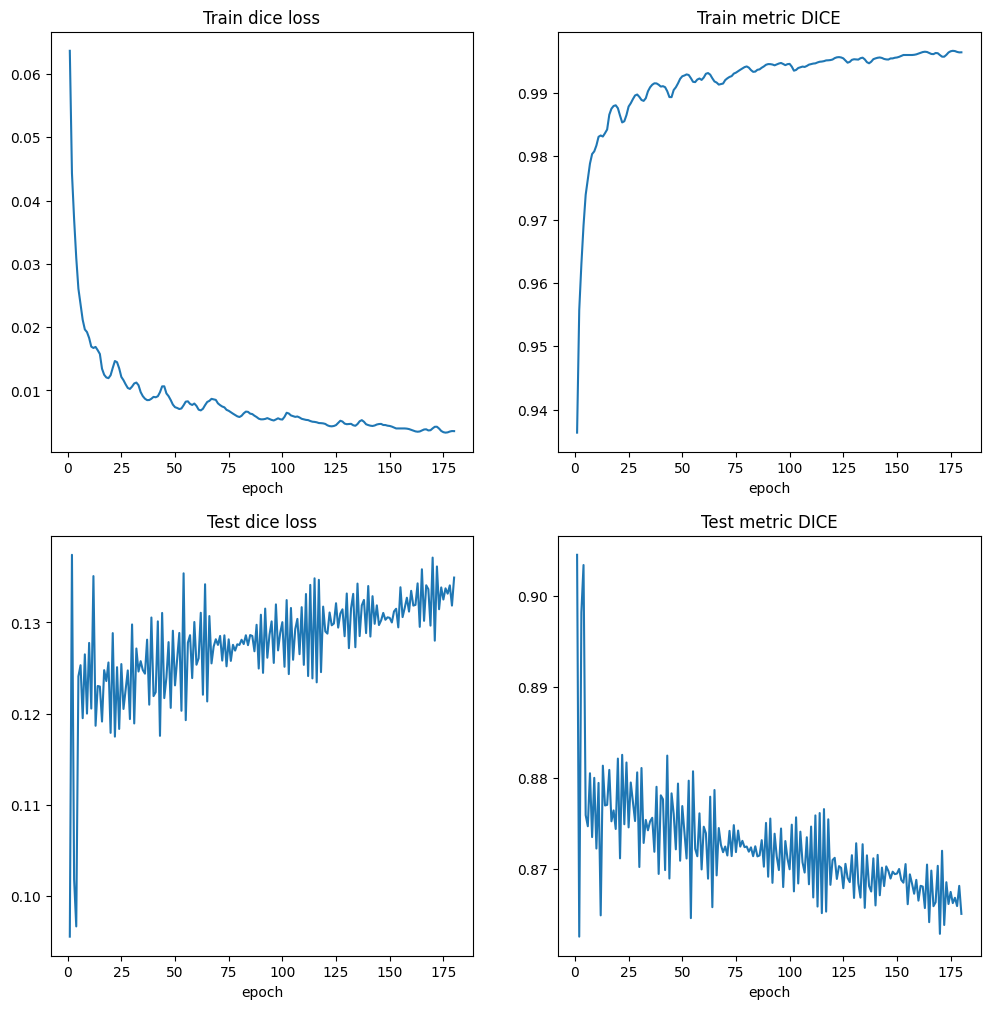

In [34]:
plt.figure("Results 25 june", (12, 12))
plt.subplot(2, 2, 1)
plt.title("Train dice loss")
x = [i + 1 for i in range(len(train_loss))]
y = train_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 2)
plt.title("Train metric DICE")
x = [i + 1 for i in range(len(train_metric))]
y = train_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 3)
plt.title("Test dice loss")
x = [i + 1 for i in range(len(test_loss))]
y = test_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 4)
plt.title("Test metric DICE")
x = [i + 1 for i in range(len(test_metric))]
y = test_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.show()

In [35]:
path_train_volumes = sorted(glob(os.path.join(data_dir, "TrainImages_7", "*.nii.gz")))
path_train_segmentation = sorted(glob(os.path.join(data_dir, "TrainLabels_7", "*.nii.gz")))

path_test_volumes = sorted(glob(os.path.join(data_dir, "TestImages_3", "*.nii.gz")))
path_test_segmentation = sorted(glob(os.path.join(data_dir, "TestLabels_3", "*.nii.gz")))

train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_train_volumes, path_train_segmentation)]
test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_test_volumes, path_test_segmentation)]
test_files = test_files[0:9]

In [36]:
test_transforms = Compose(
    [
        LoadImaged(keys=["vol", "seg"]),
        EnsureChannelFirstd(keys=["vol", "seg"]),
        Spacingd(keys=["vol", "seg"], pixdim=(1.5,1.5,1.0), mode=("bilinear", "nearest")),
        Orientationd(keys=["vol", "seg"], axcodes="RAS"),
        ScaleIntensityRanged(keys=["vol"], a_min=-200, a_max=200,b_min=0.0, b_max=1.0, clip=True), 
        CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
        Resized(keys=["vol", "seg"], spatial_size=[128,128,64]),   
        ToTensord(keys=["vol", "seg"]),
    ]
)

In [37]:
test_ds = Dataset(data=test_files, transform=test_transforms)
test_loader = DataLoader(test_ds, batch_size=1)

In [38]:
device = torch.device(device)
model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256), 
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
).to(device)

In [39]:
model.load_state_dict(torch.load(
    os.path.join(model_dir, "best_metric_model.pth")))
model.eval()

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(


In [ ]:
# sw_batch_size = 4
# roi_size = (128, 128, 64)
# with torch.no_grad():
#     test_patient = first(test_loader)
#     t_volume = test_patient['vol']
#     #t_segmentation = test_patient['seg']
    
#     test_outputs = sliding_window_inference(t_volume.to(device), roi_size, sw_batch_size, model)
#     sigmoid_activation = Activations(sigmoid=True)
#     test_outputs = sigmoid_activation(test_outputs)
#     test_outputs = test_outputs > 0.53
        
#     for i in range(32):
#         # plot the slice [:, :, 80]
#         plt.figure("check", (18, 6))
#         plt.subplot(1, 3, 1)
#         plt.title(f"image {i}")
#         plt.imshow(test_patient["vol"][0, 0, :, :, i], cmap="gray")
#         plt.subplot(1, 3, 2)
#         plt.title(f"label {i}")
#         plt.imshow(test_patient["seg"][0, 0, :, :, i] != 0)
#         plt.subplot(1, 3, 3)
#         plt.title(f"output {i}")
#         plt.imshow(test_outputs.detach().cpu()[0, 1, :, :, i])
#         plt.show()

Processing Patient 1...


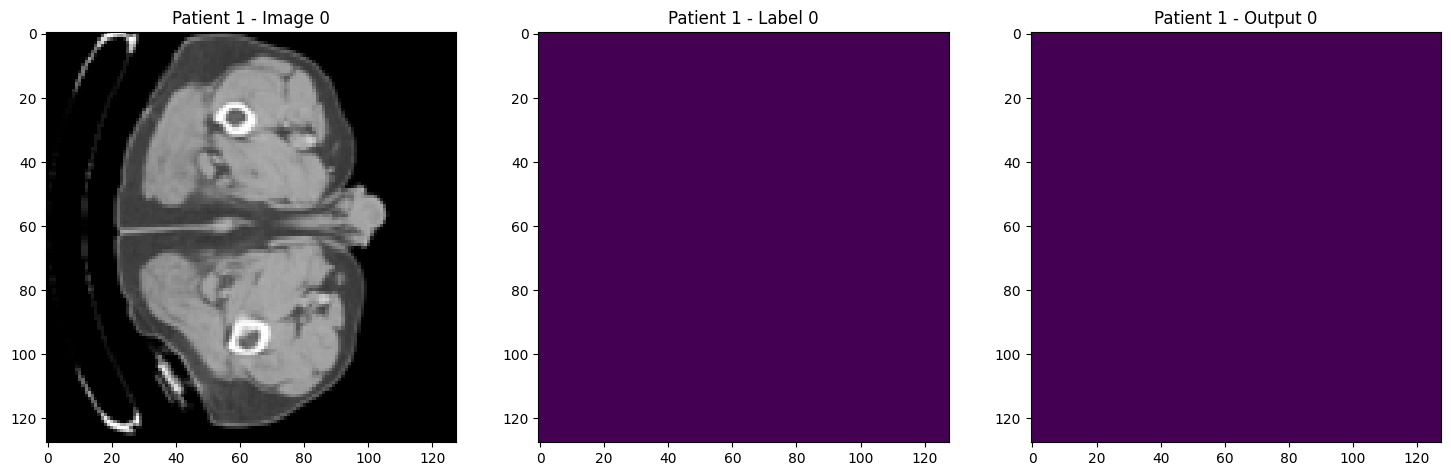

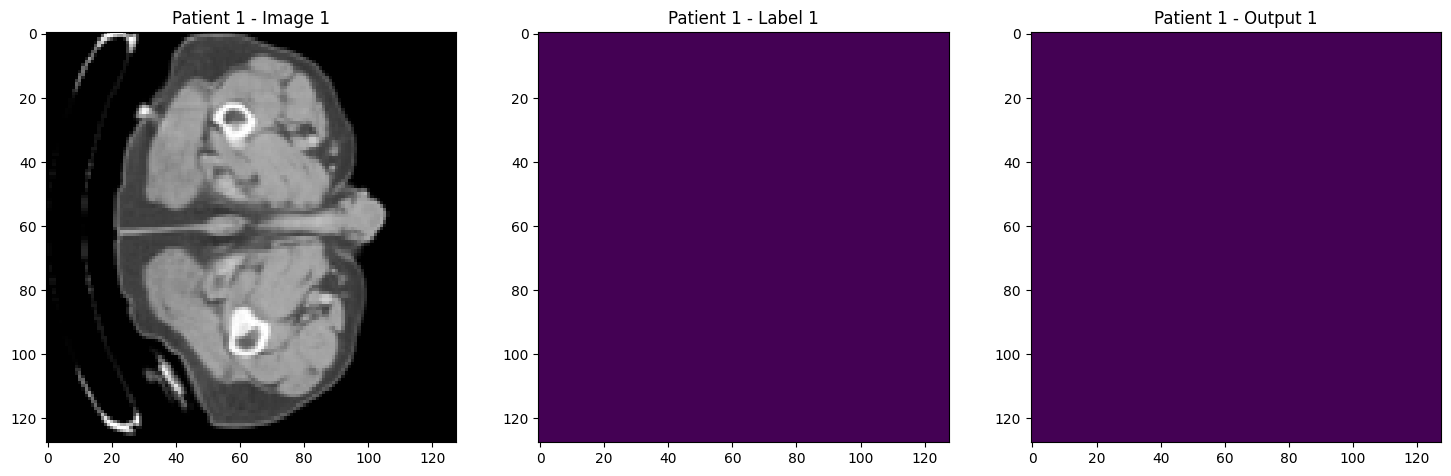

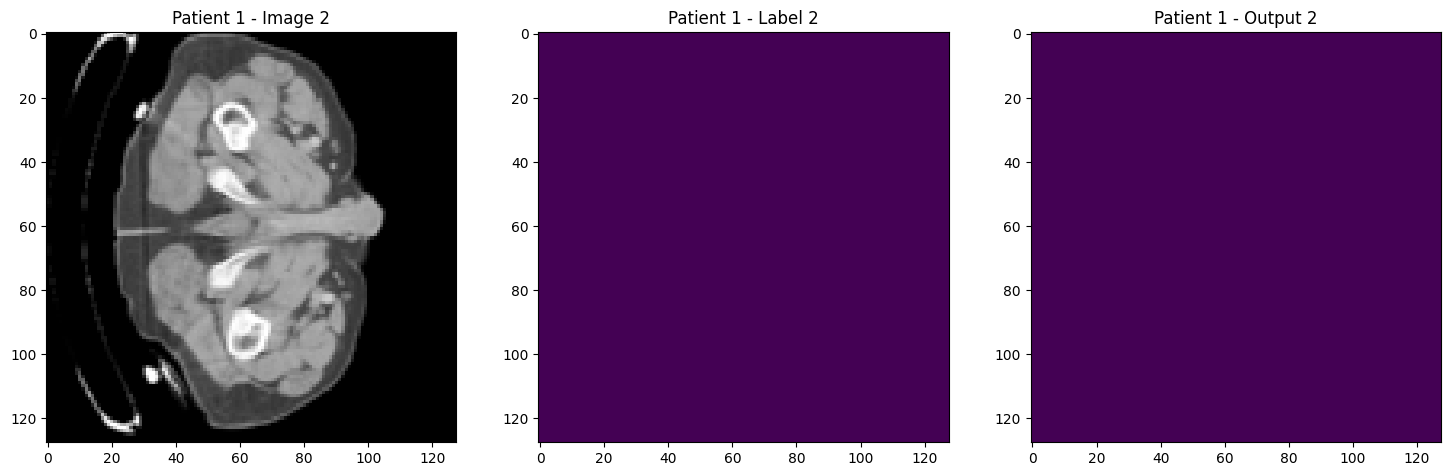

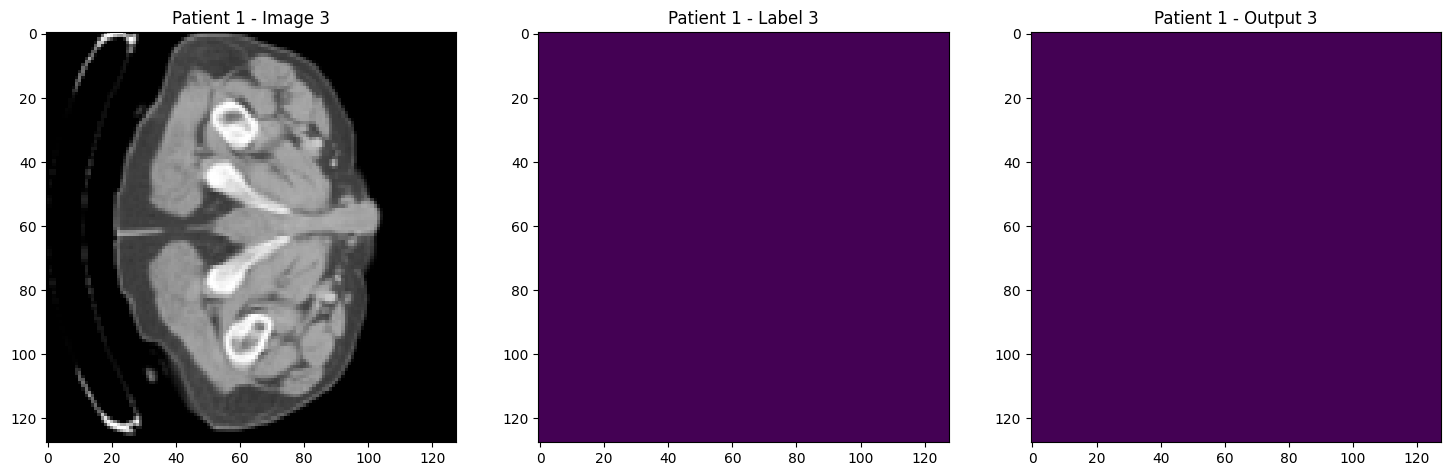

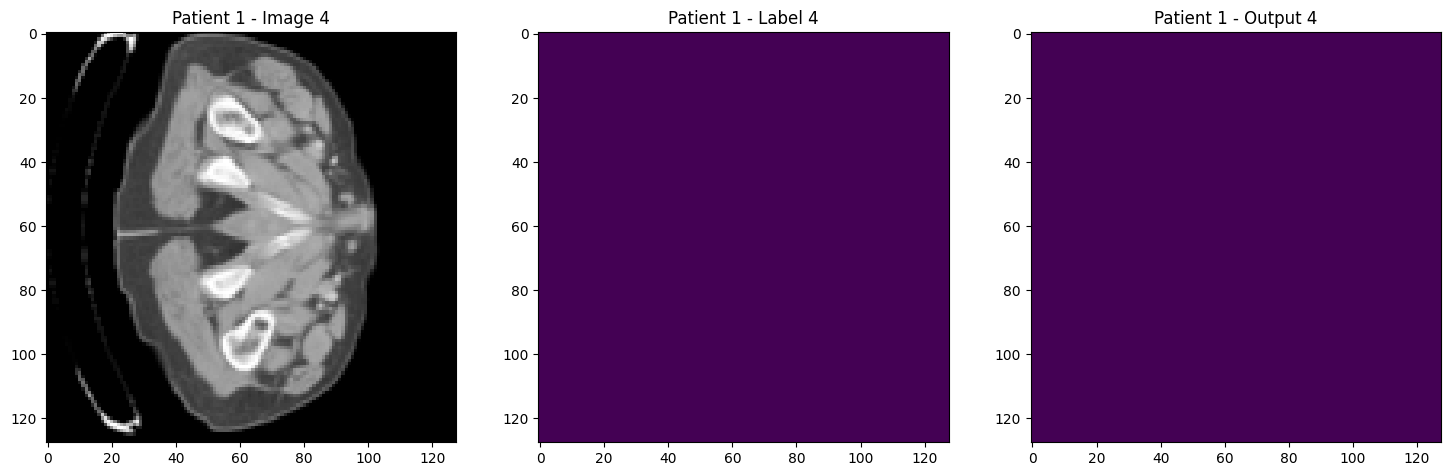

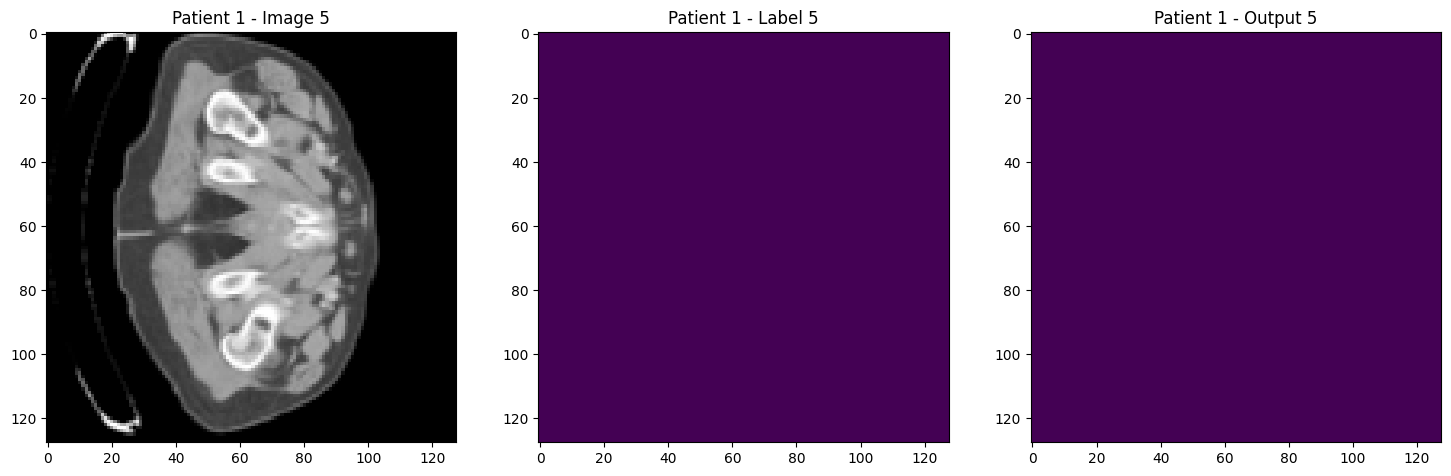

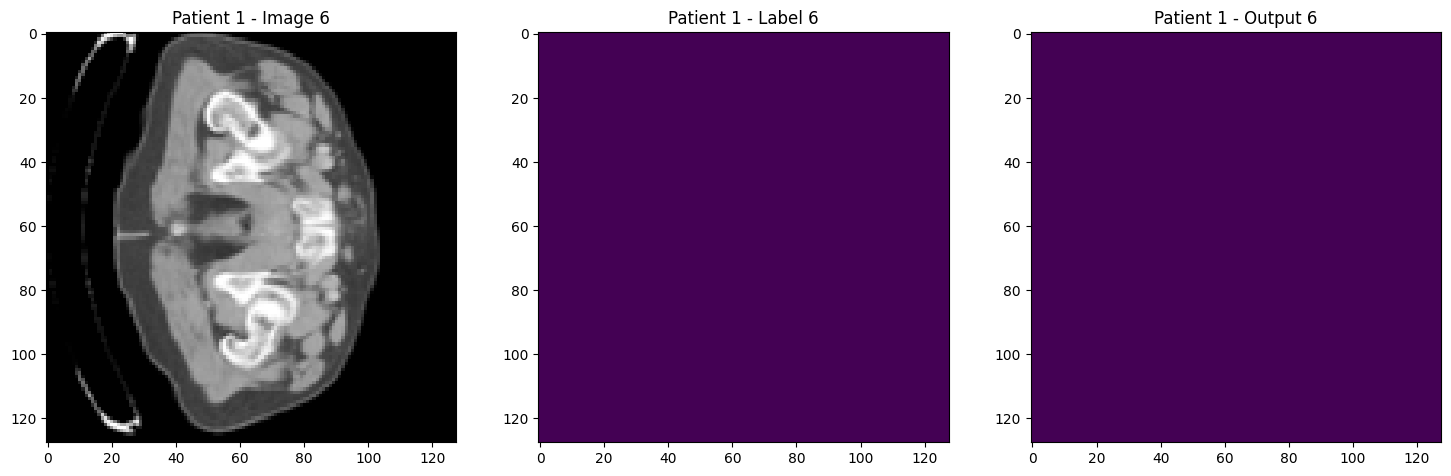

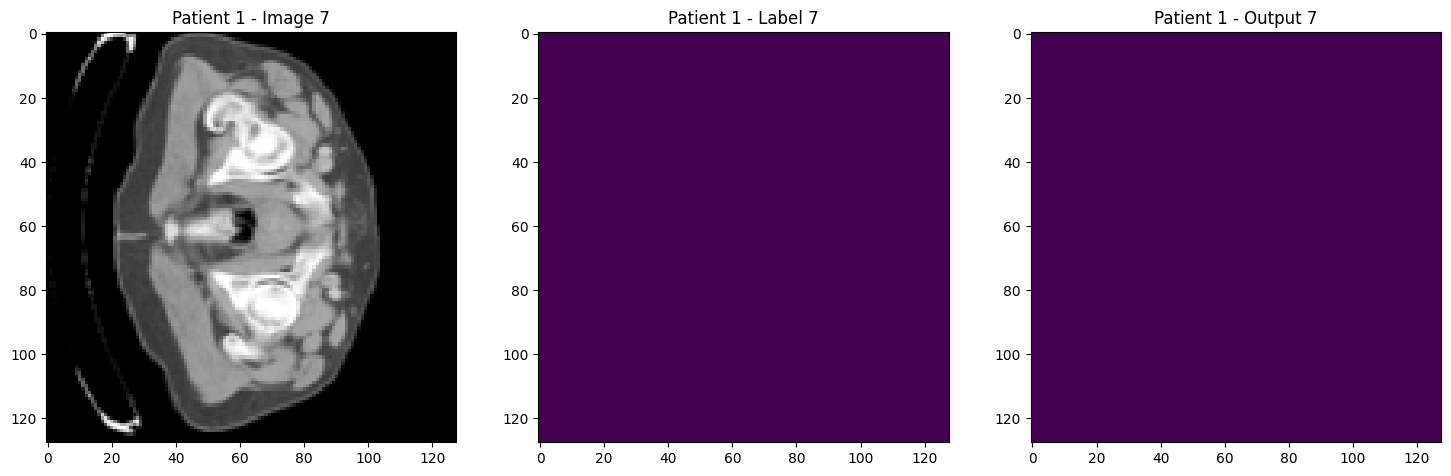

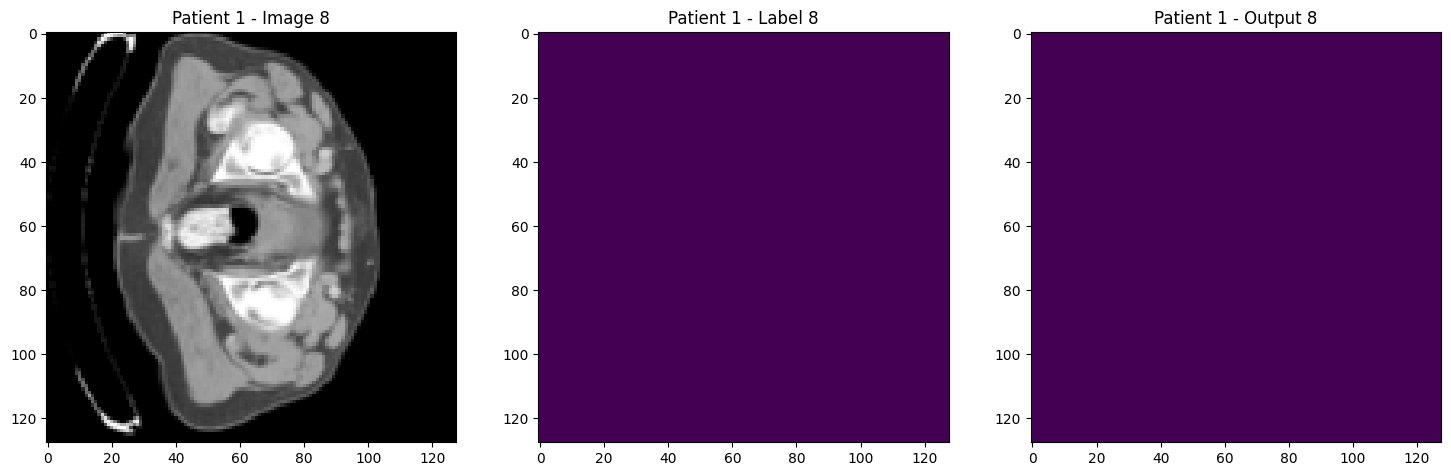

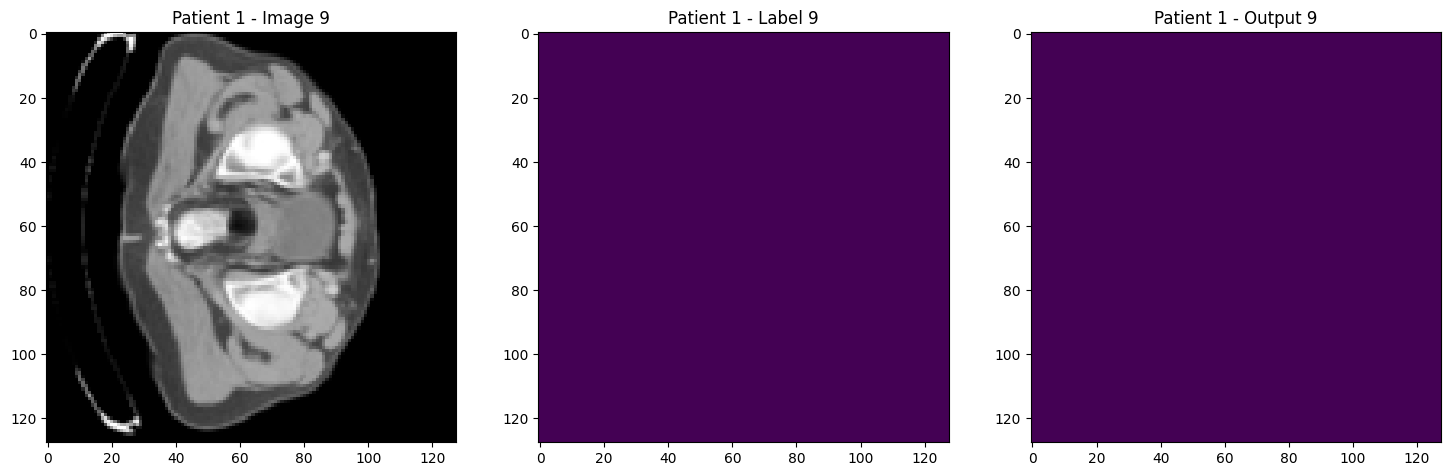

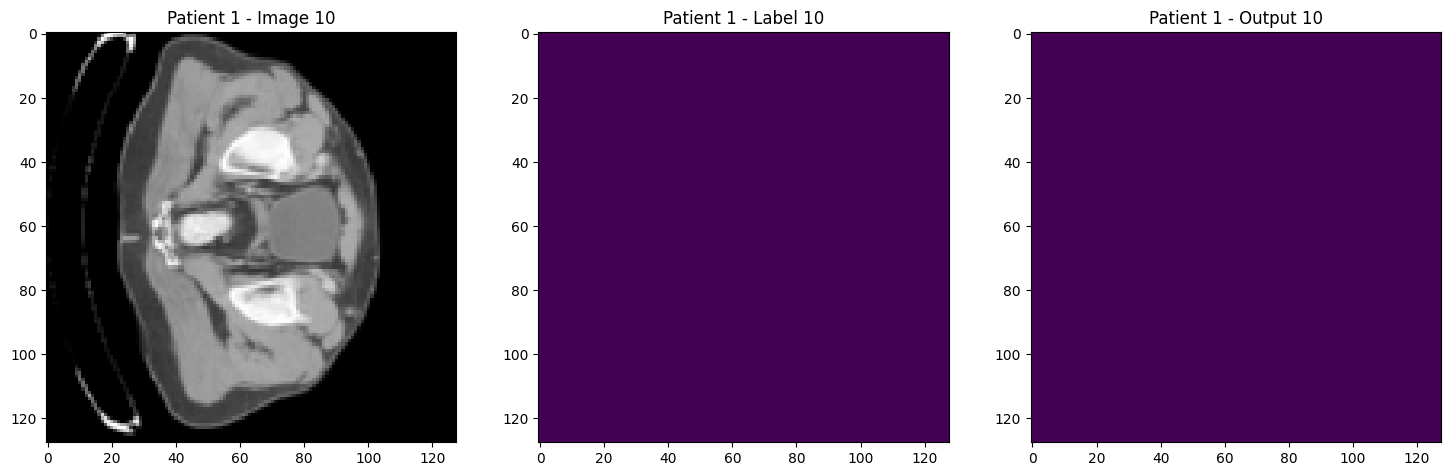

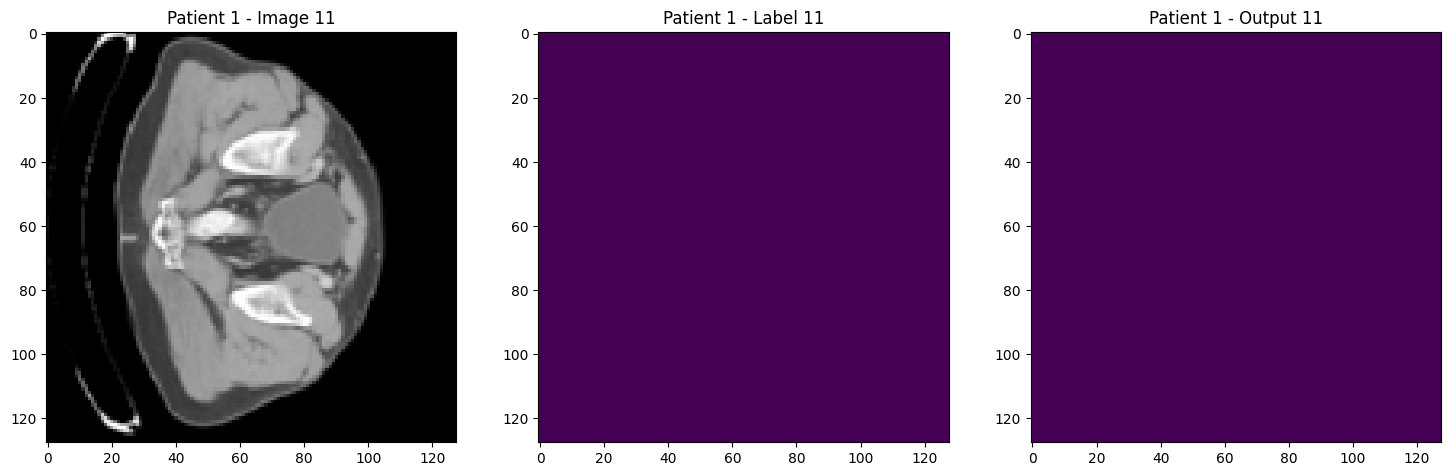

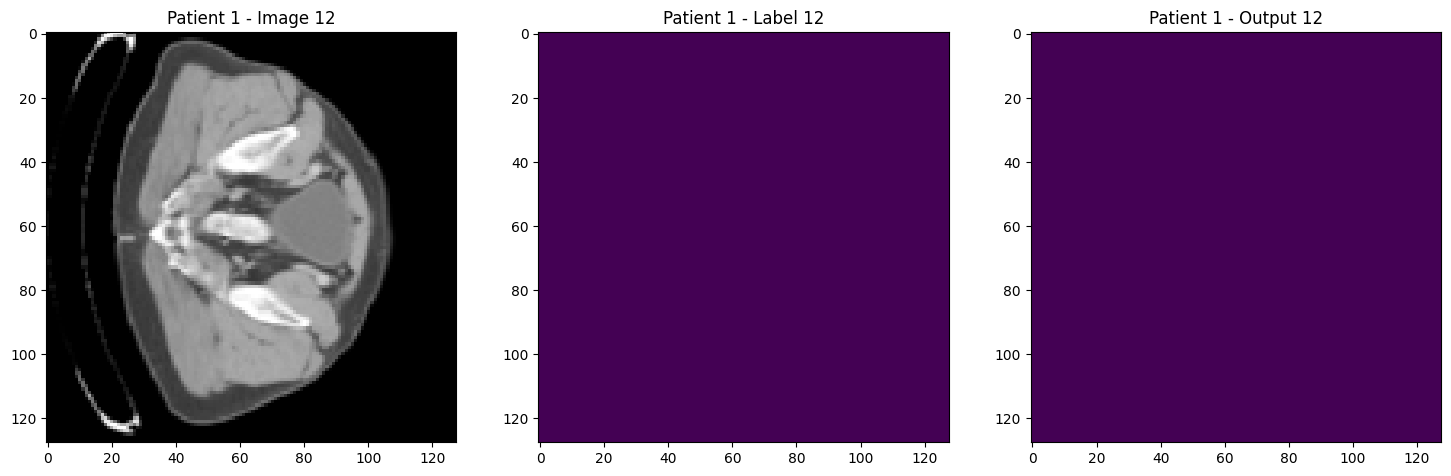

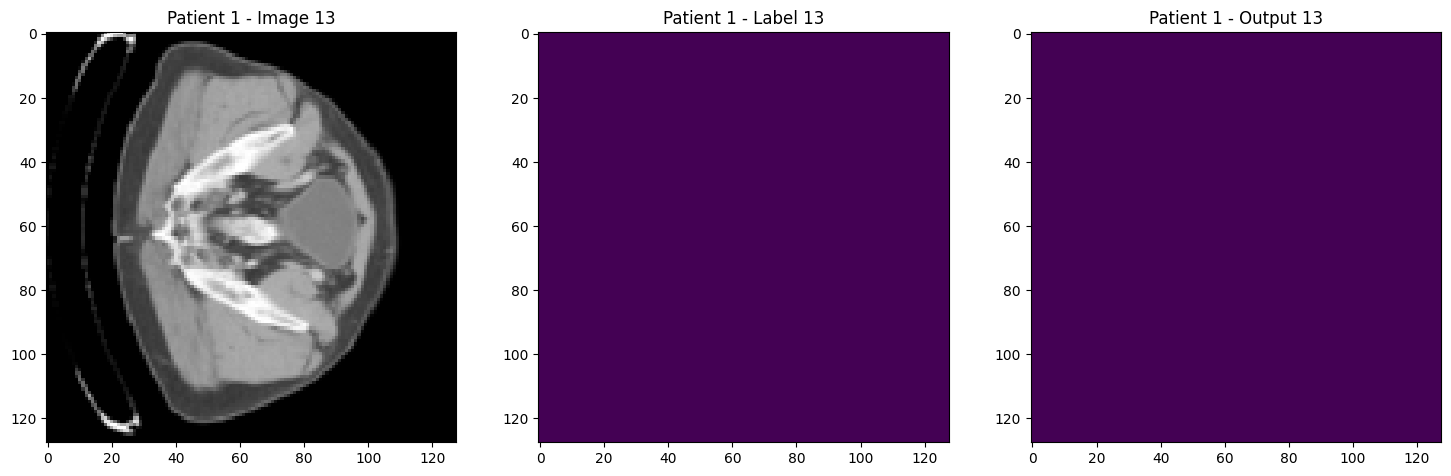

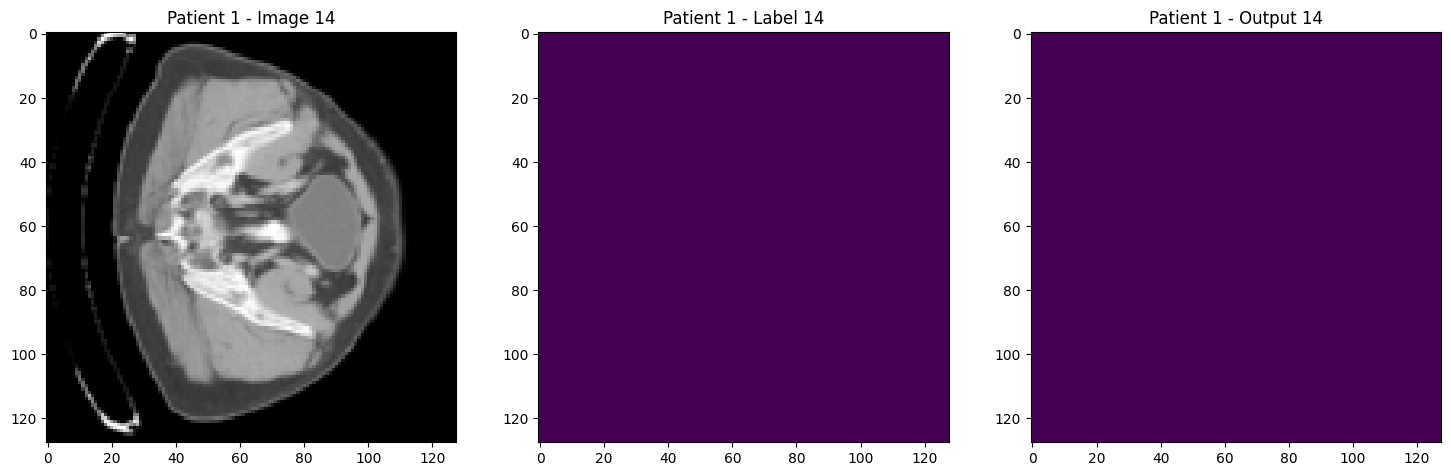

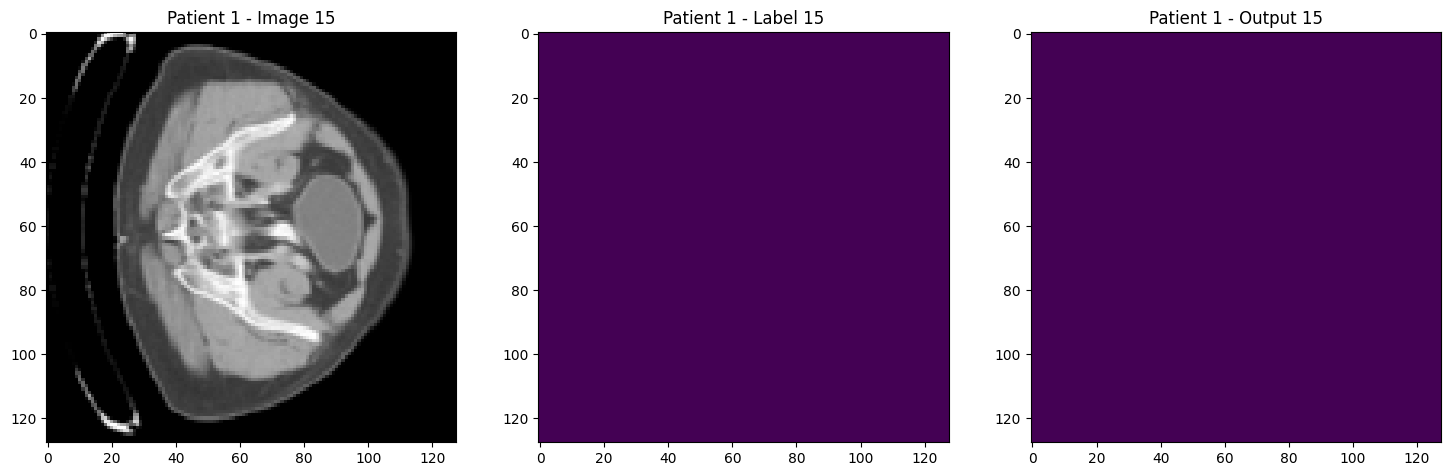

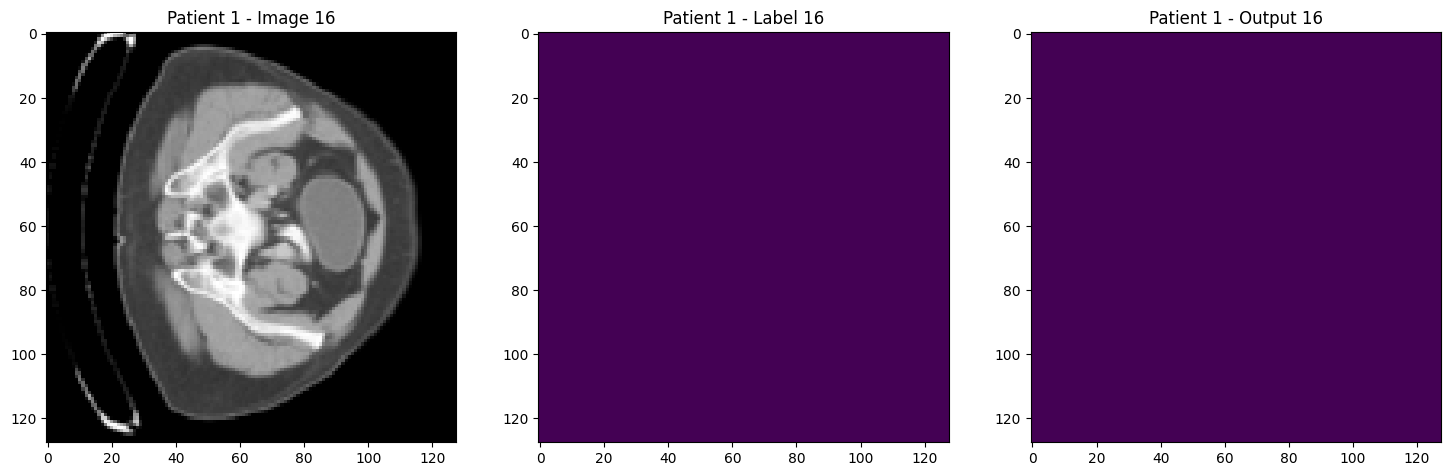

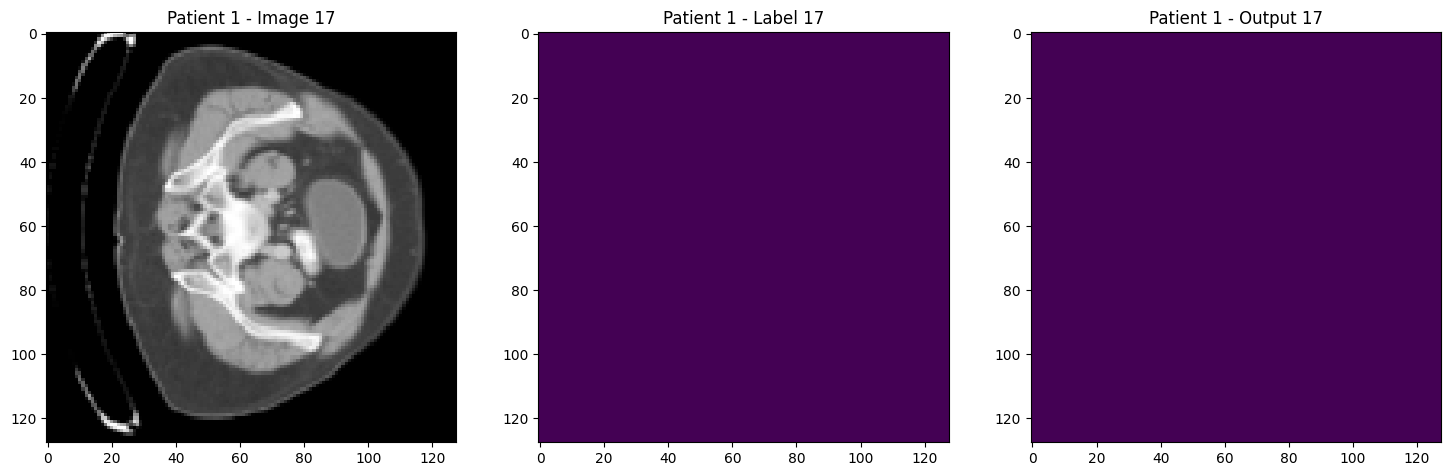

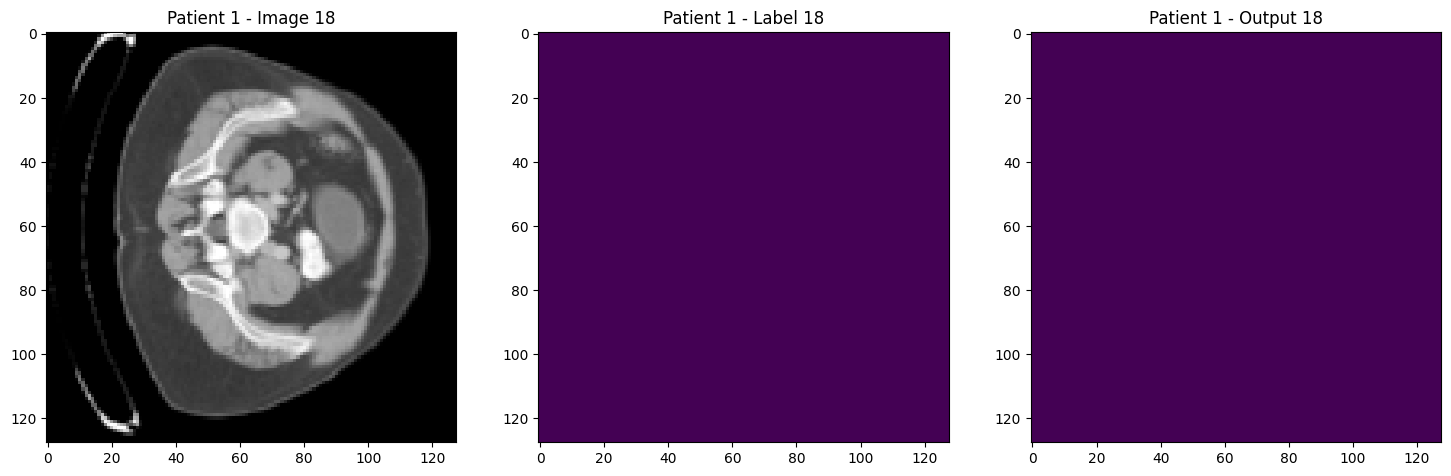

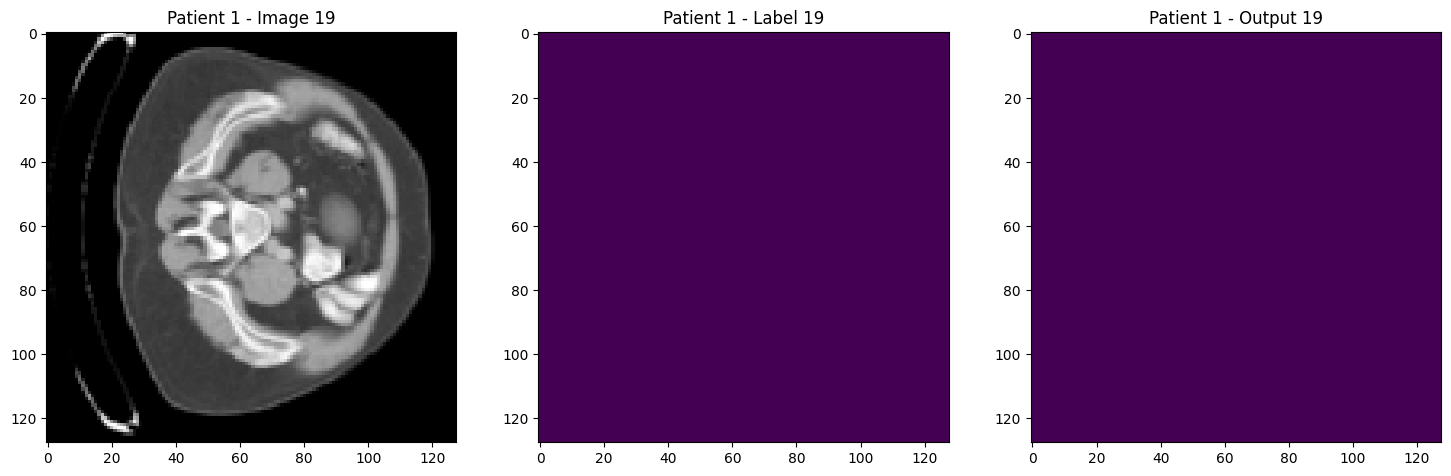

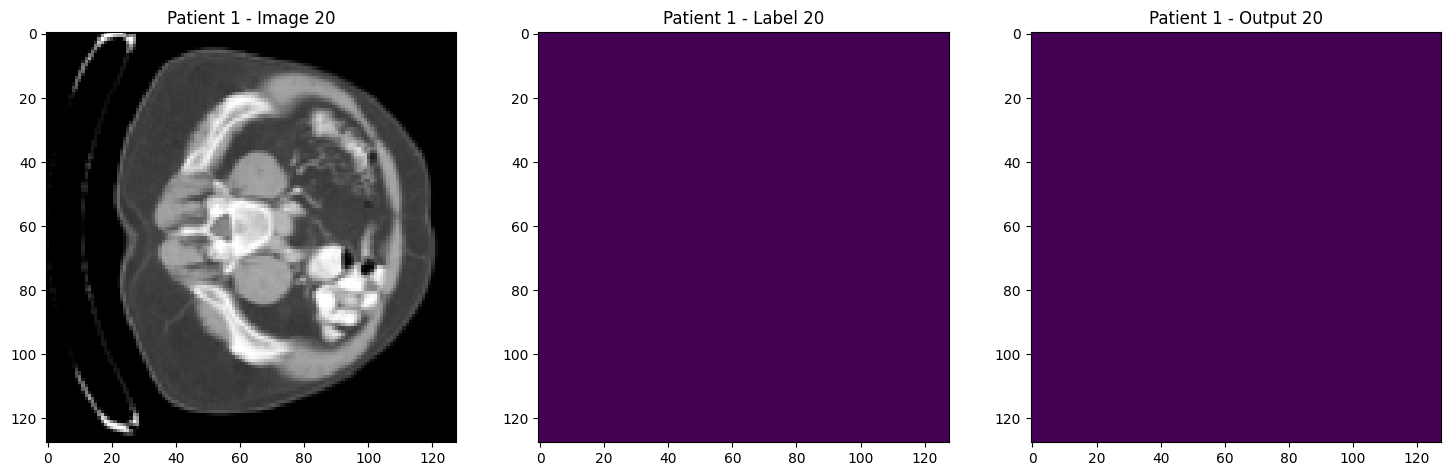

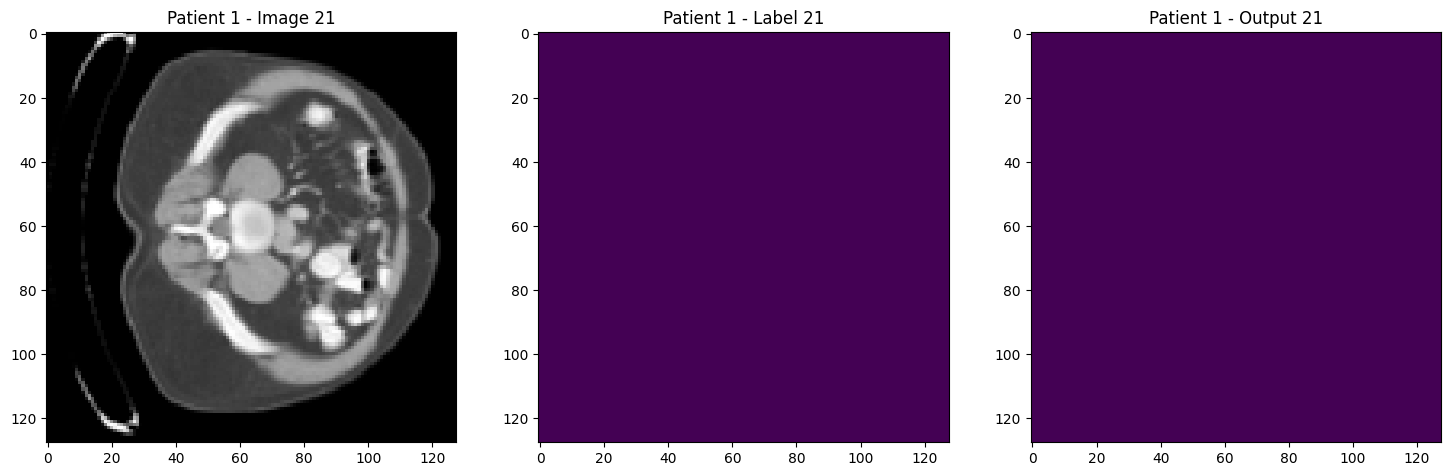

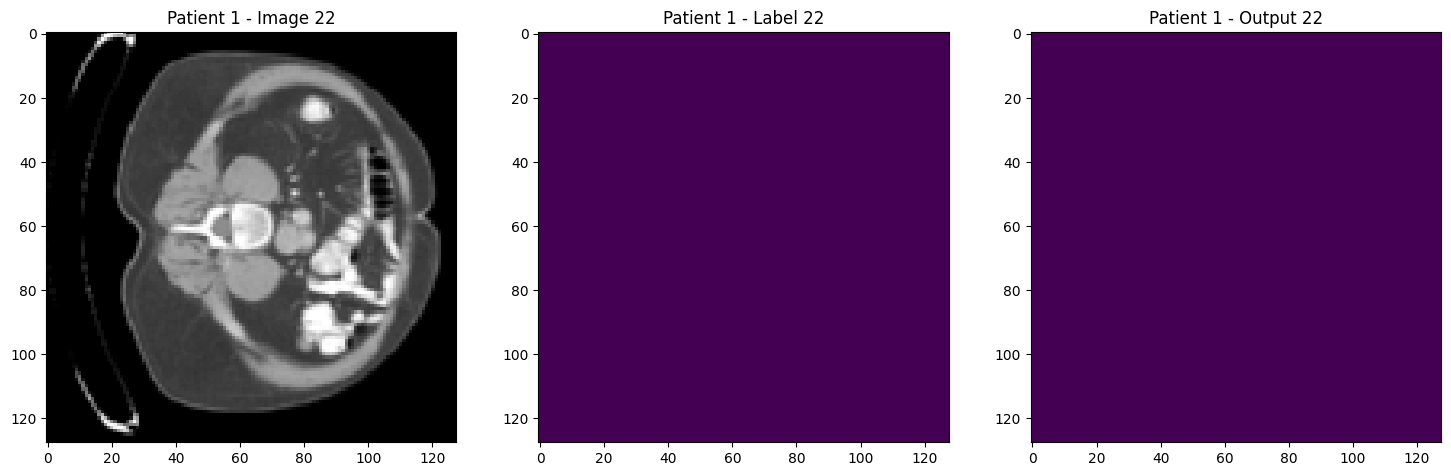

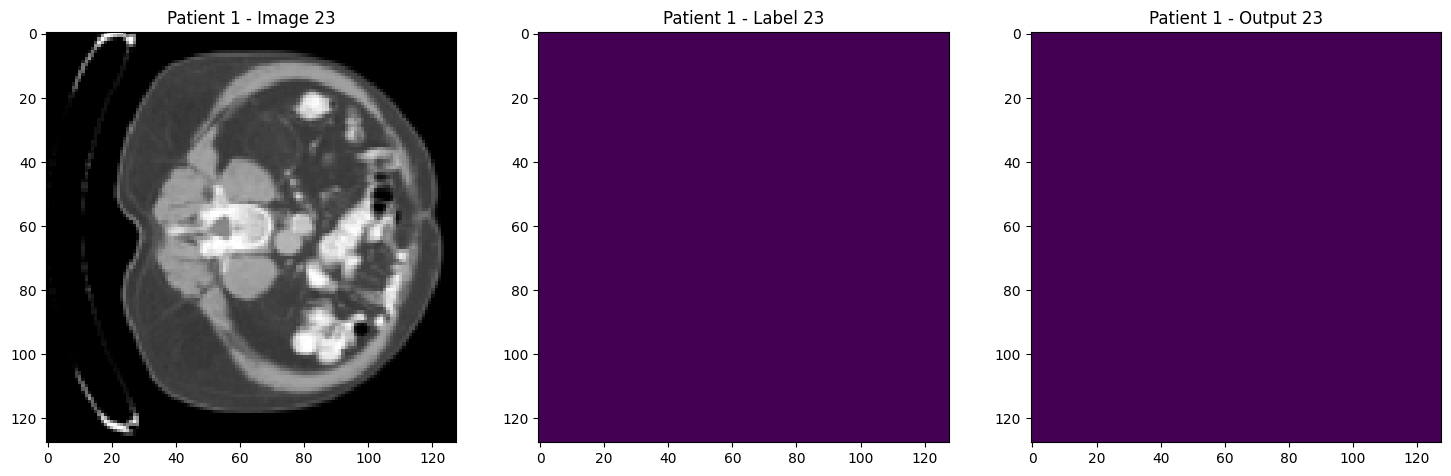

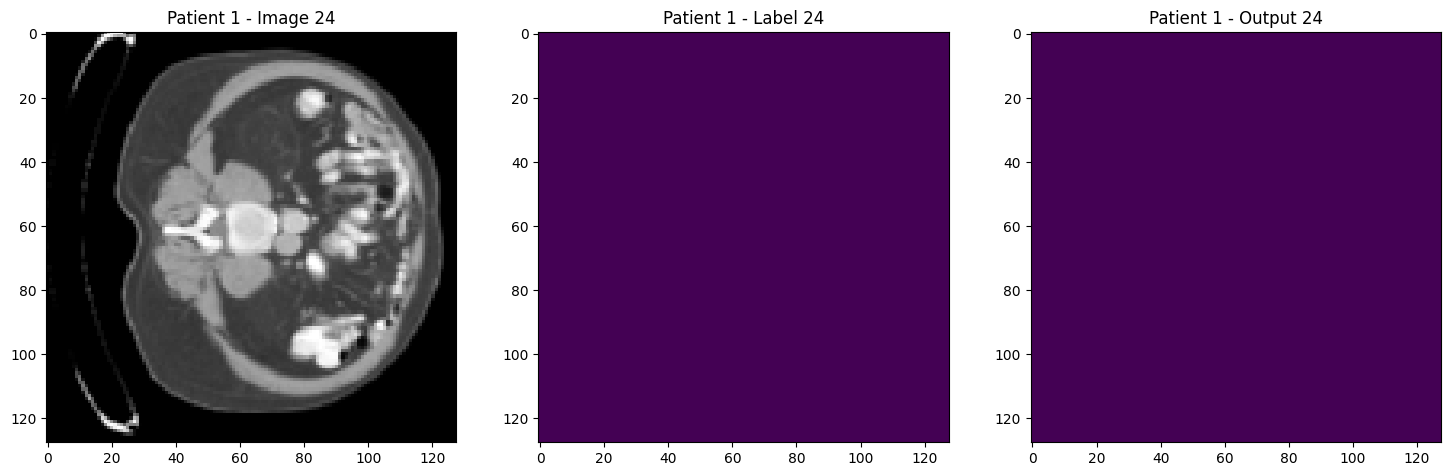

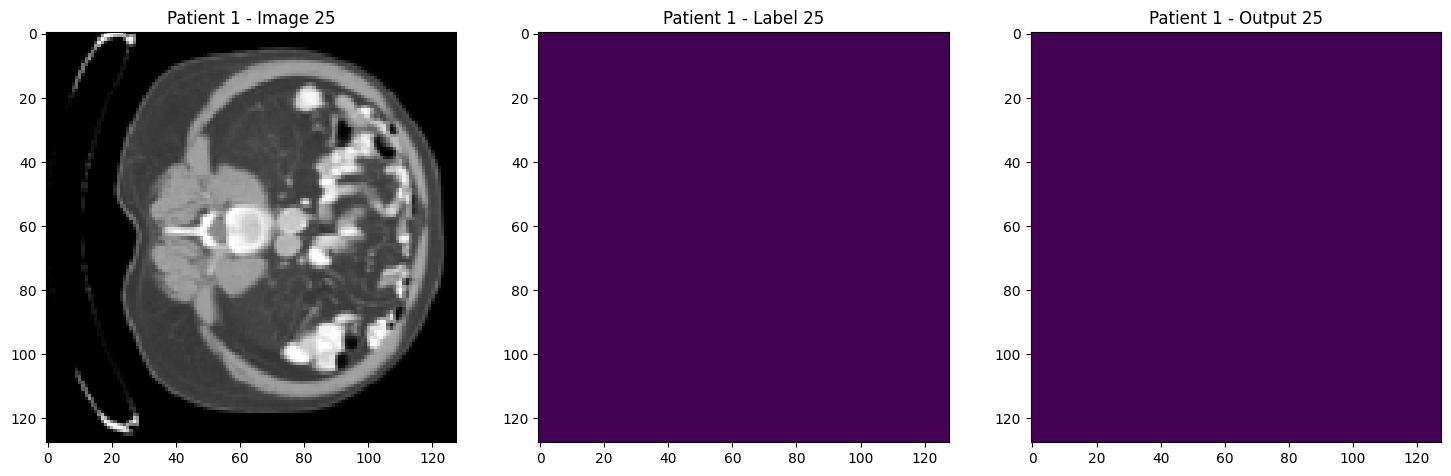

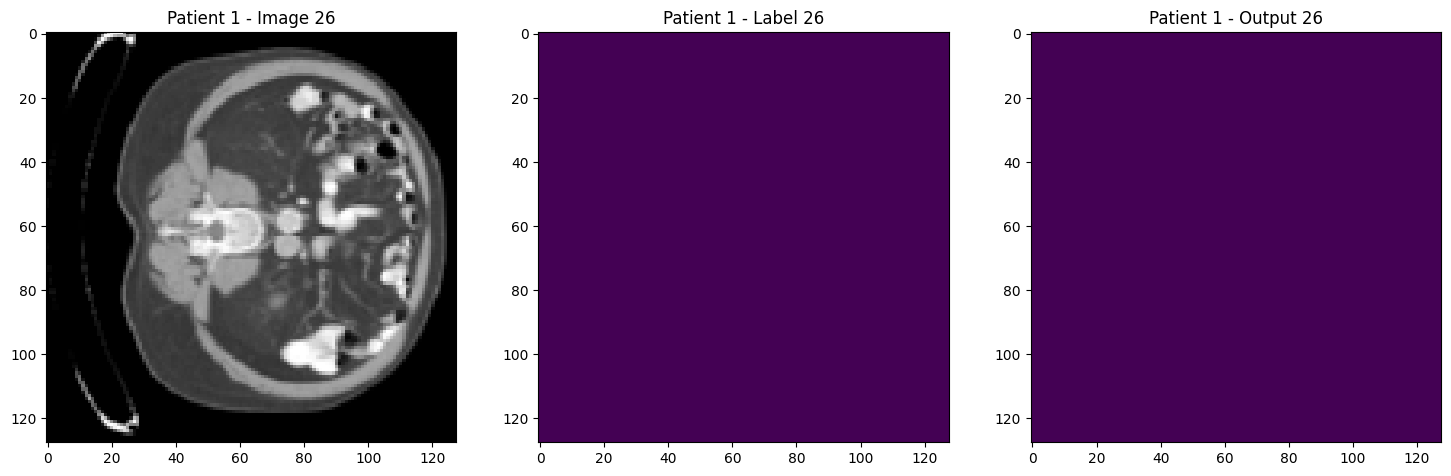

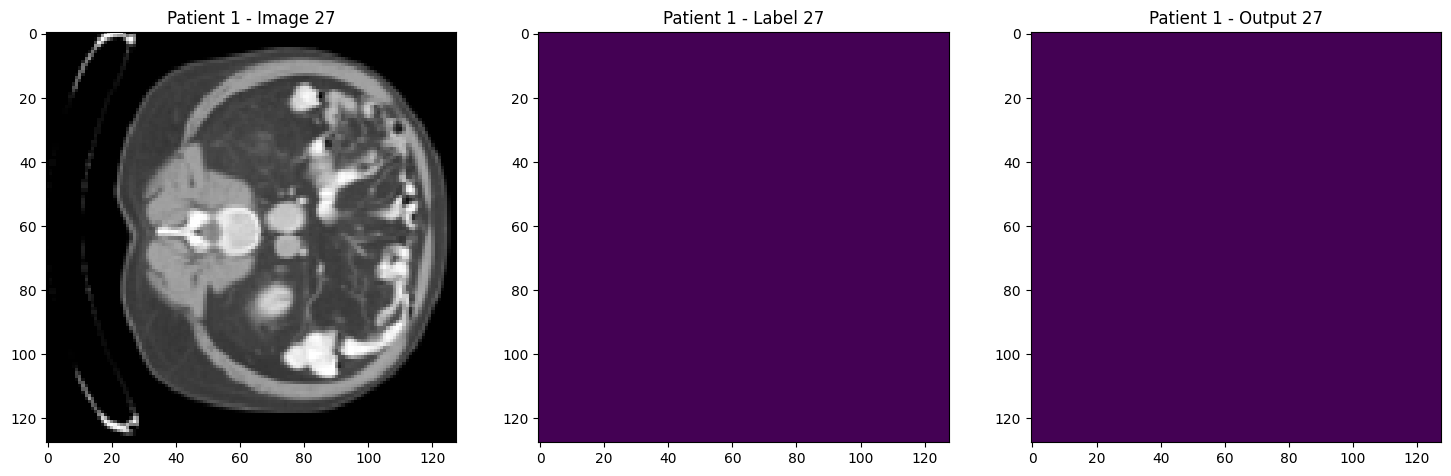

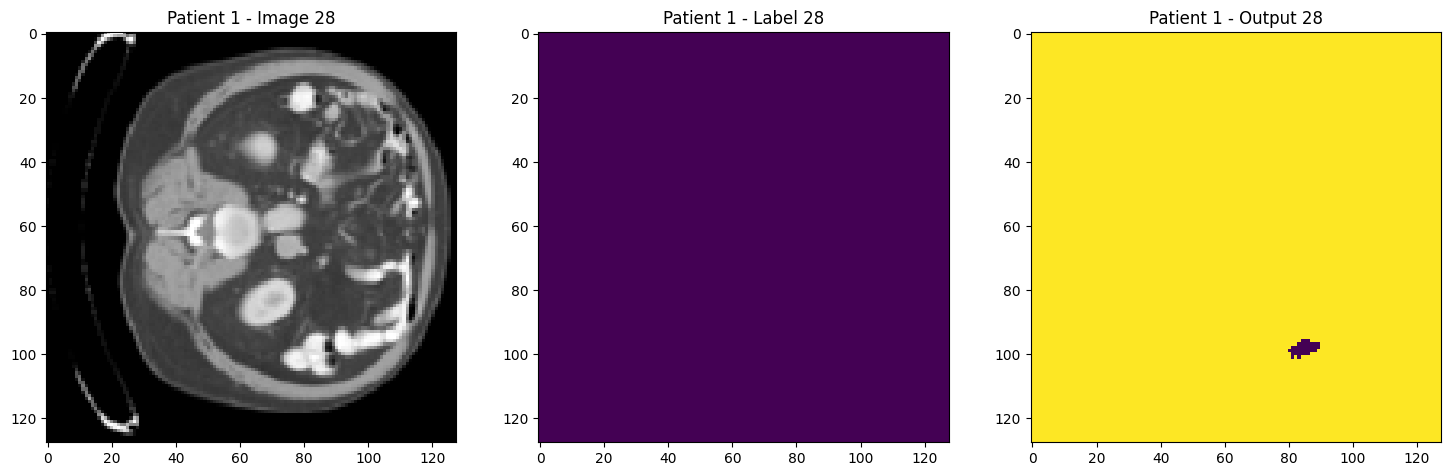

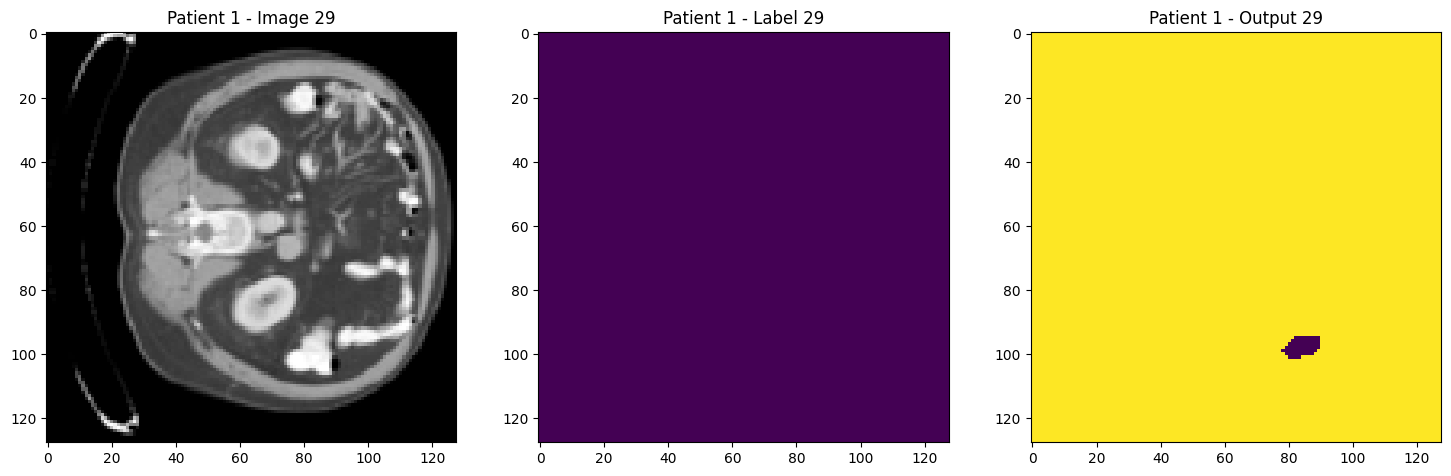

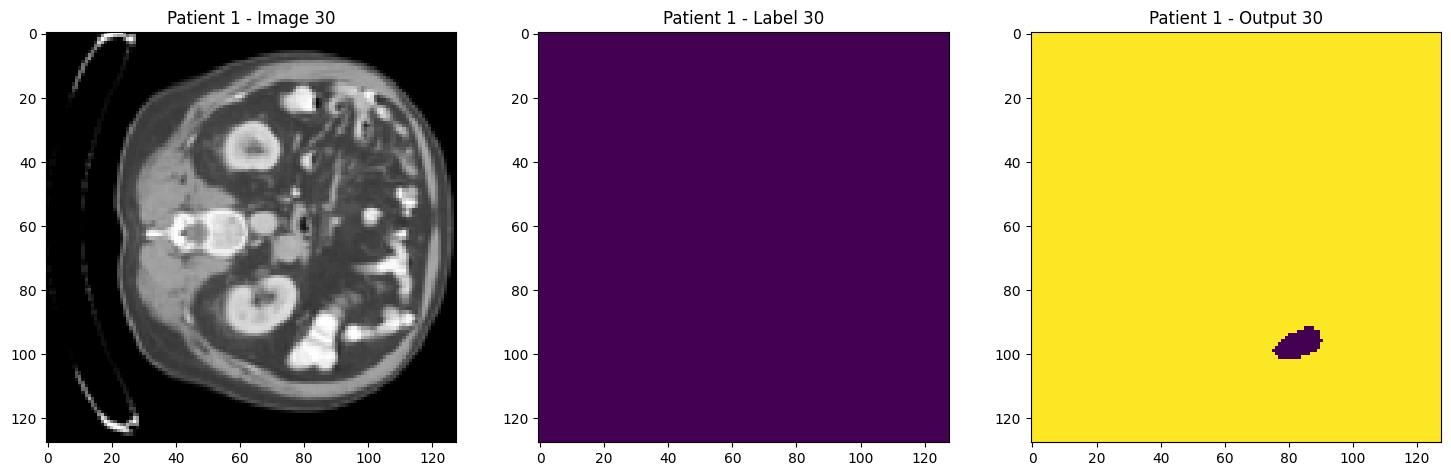

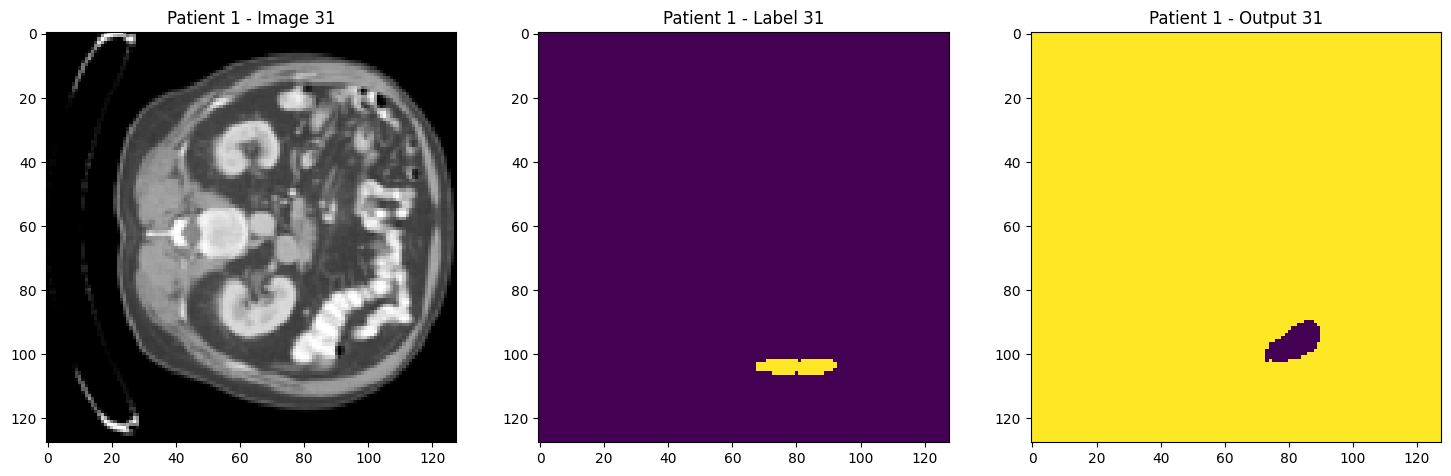

Processing Patient 2...


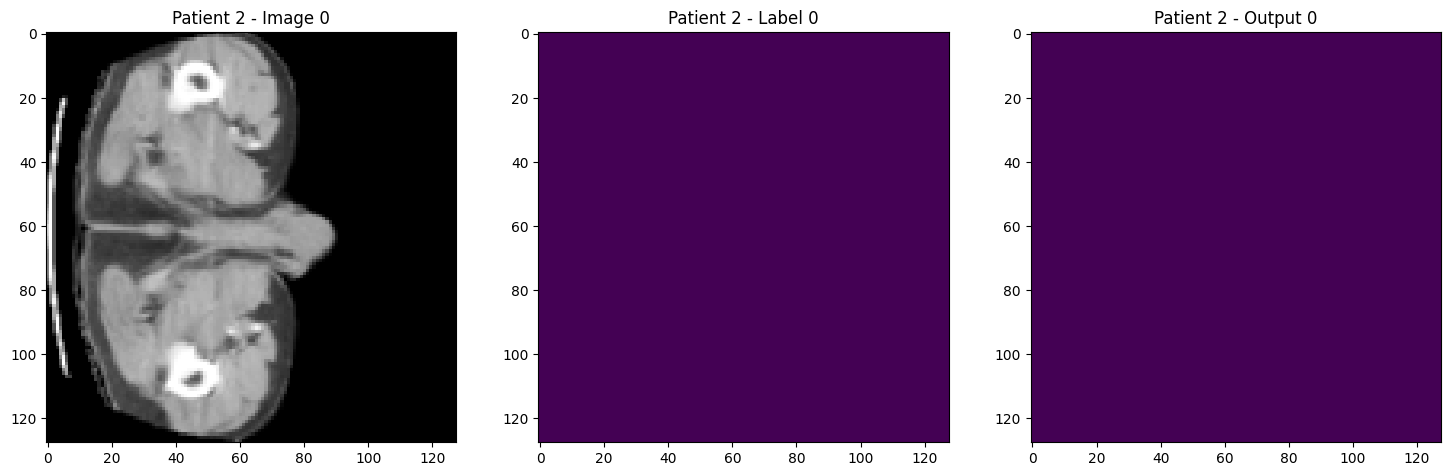

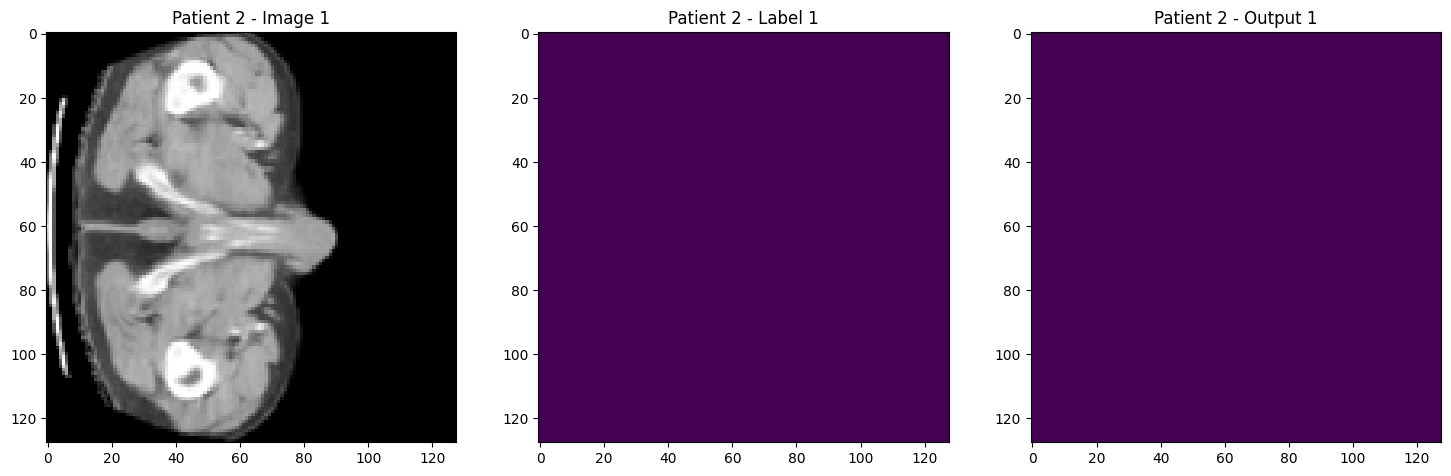

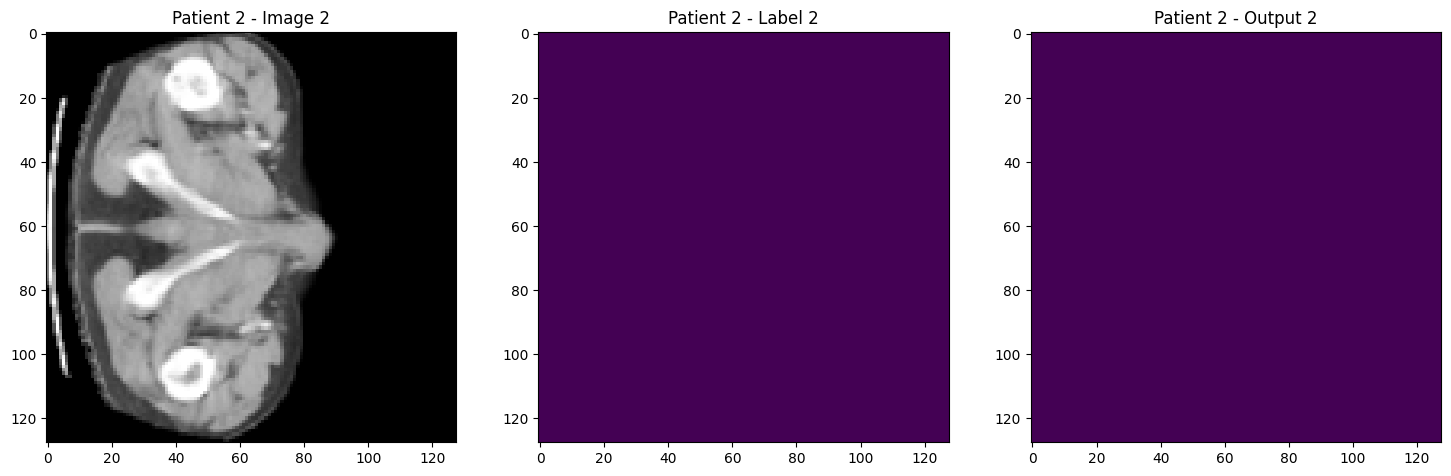

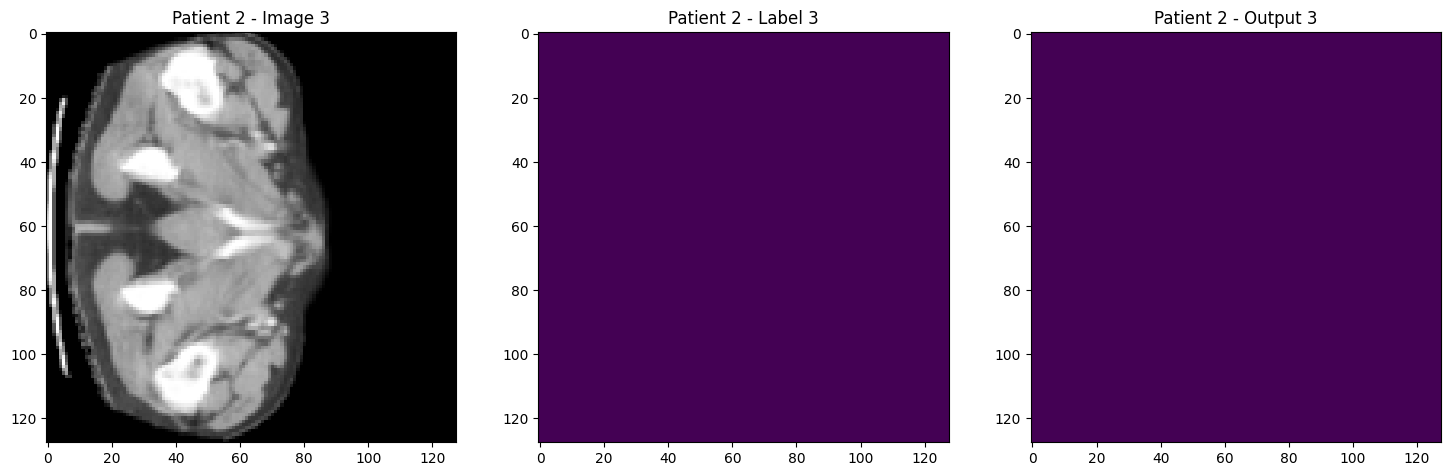

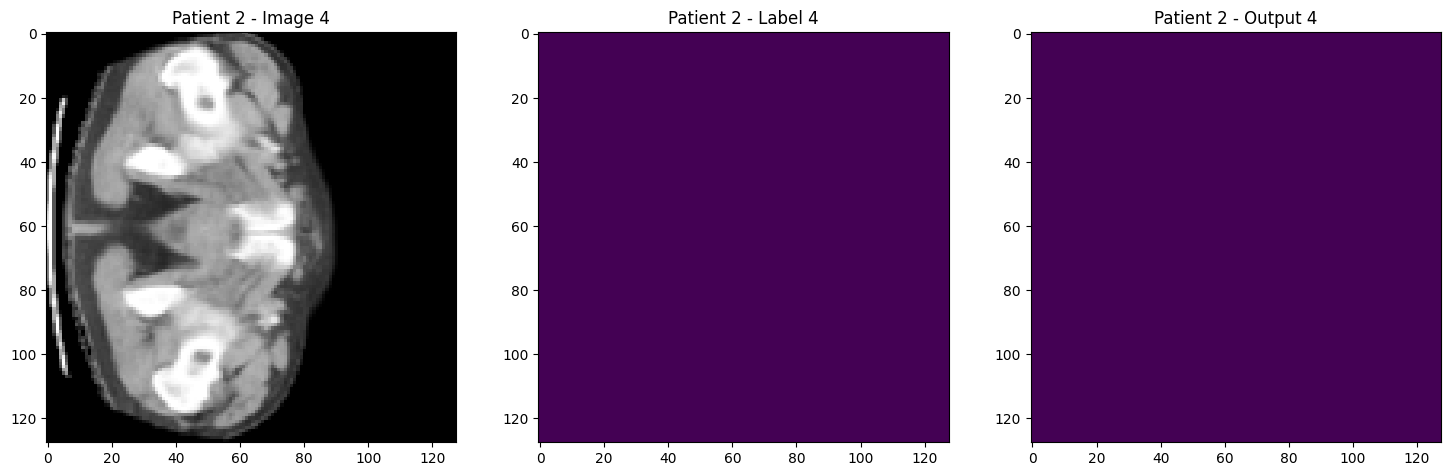

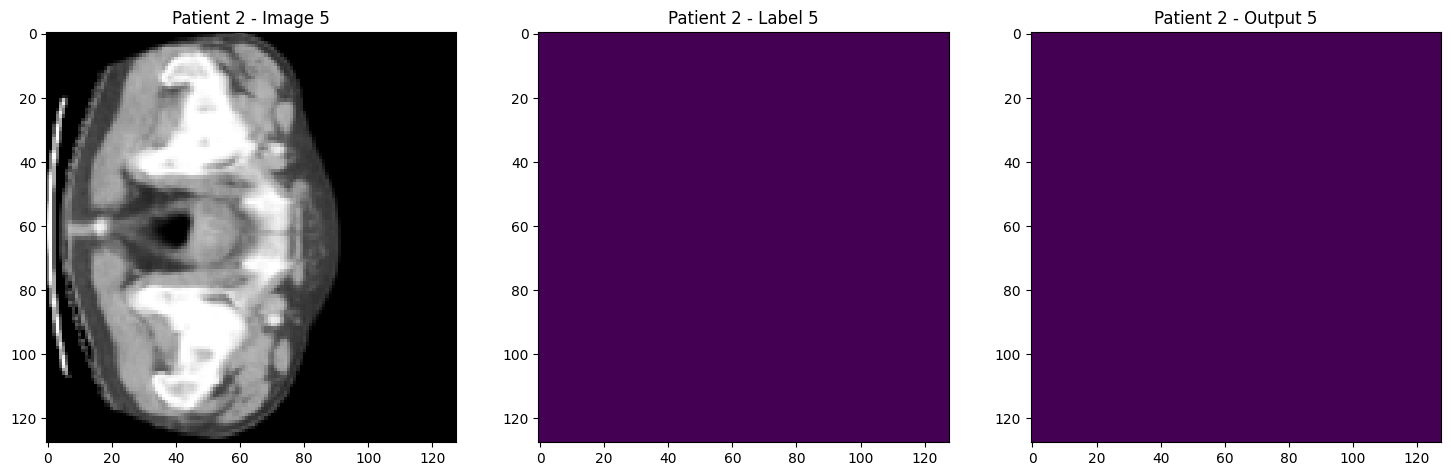

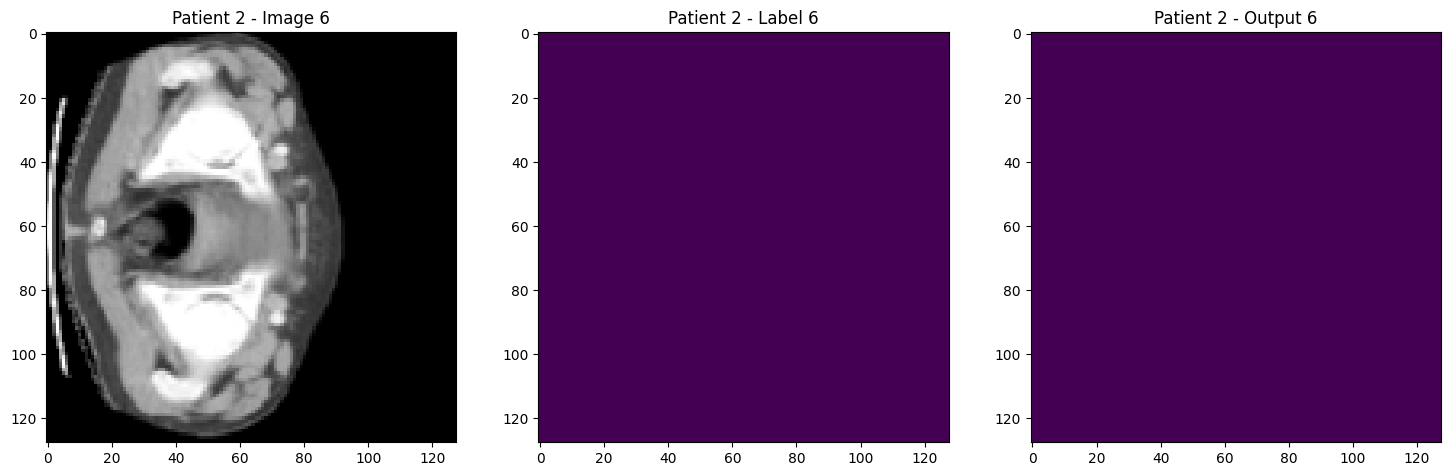

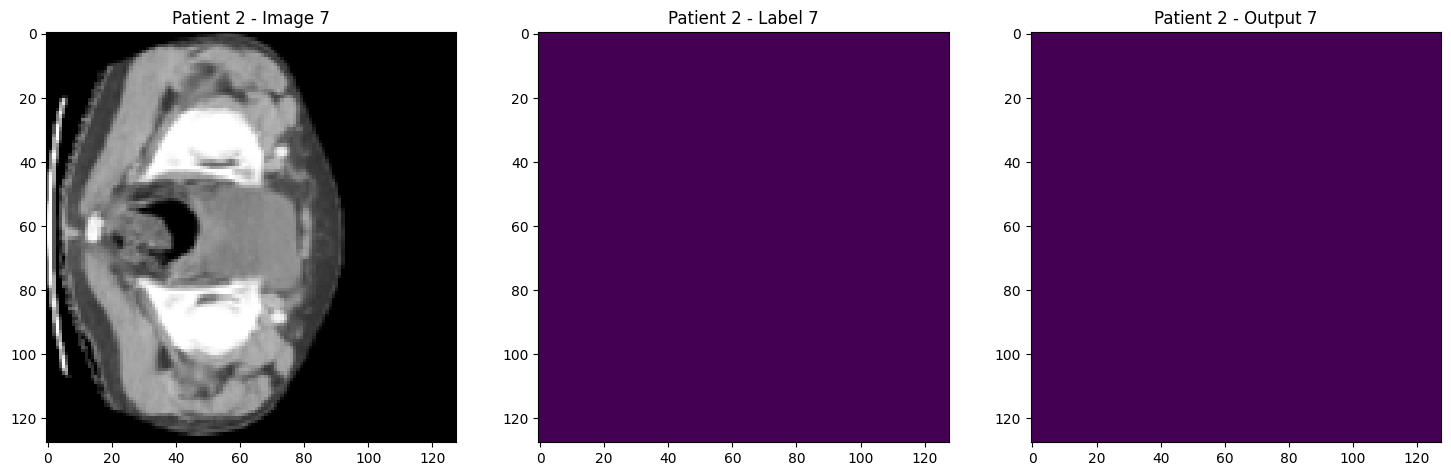

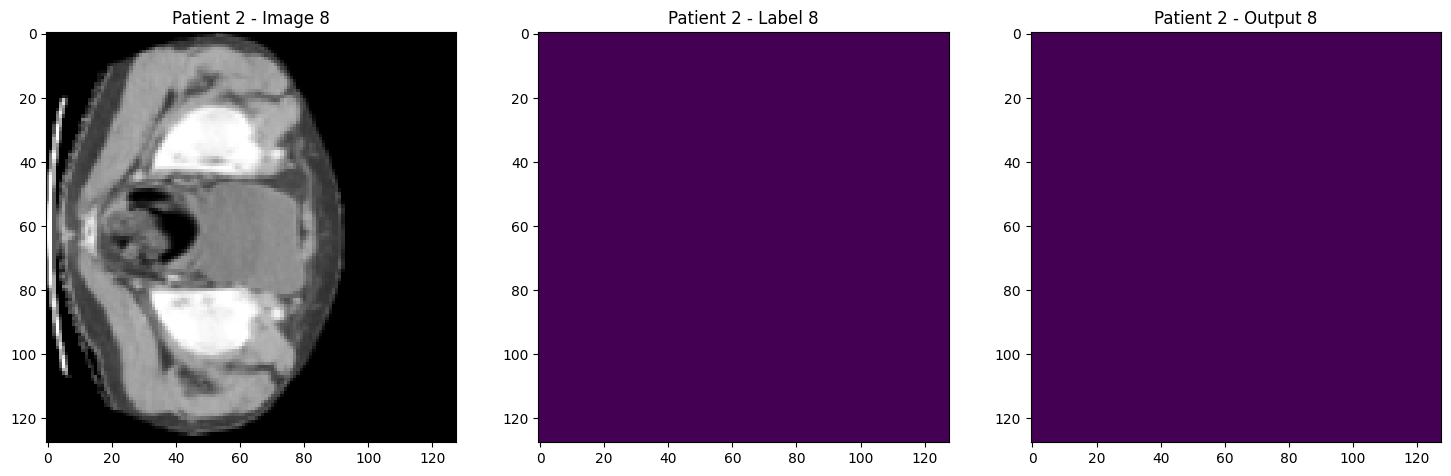

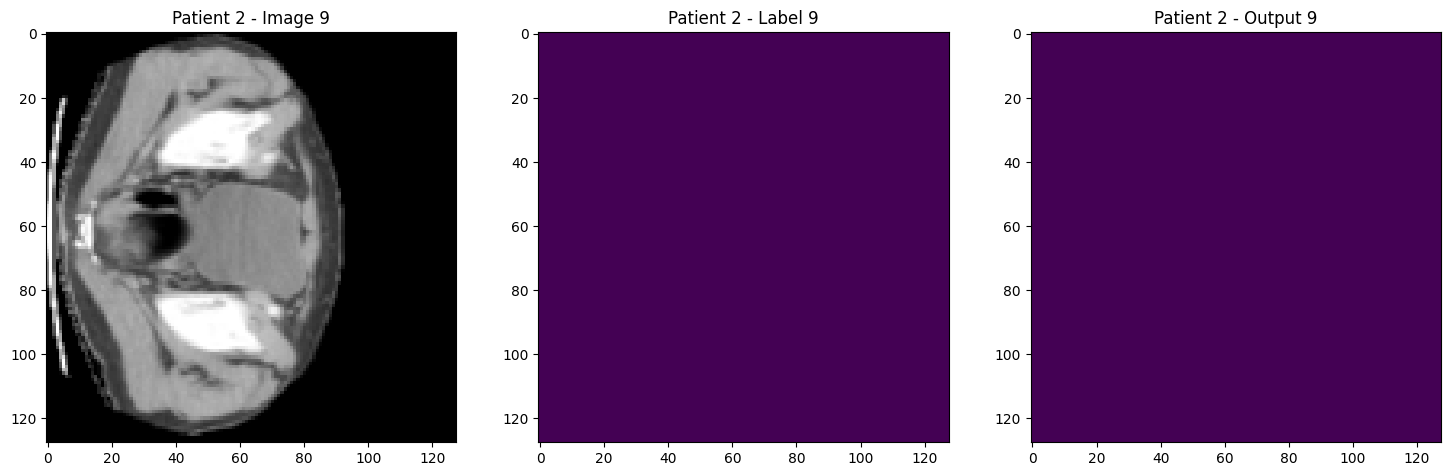

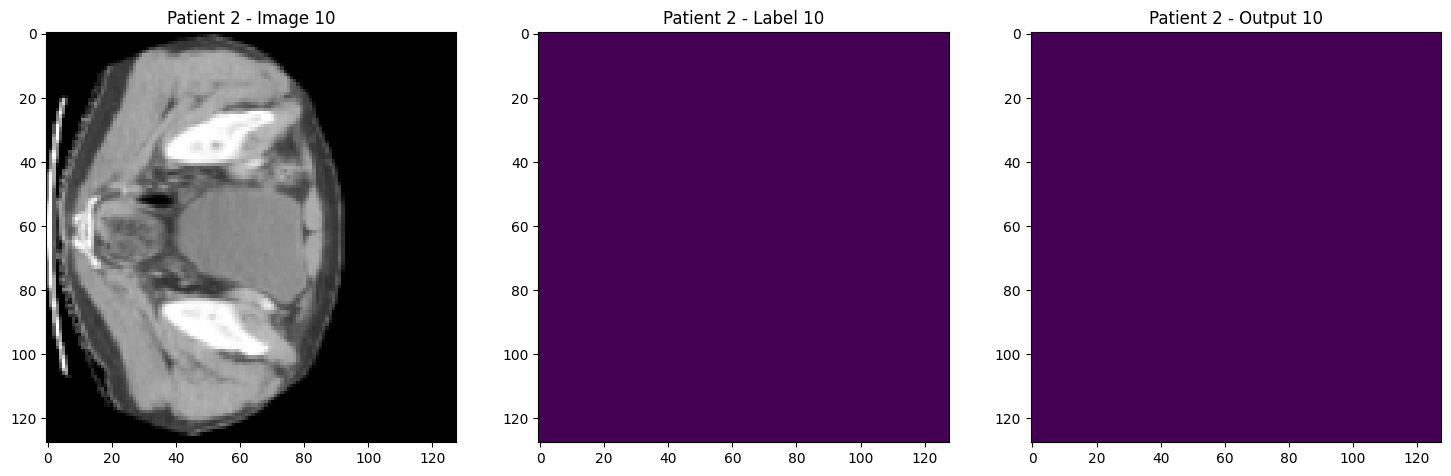

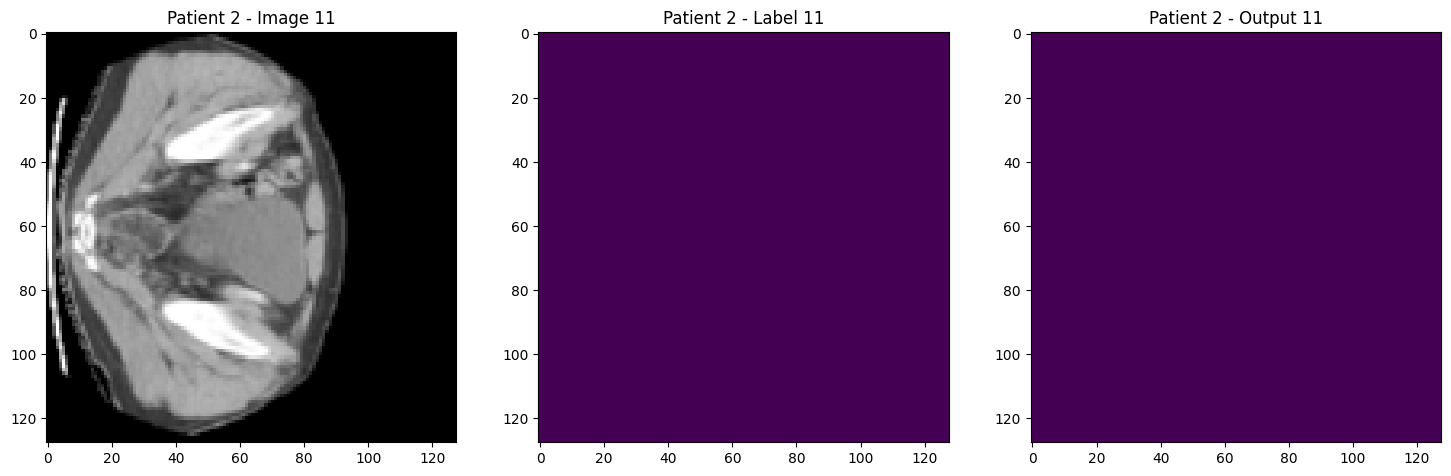

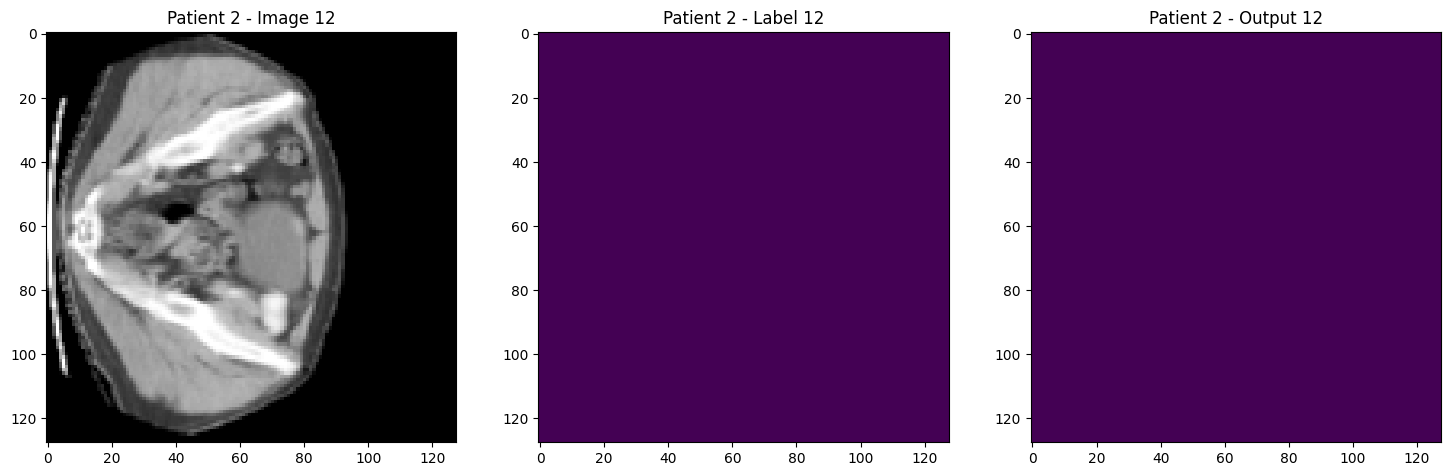

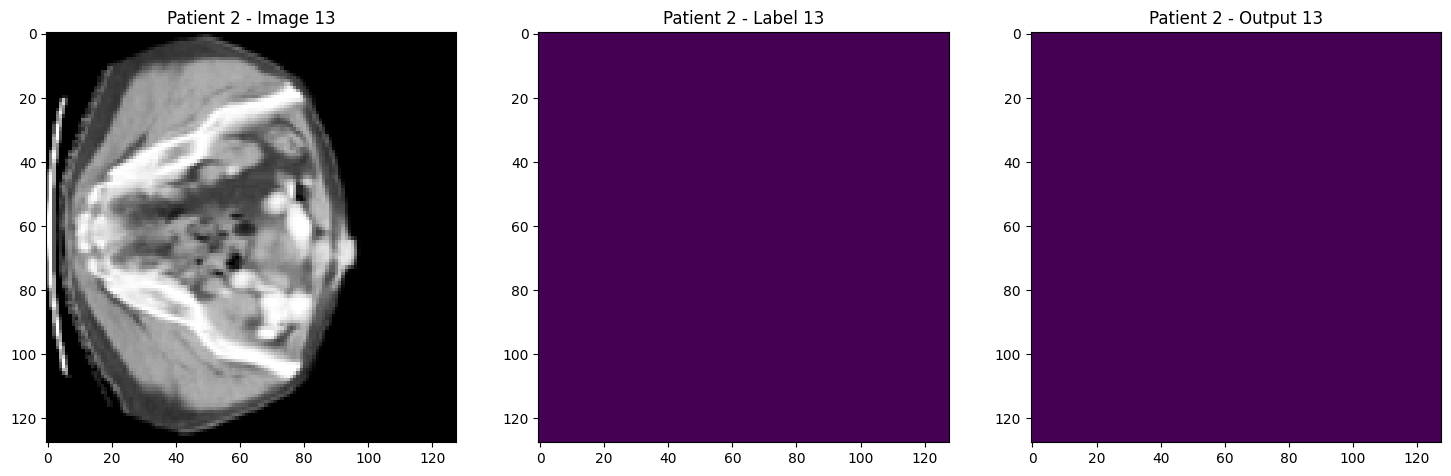

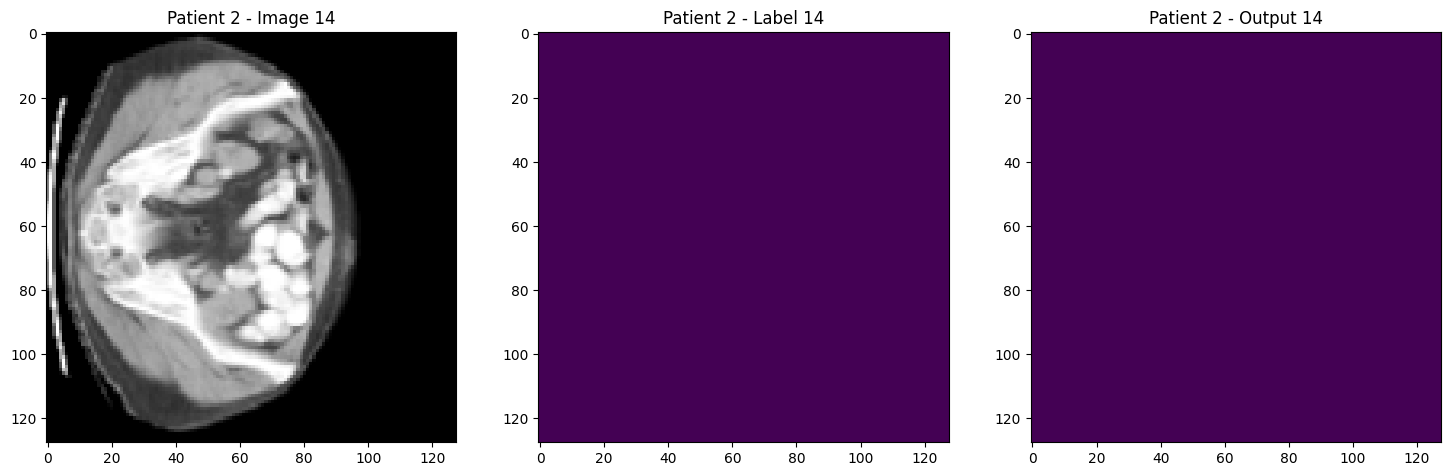

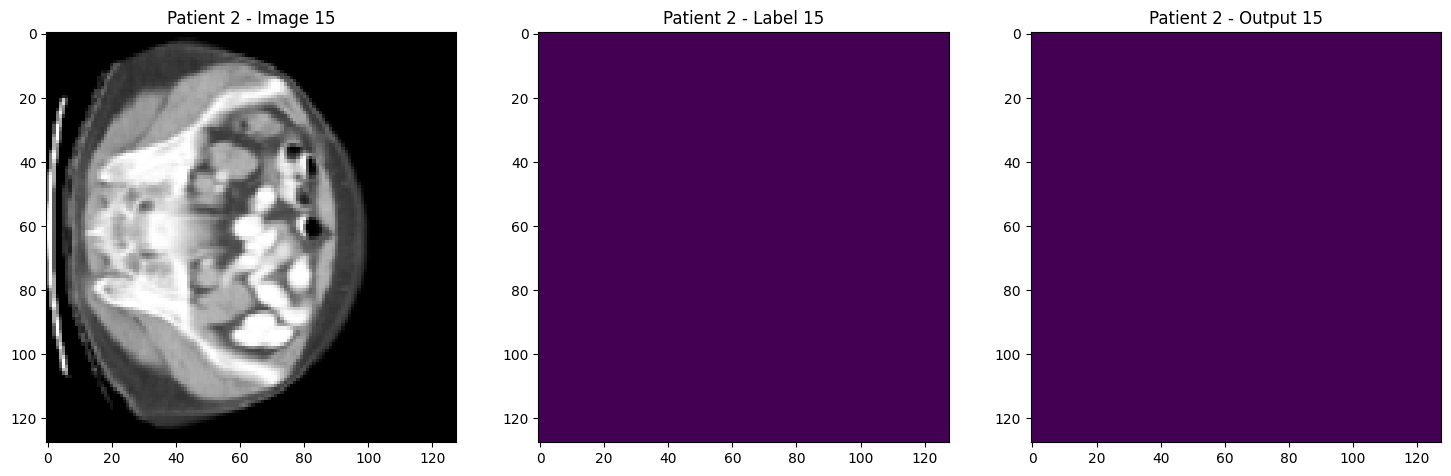

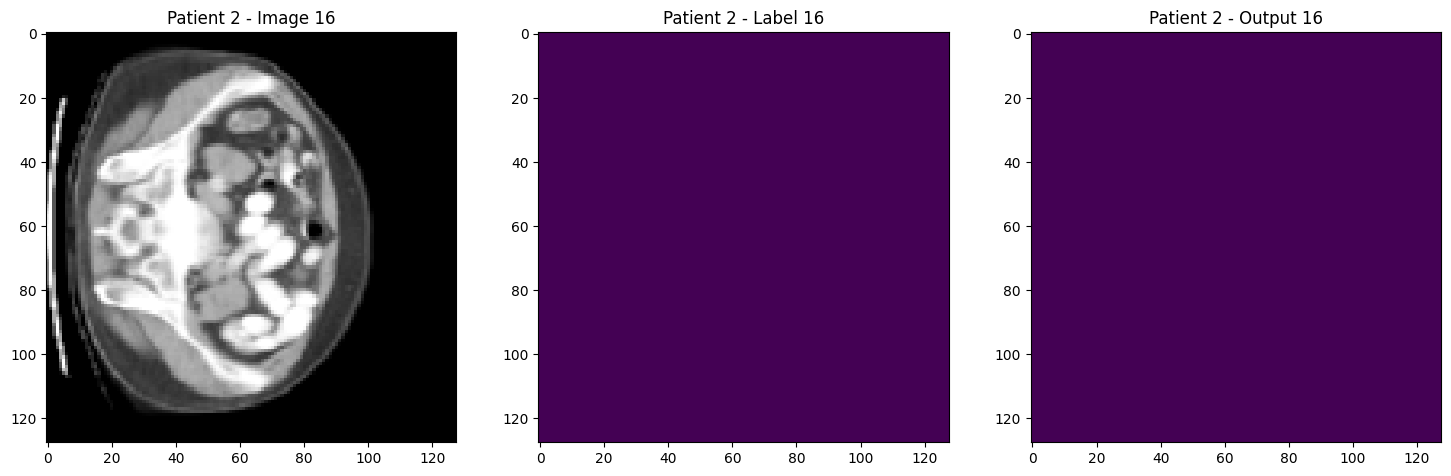

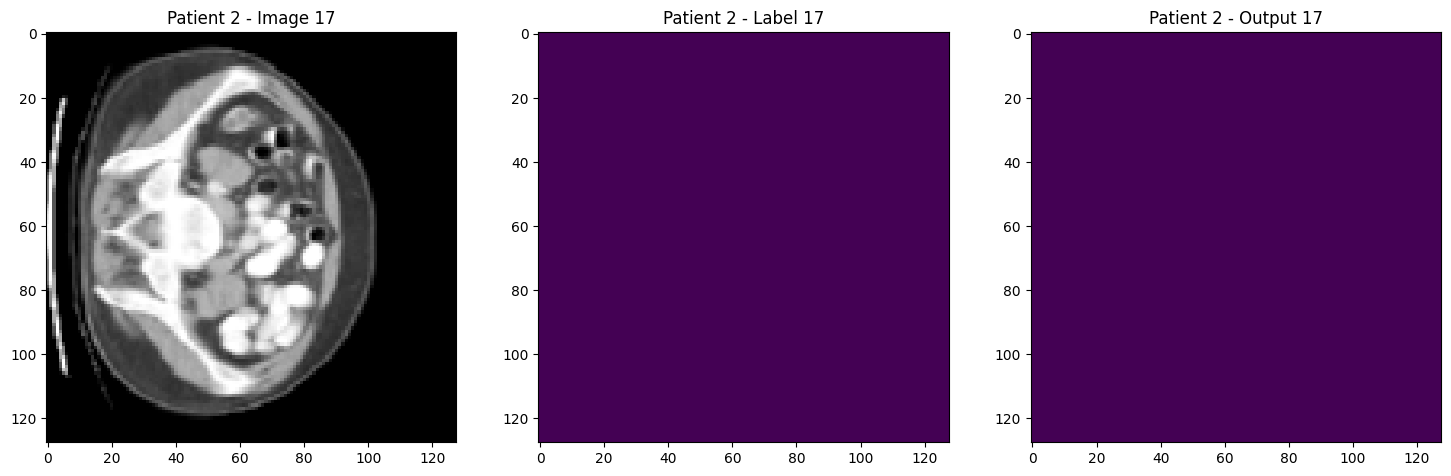

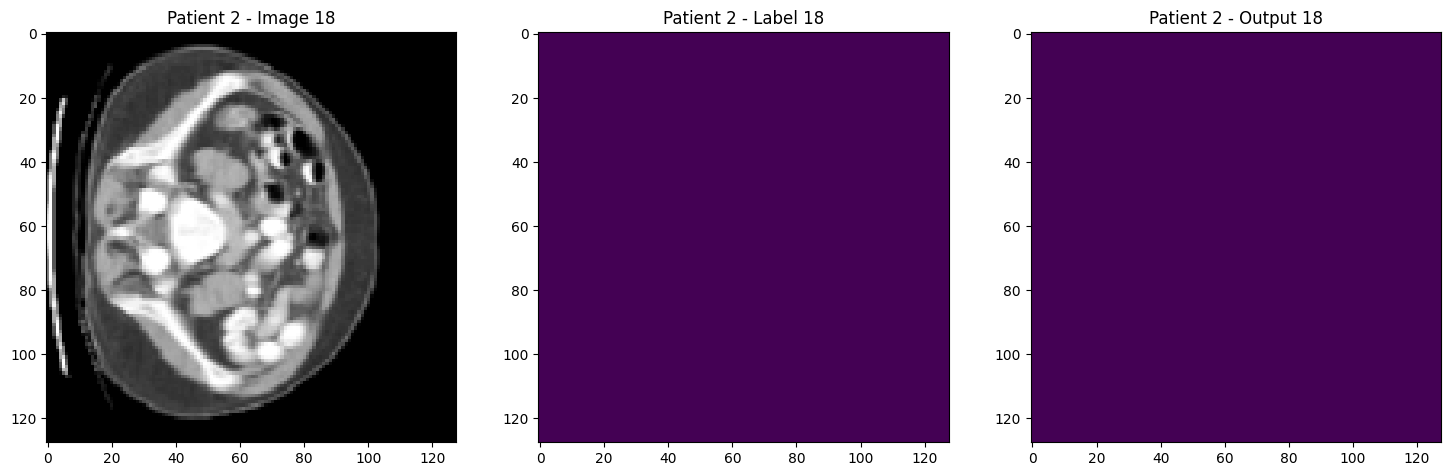

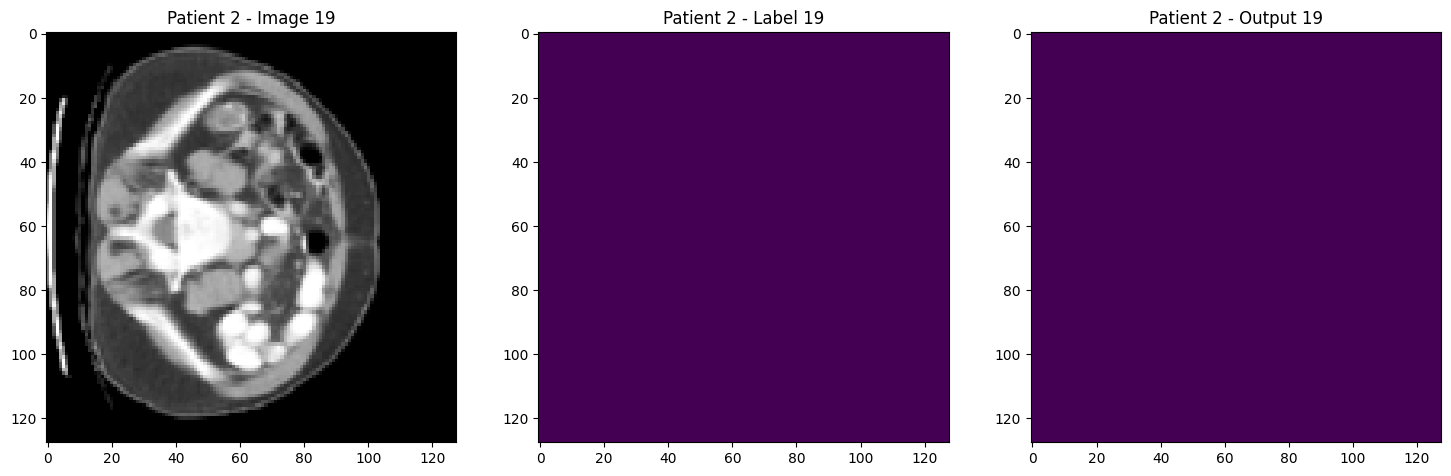

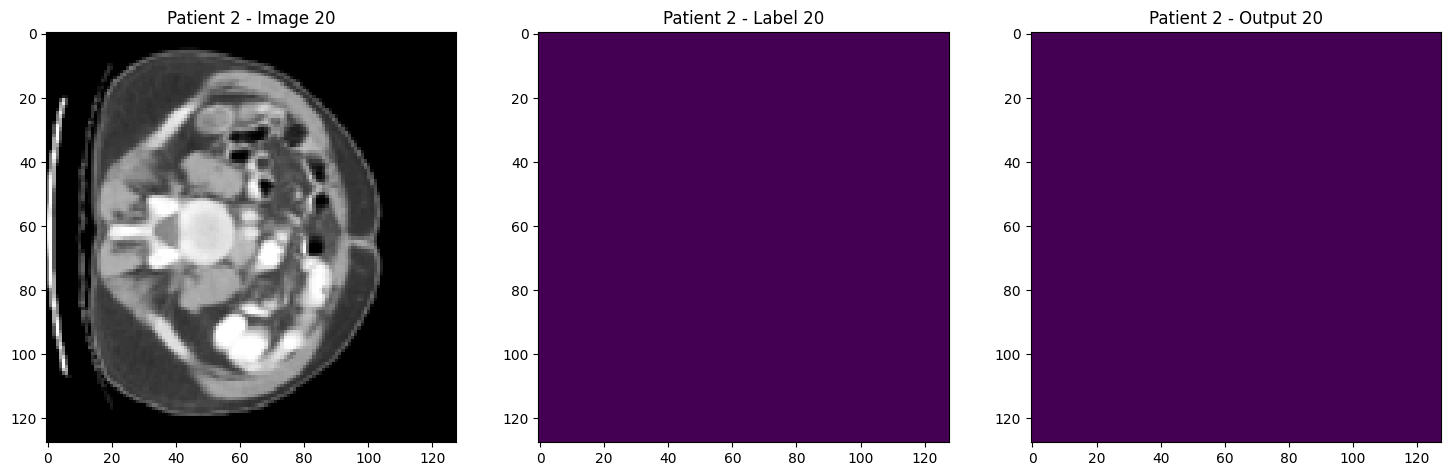

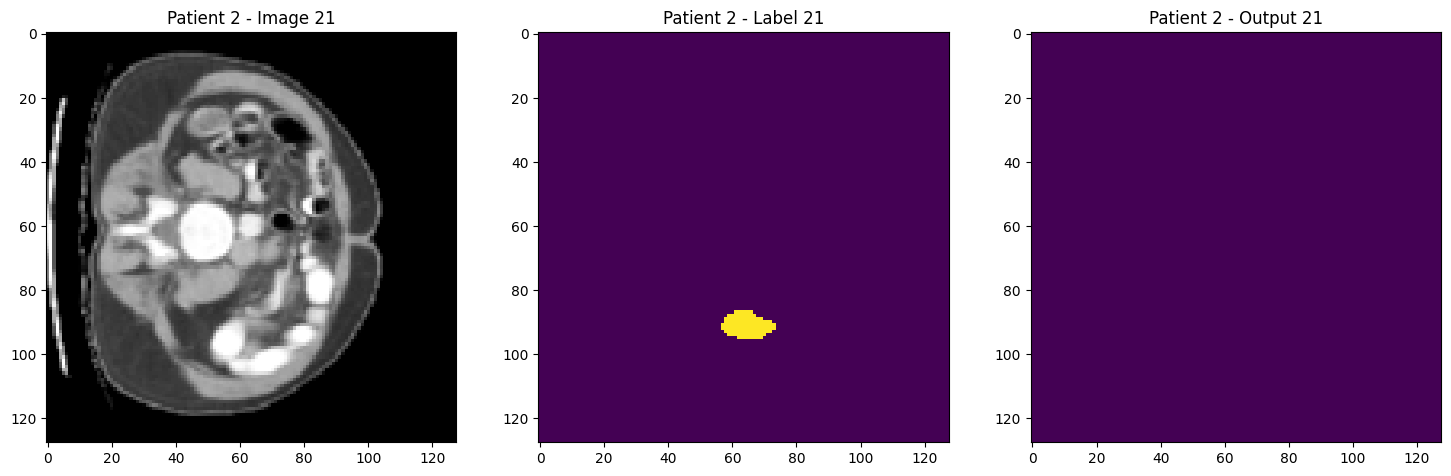

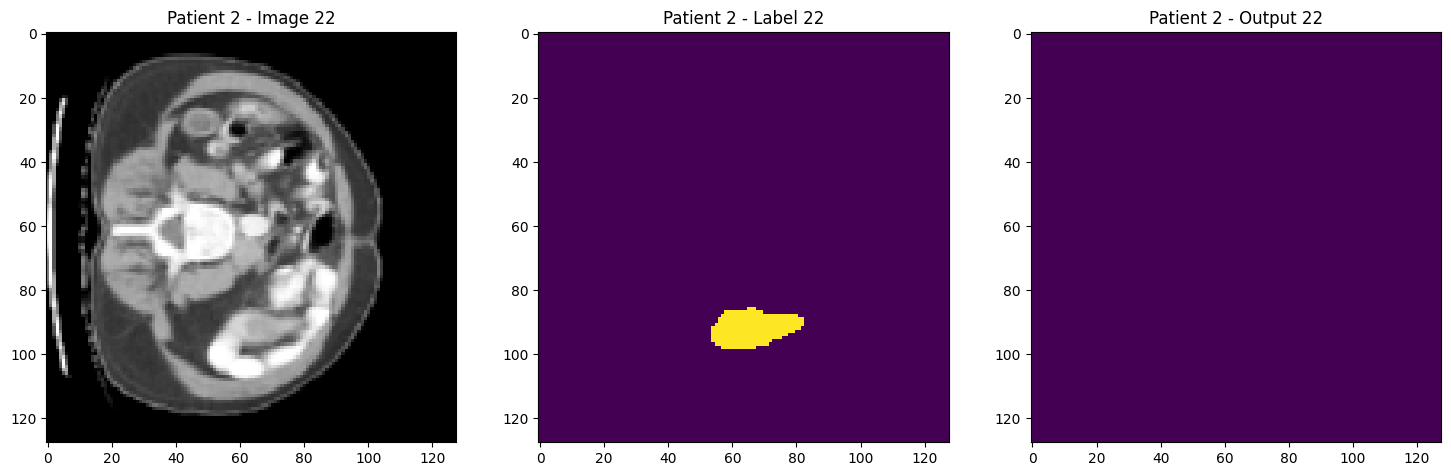

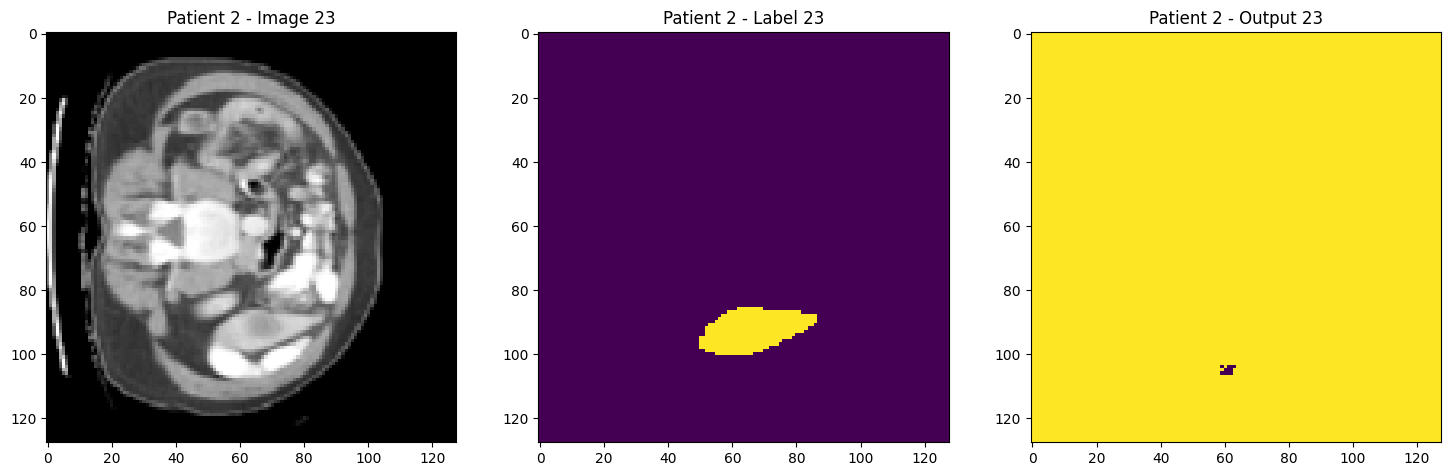

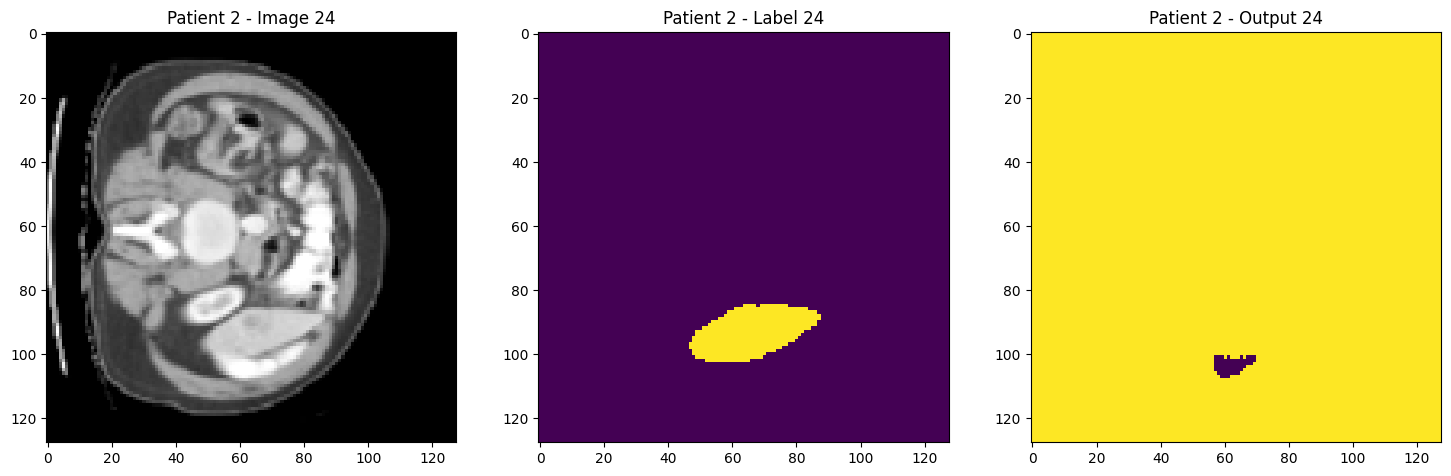

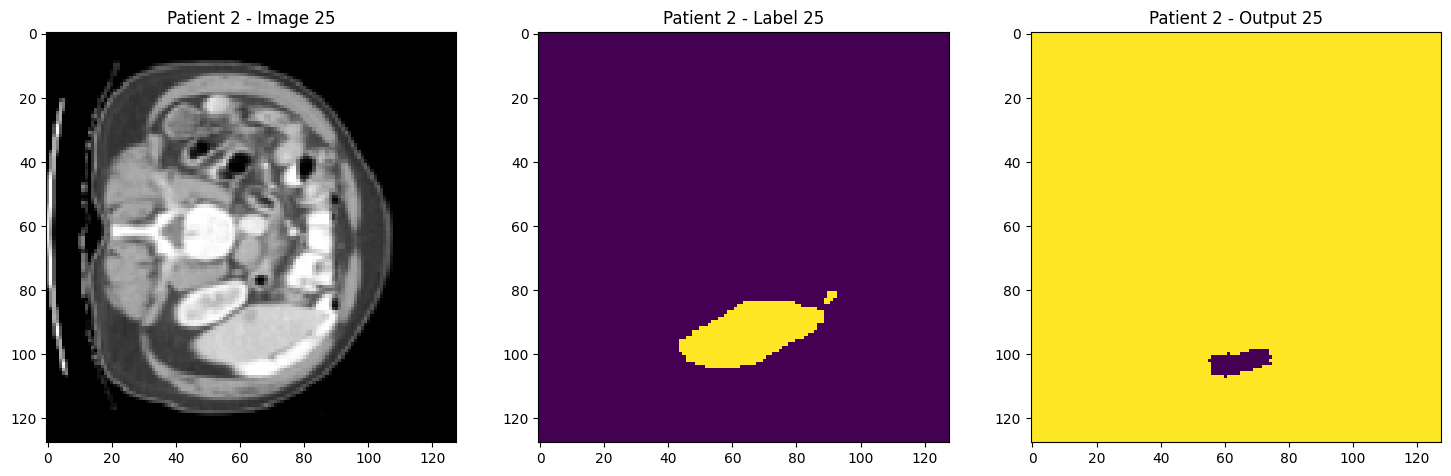

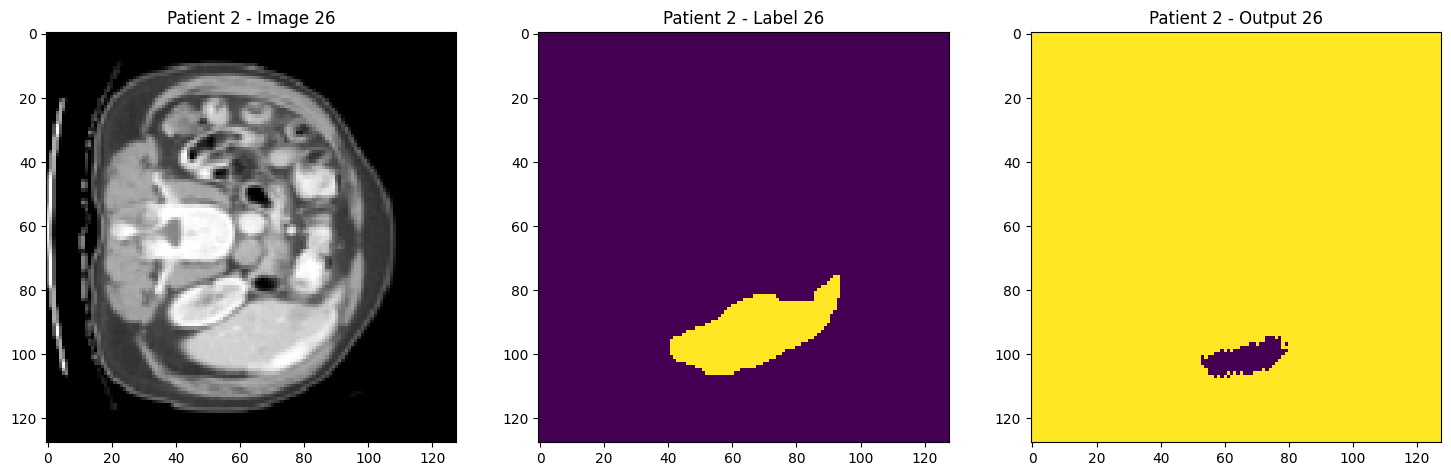

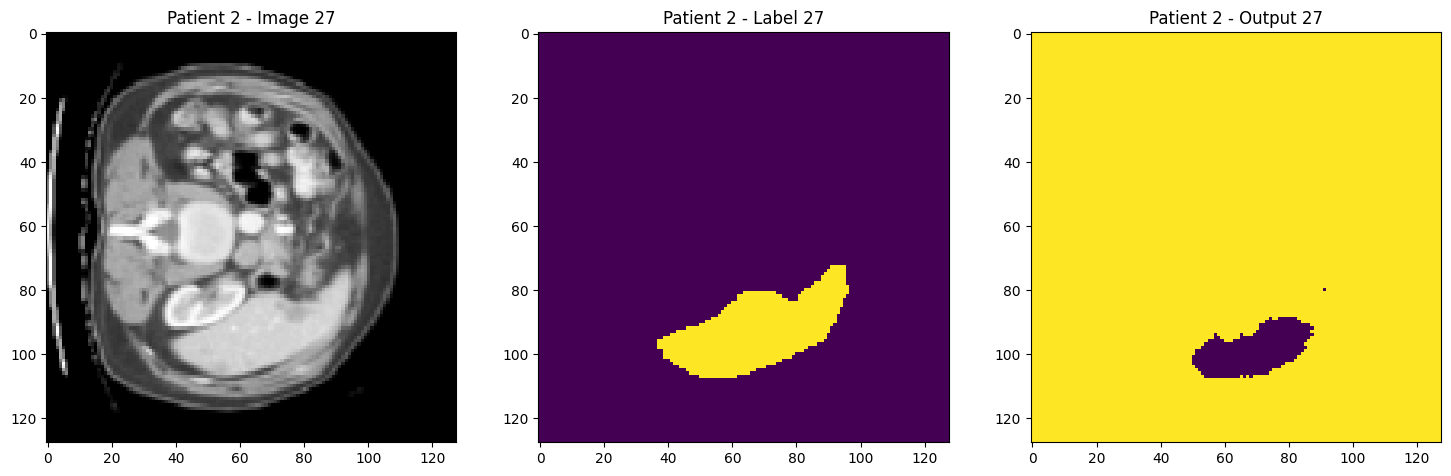

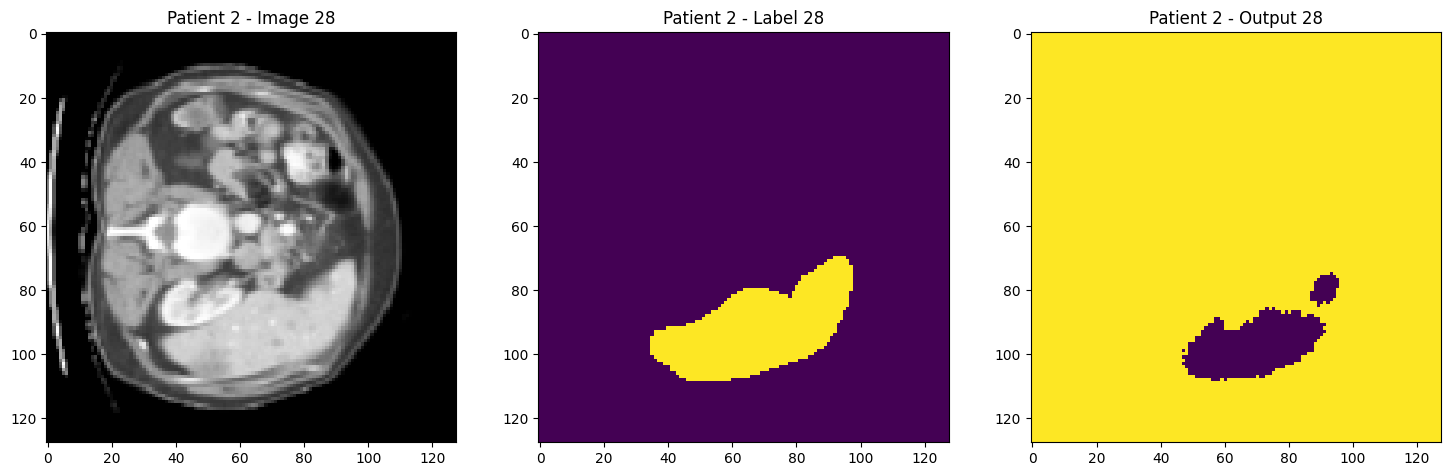

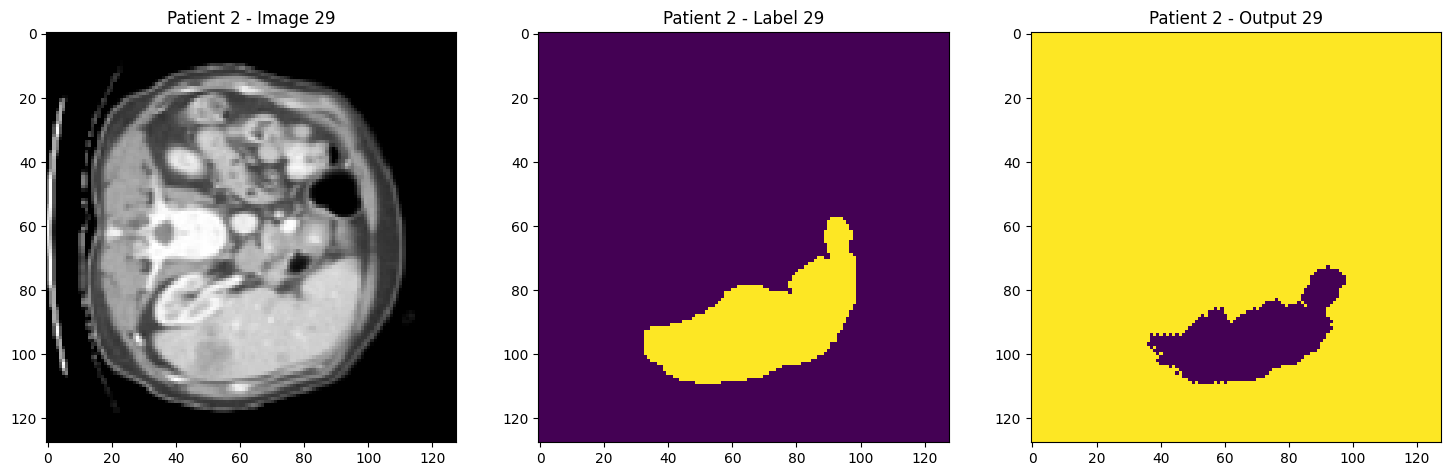

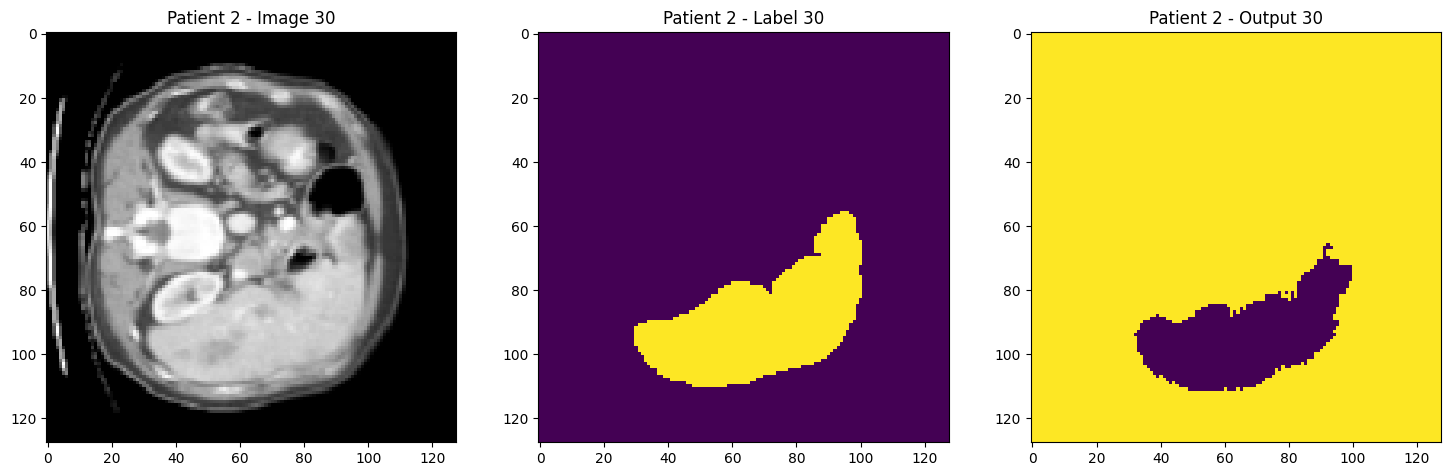

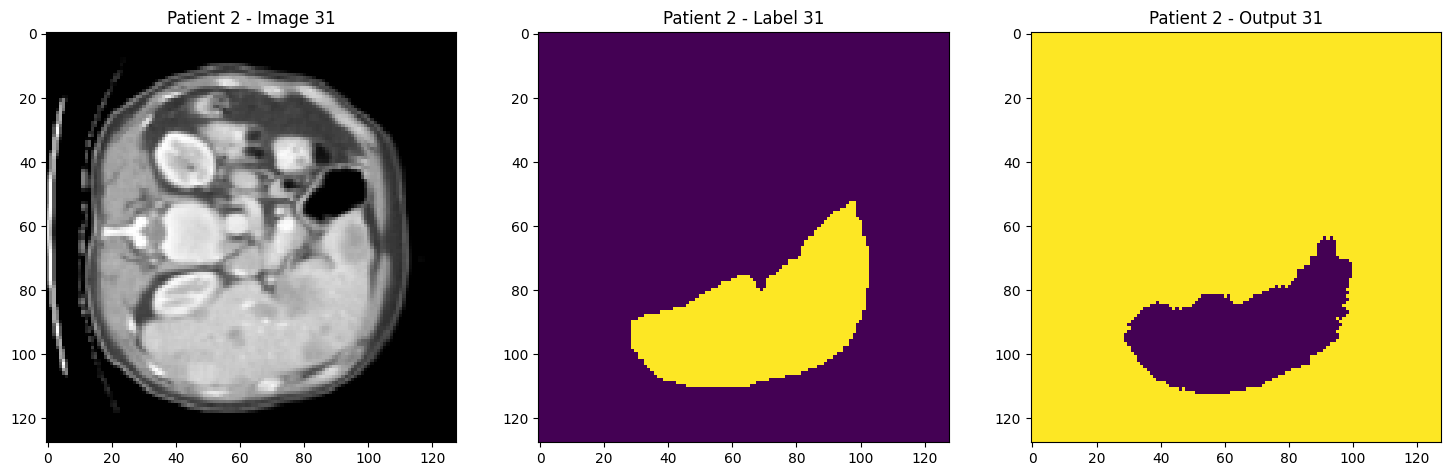

Processing Patient 3...


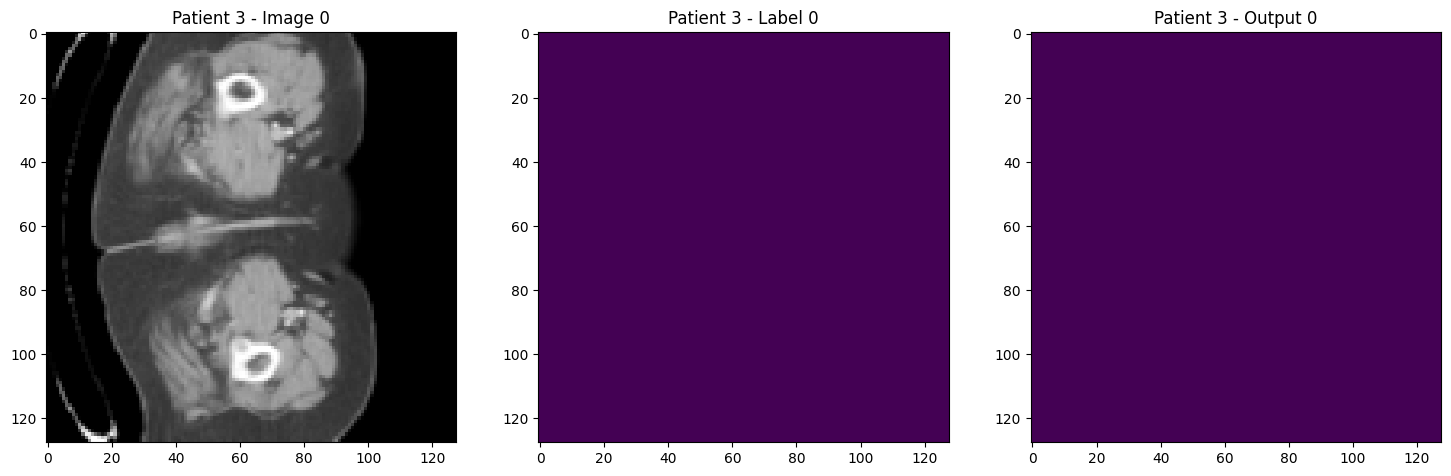

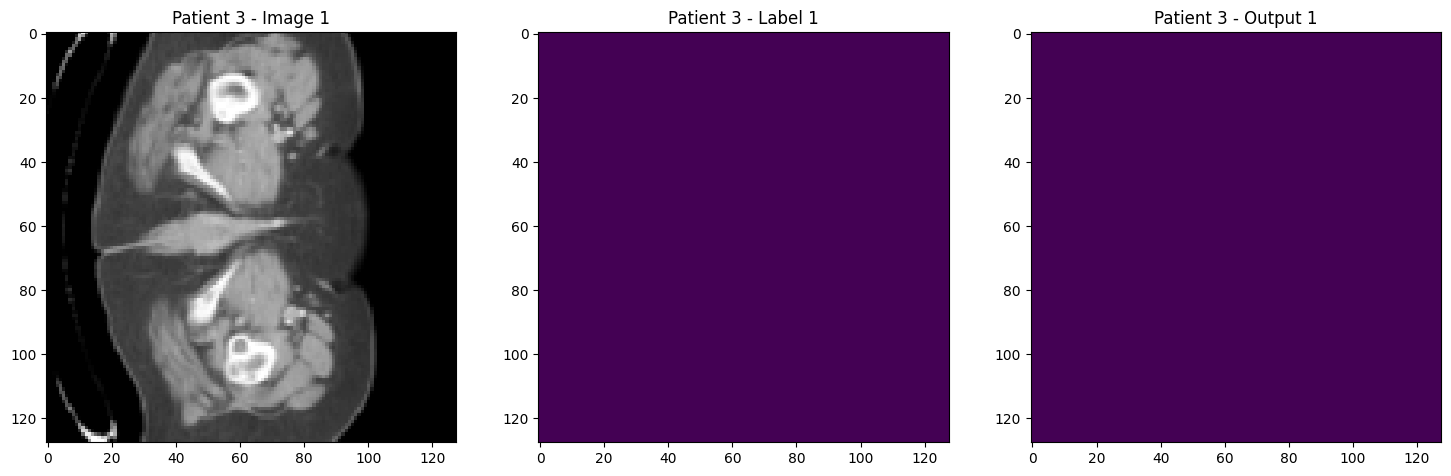

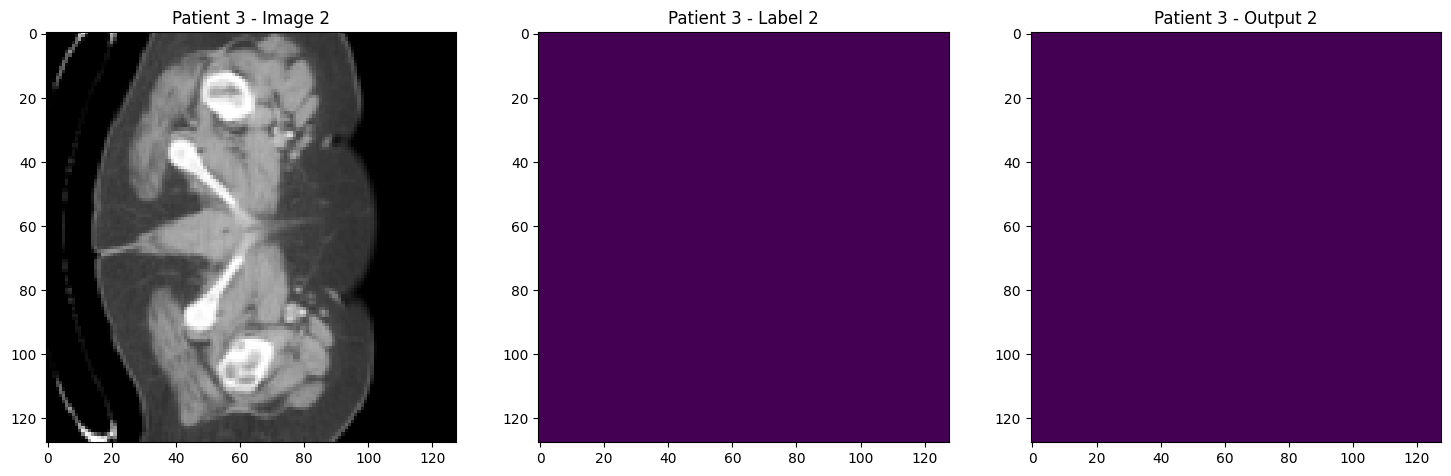

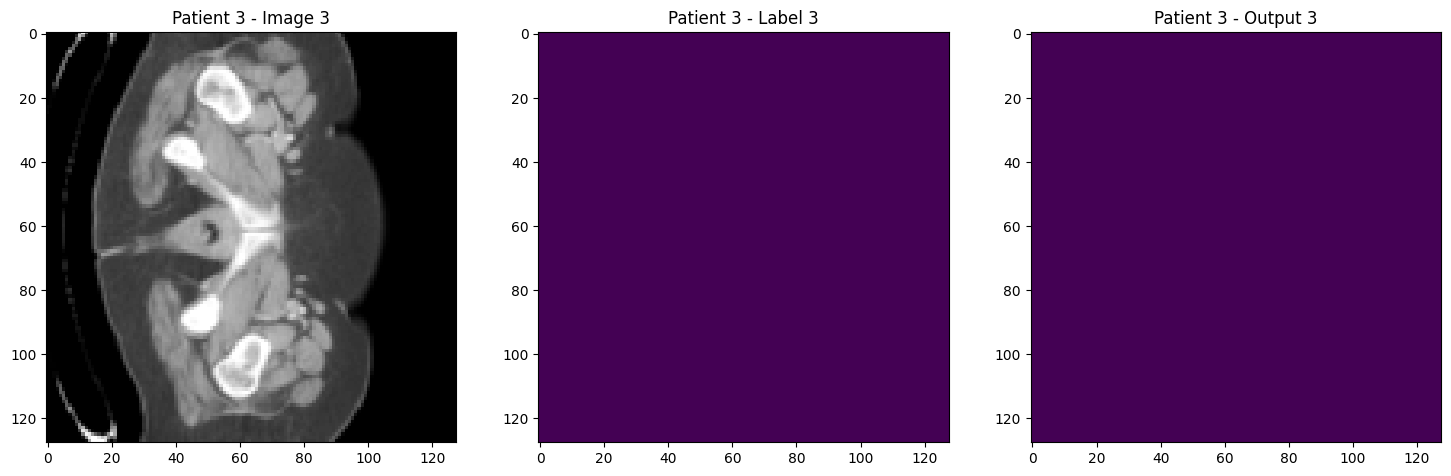

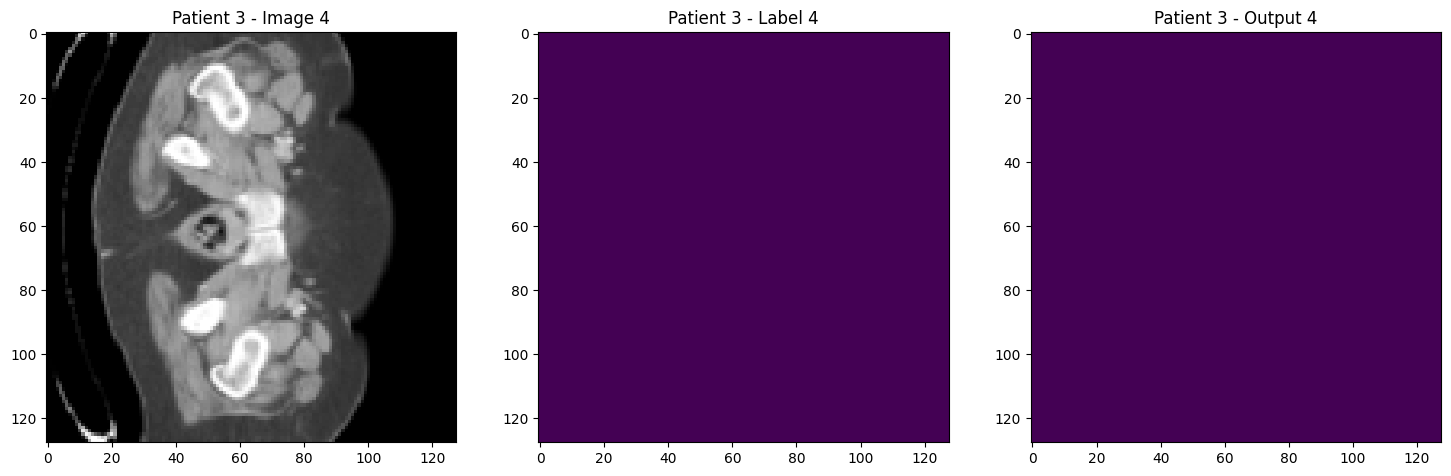

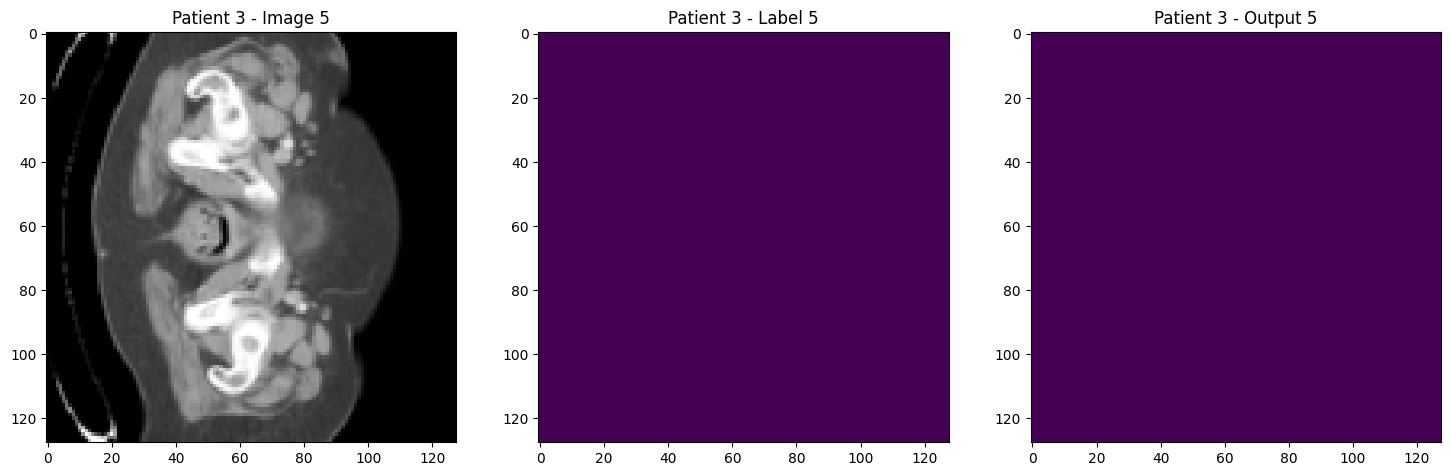

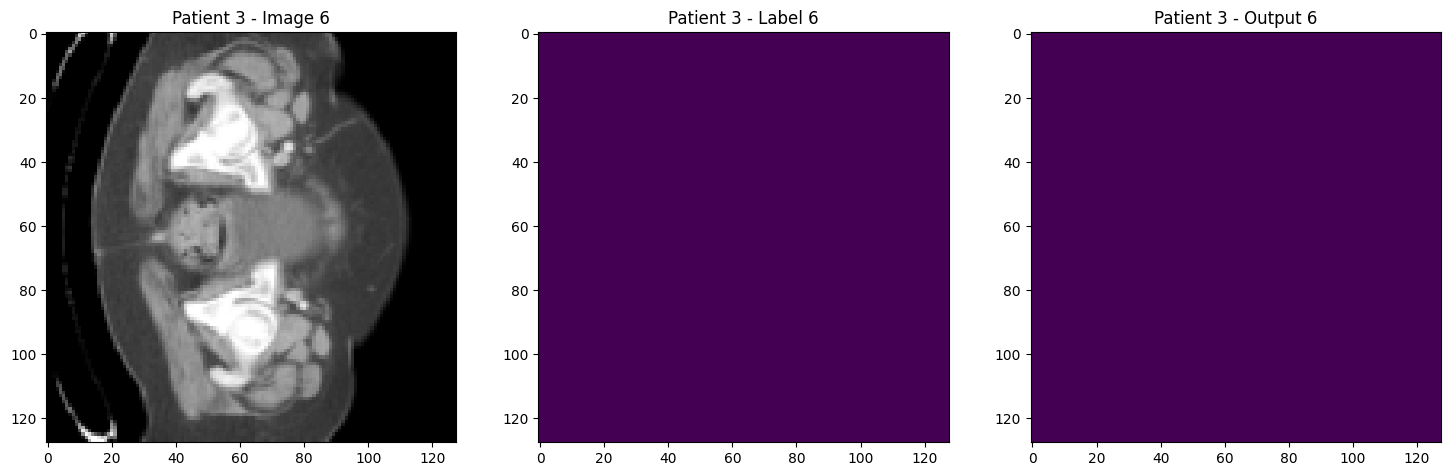

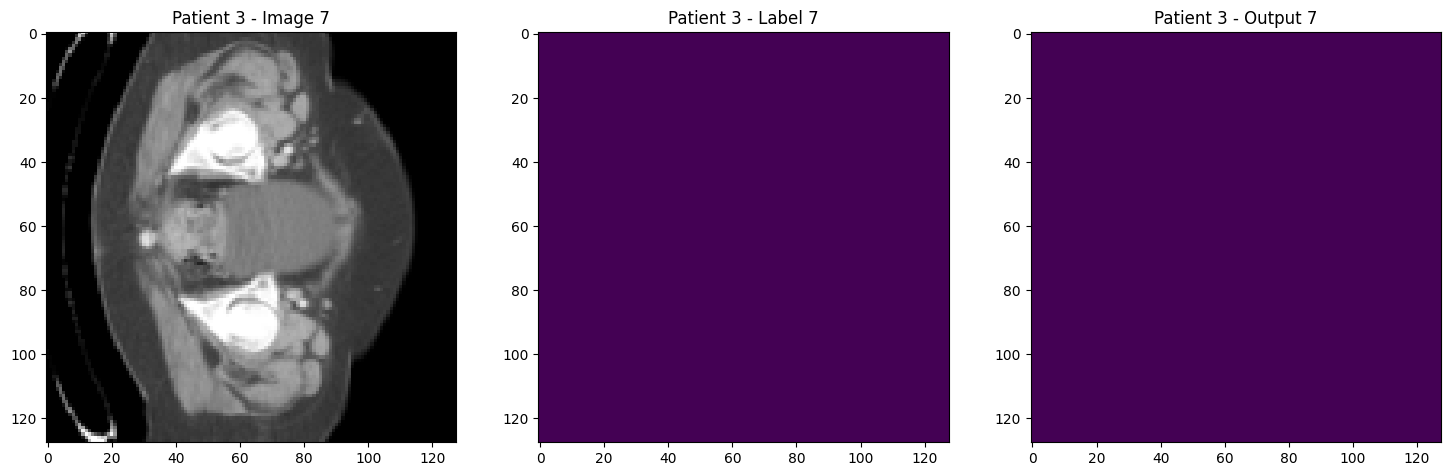

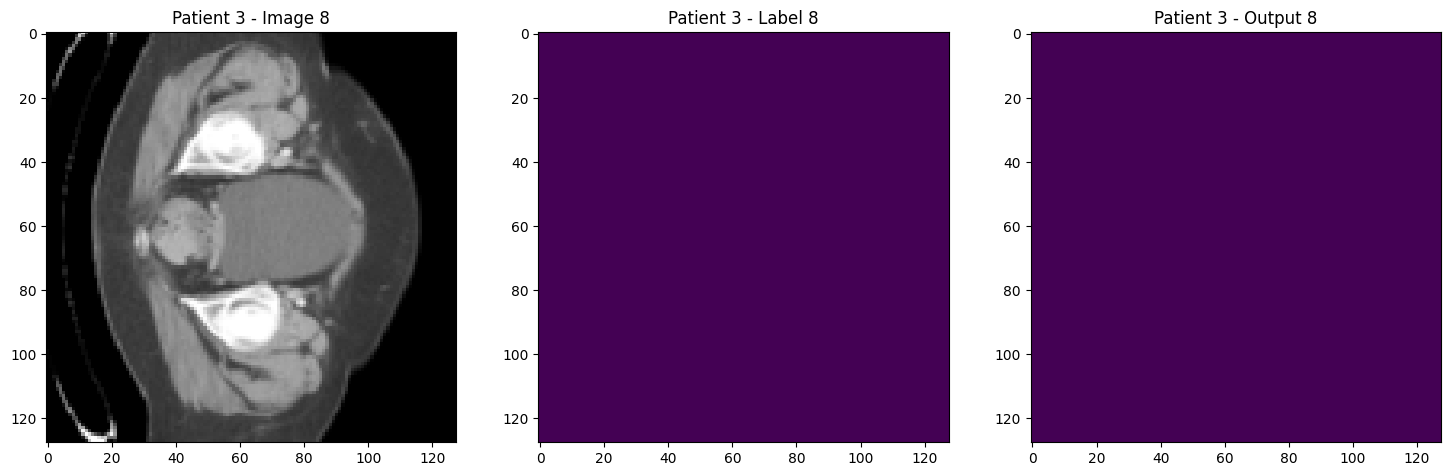

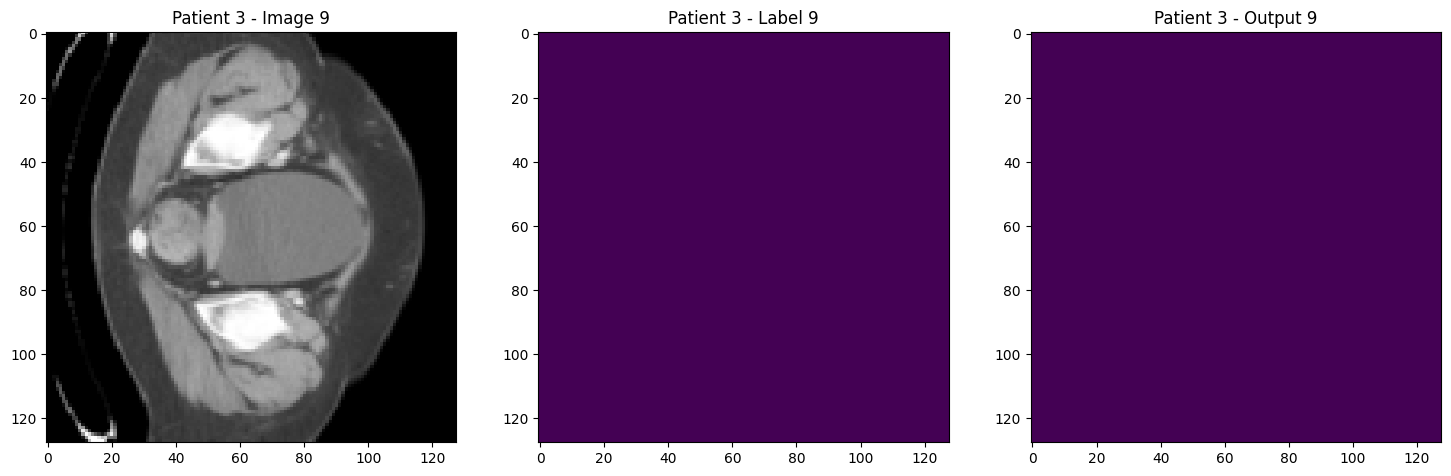

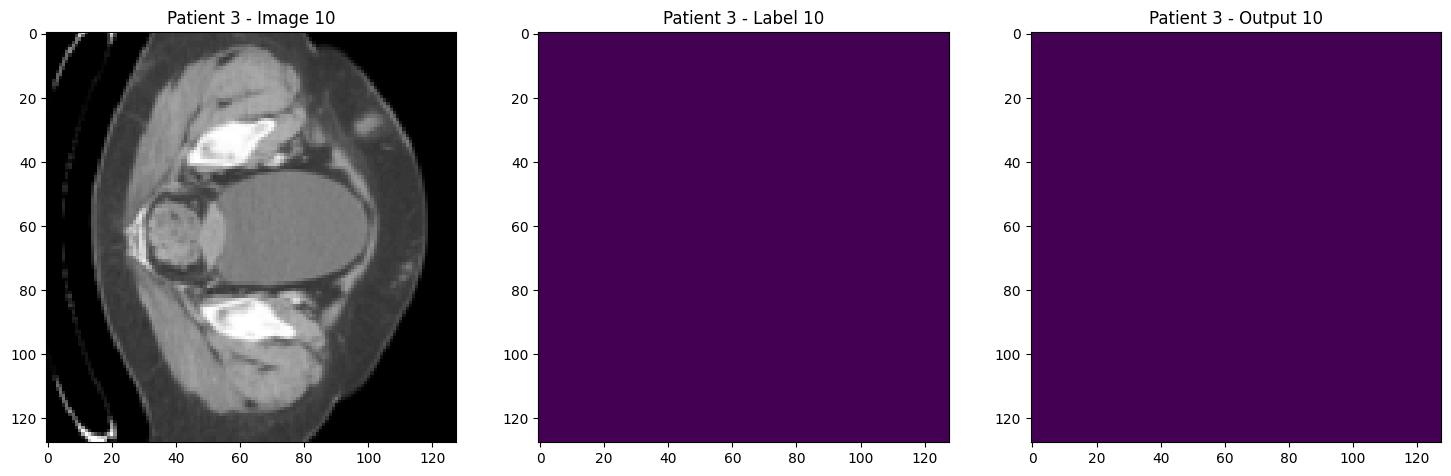

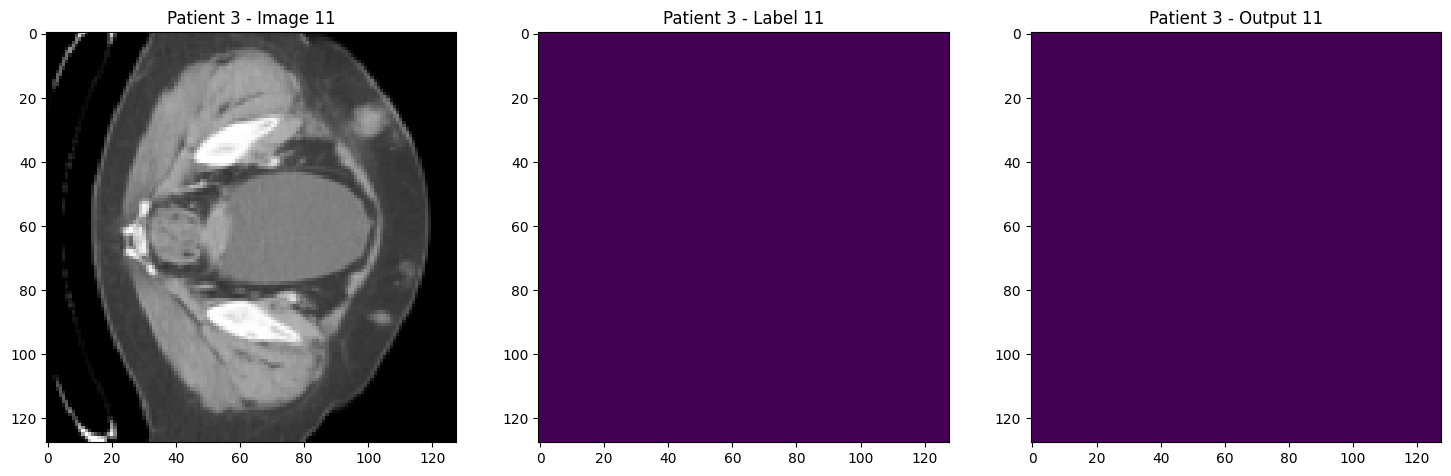

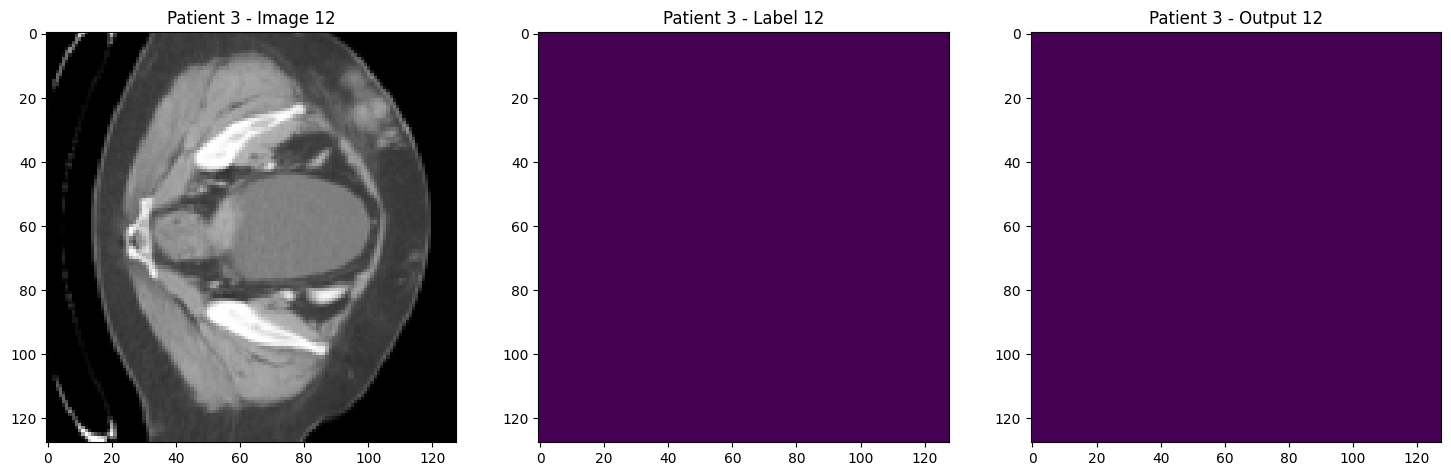

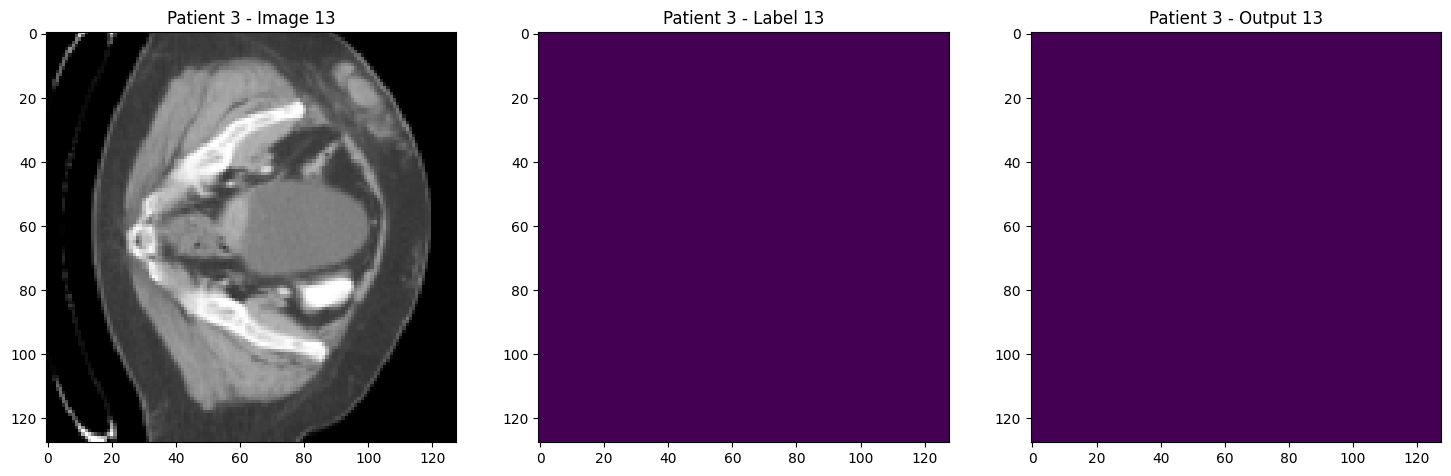

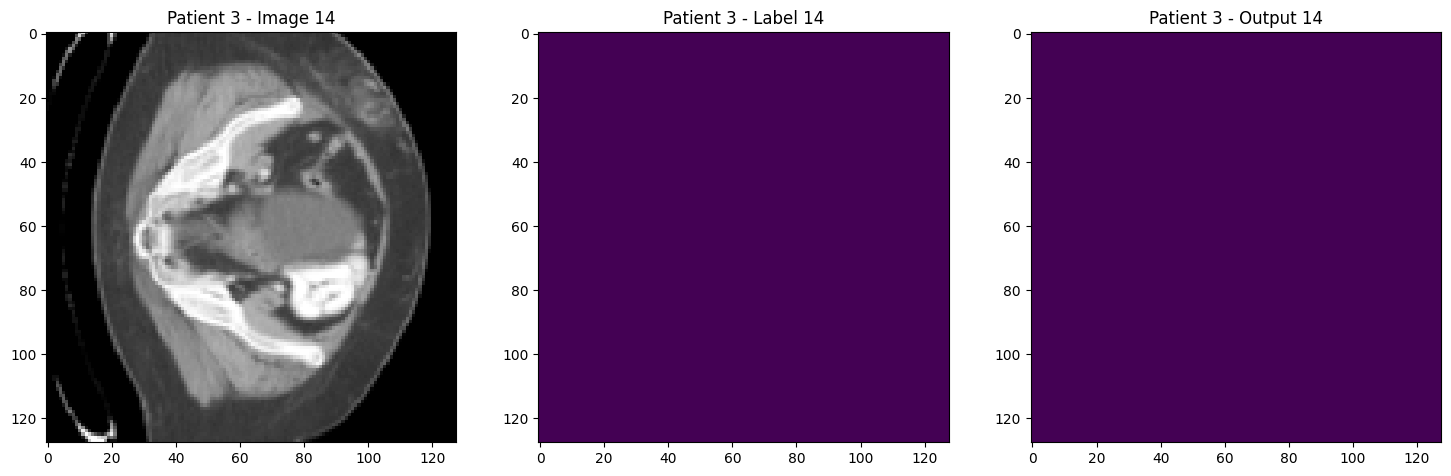

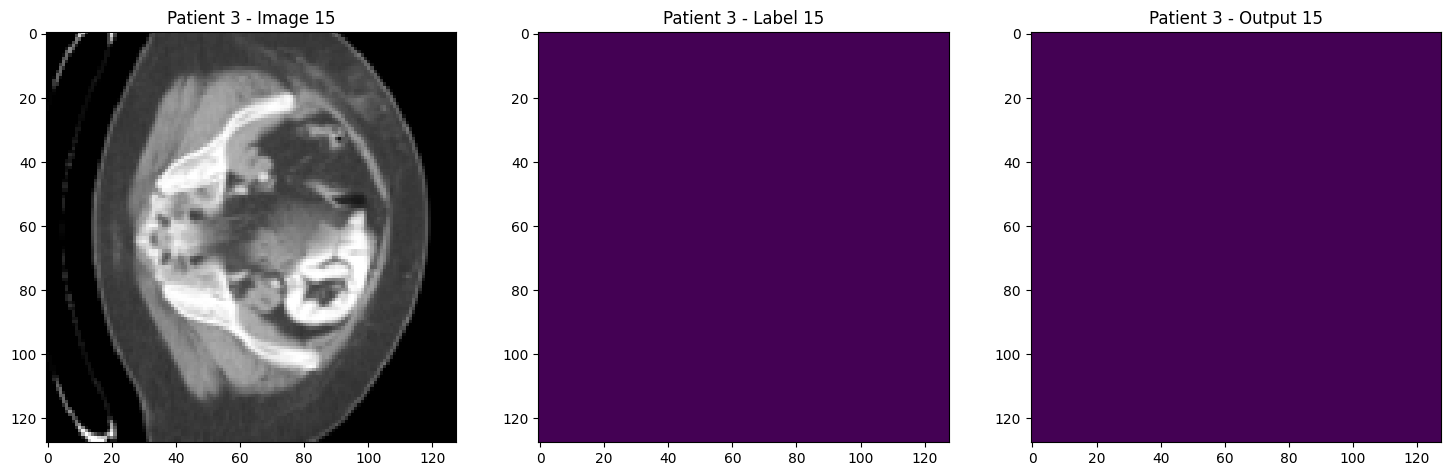

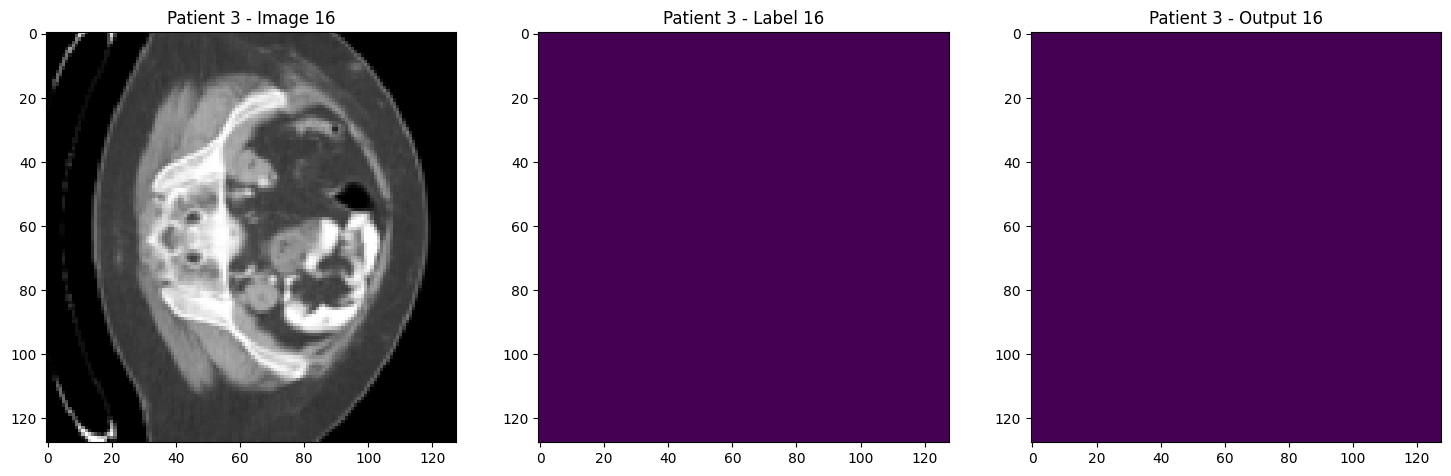

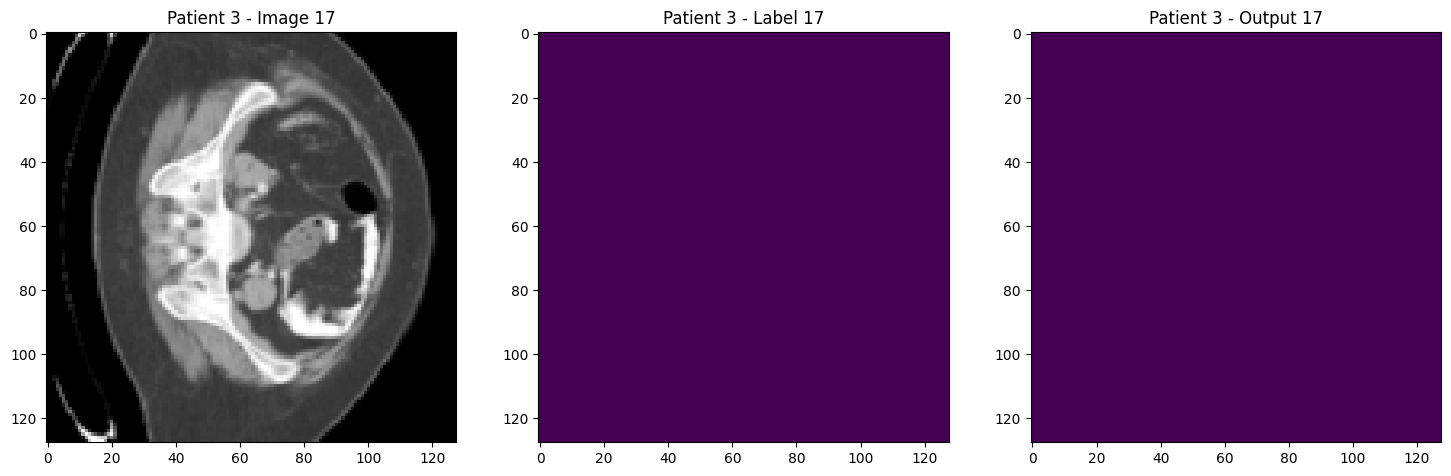

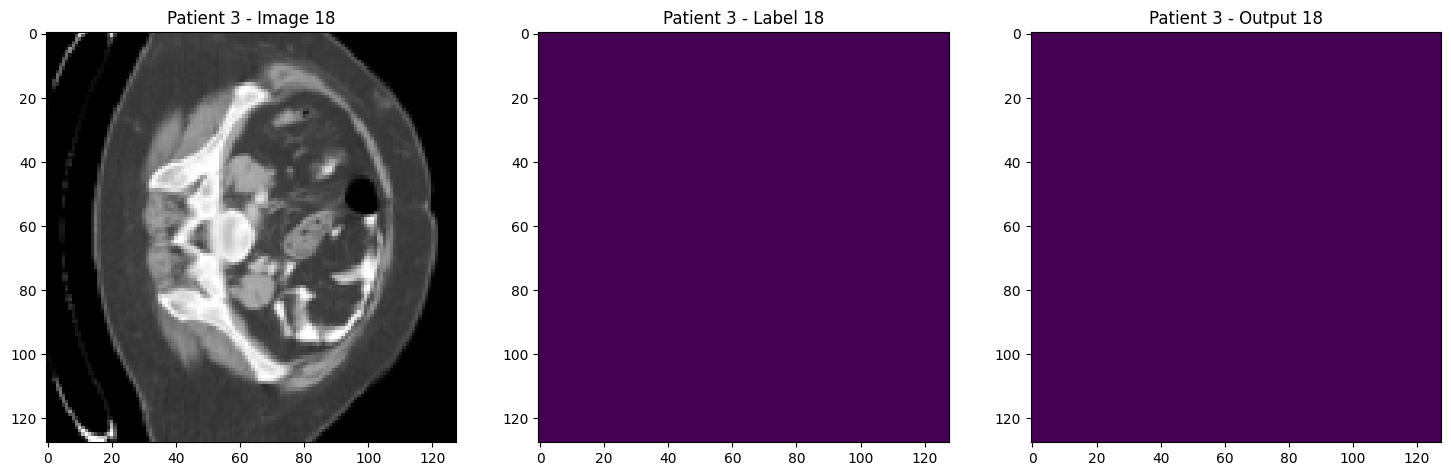

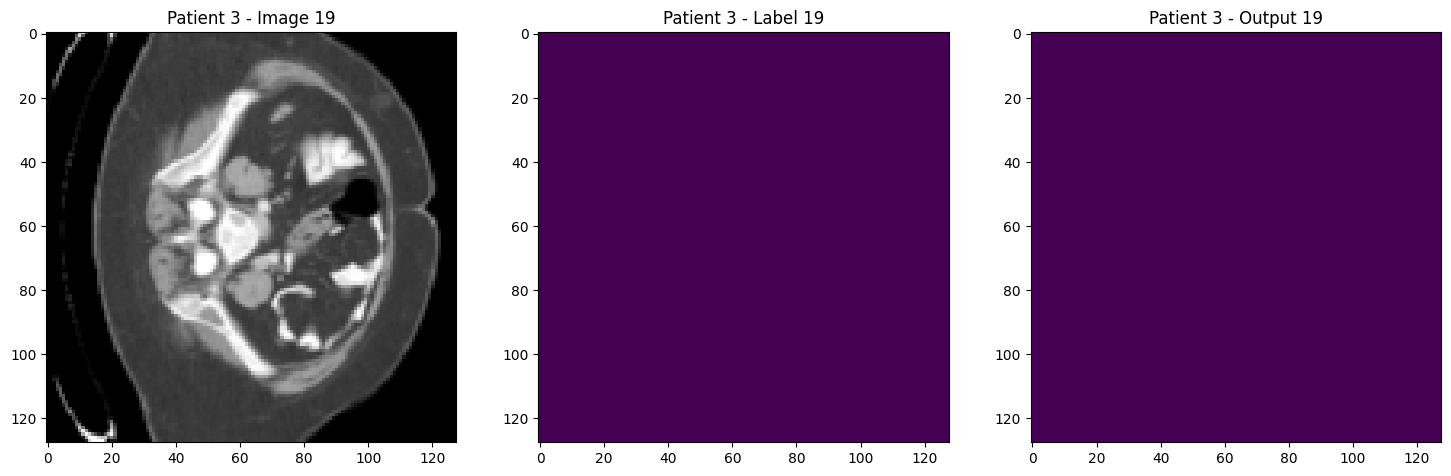

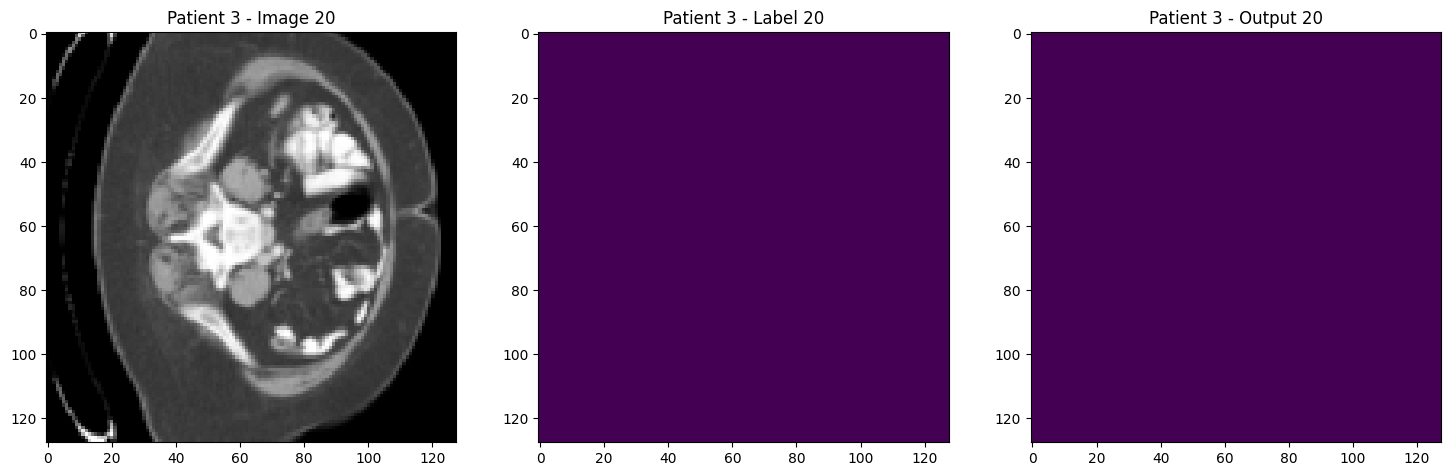

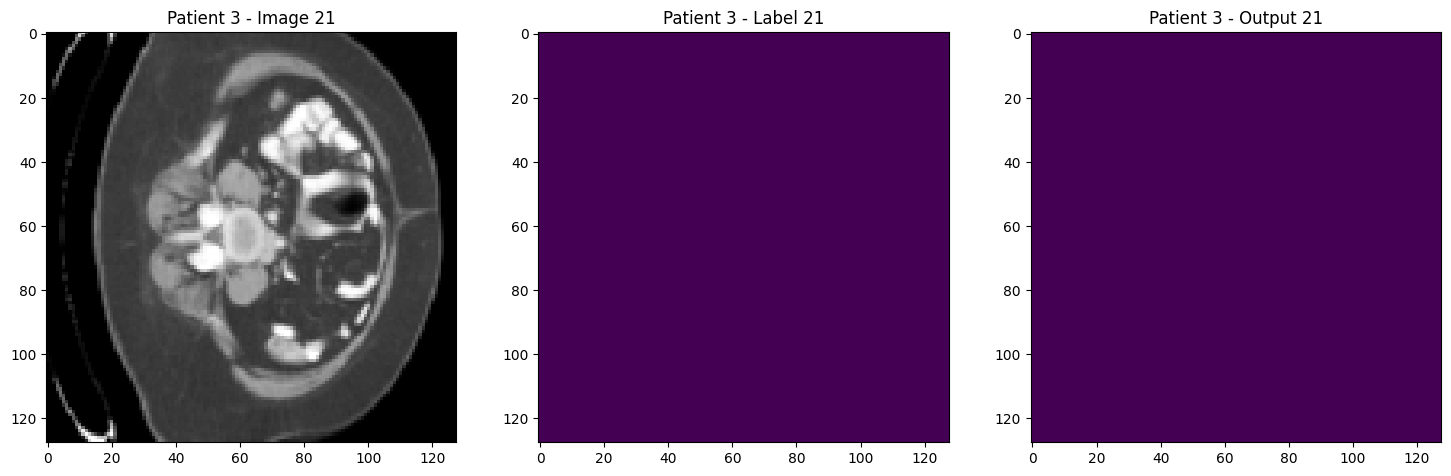

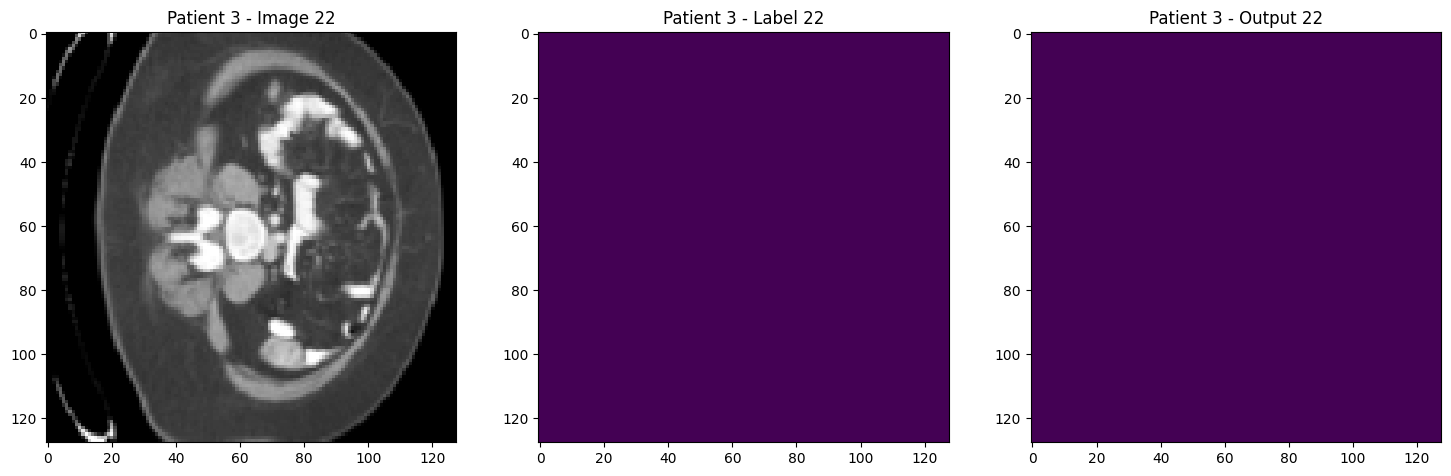

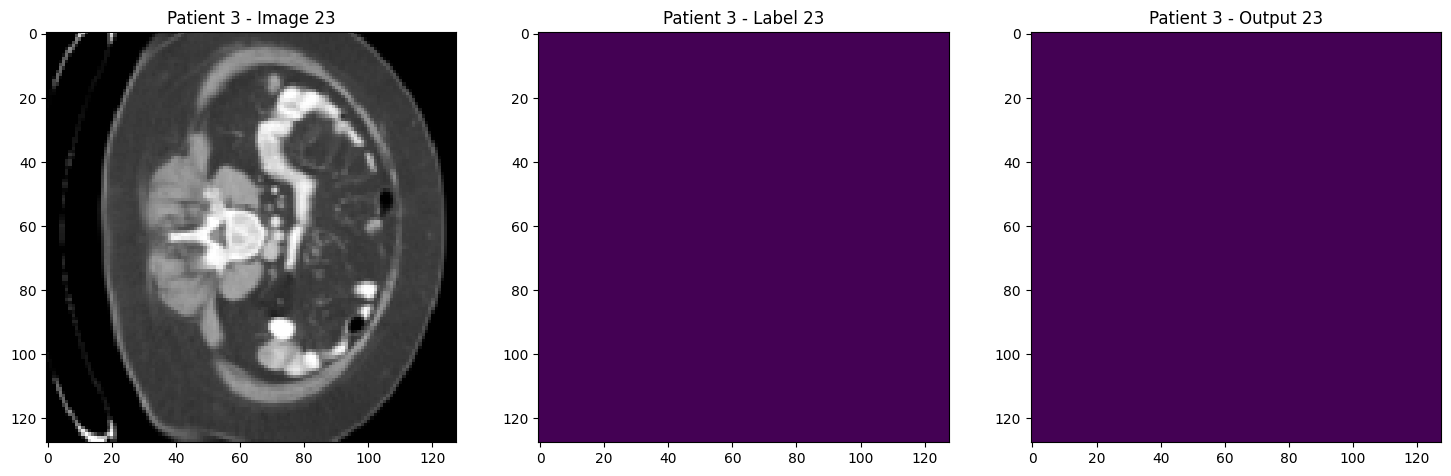

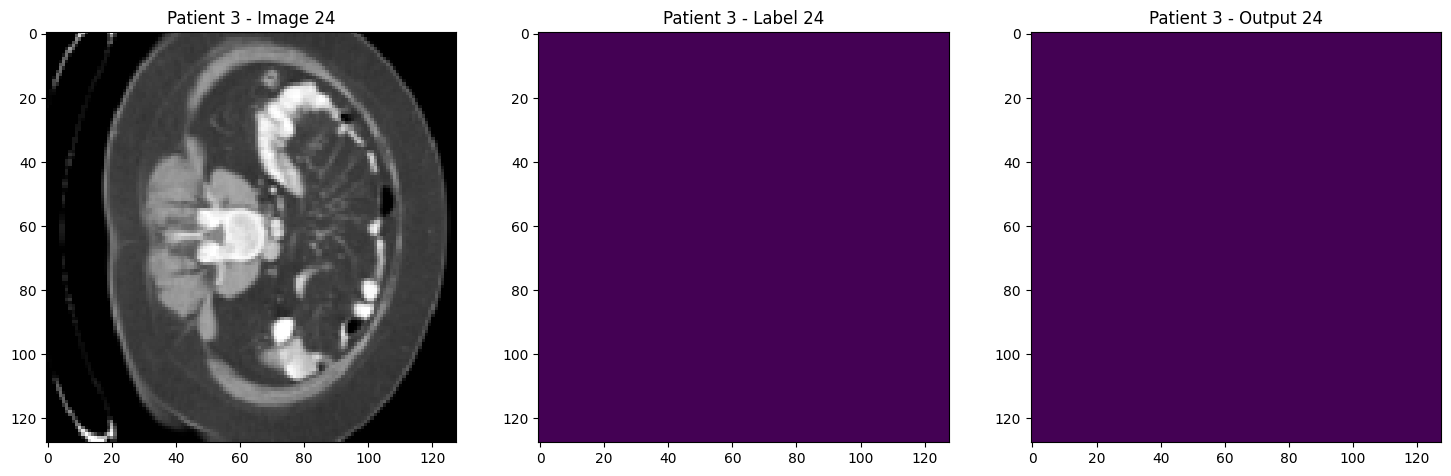

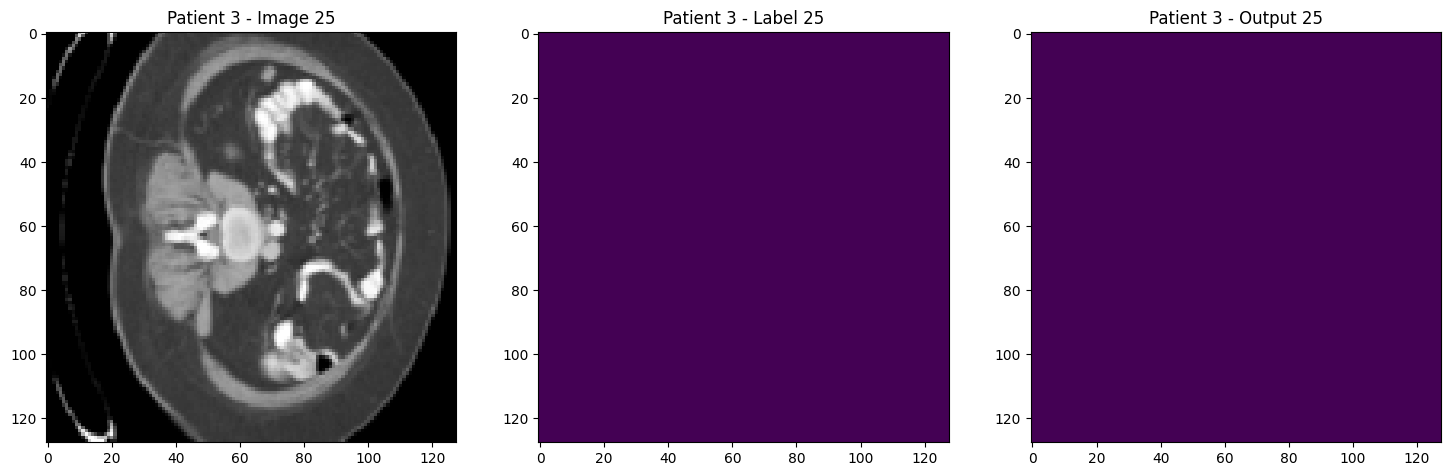

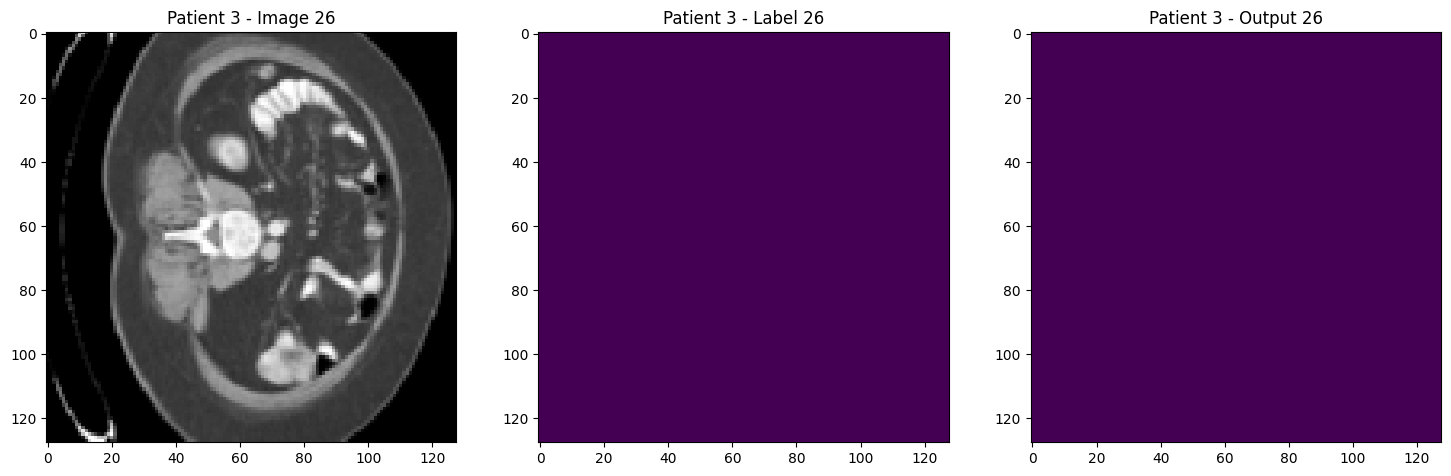

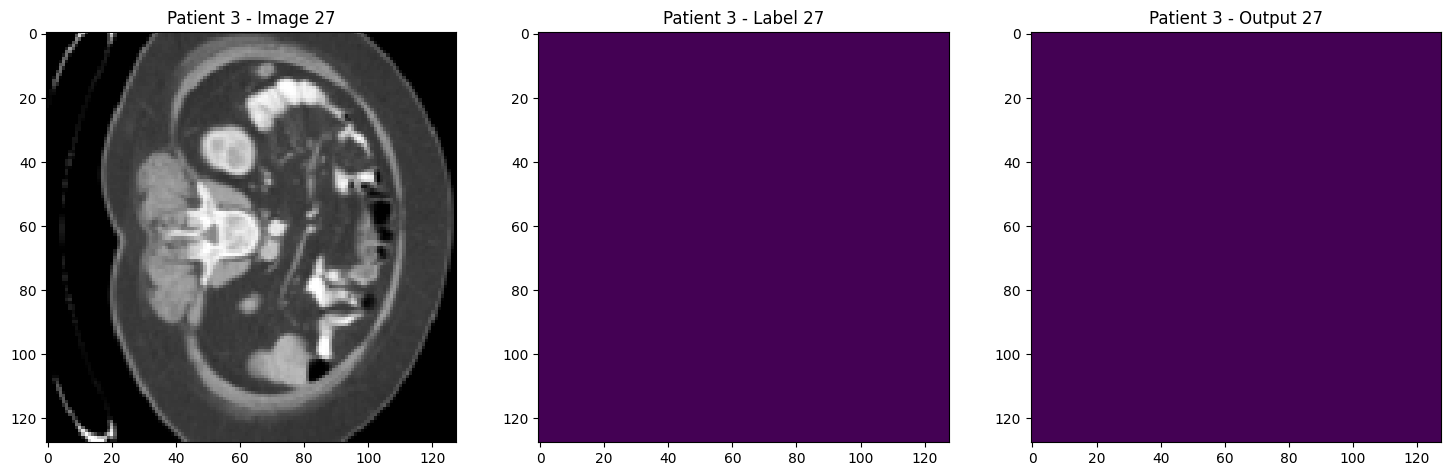

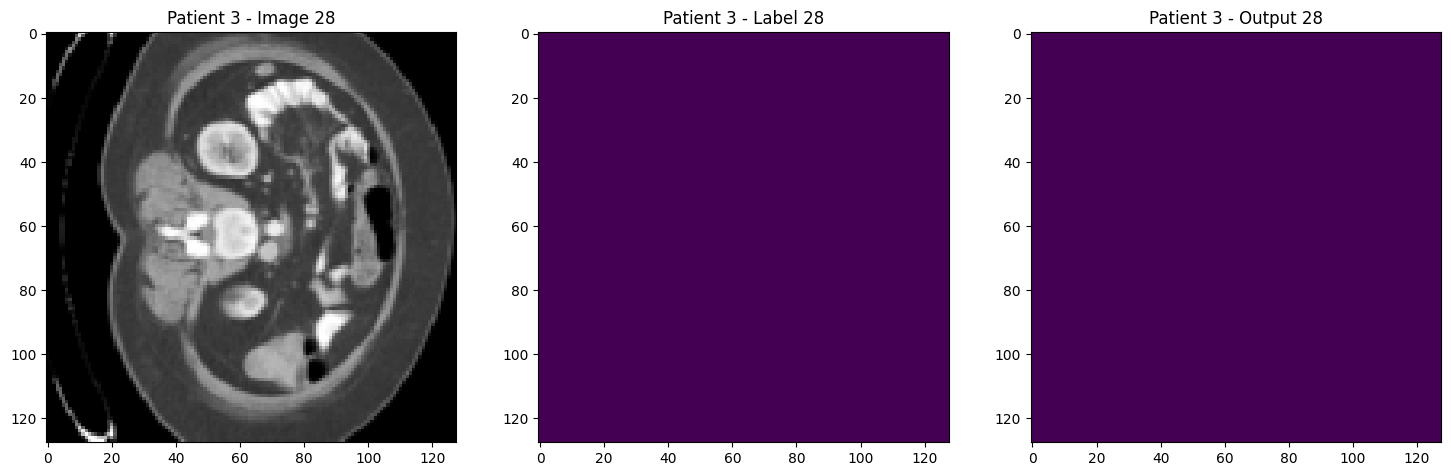

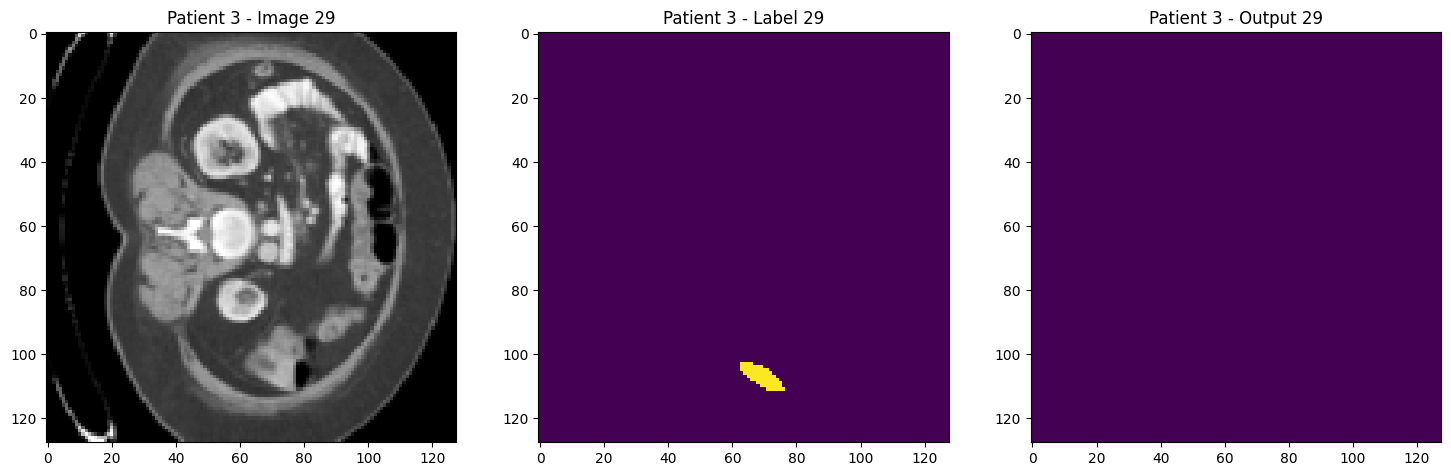

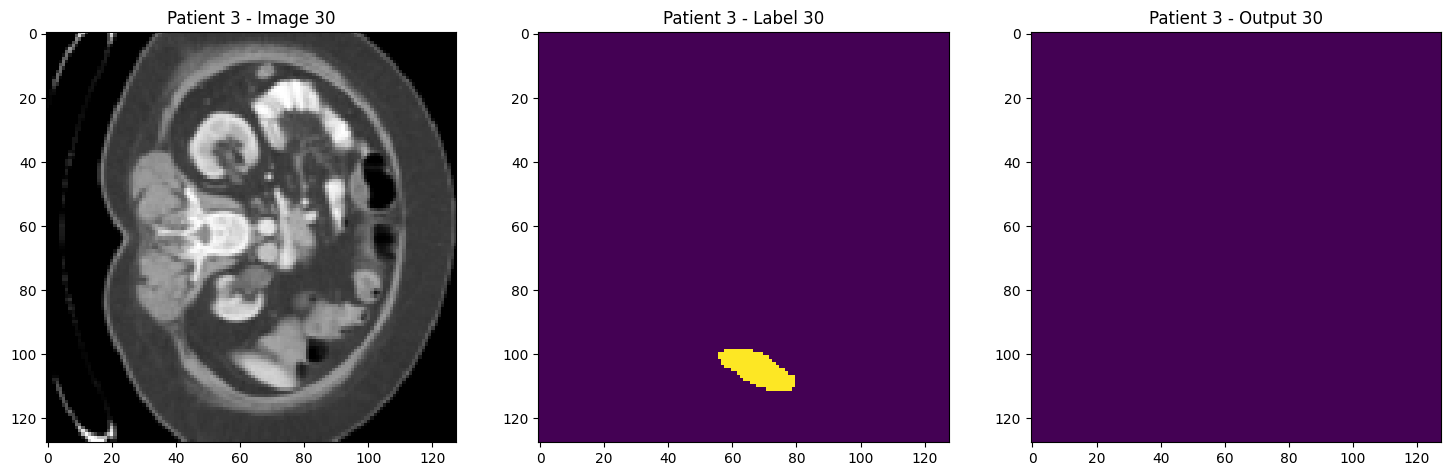

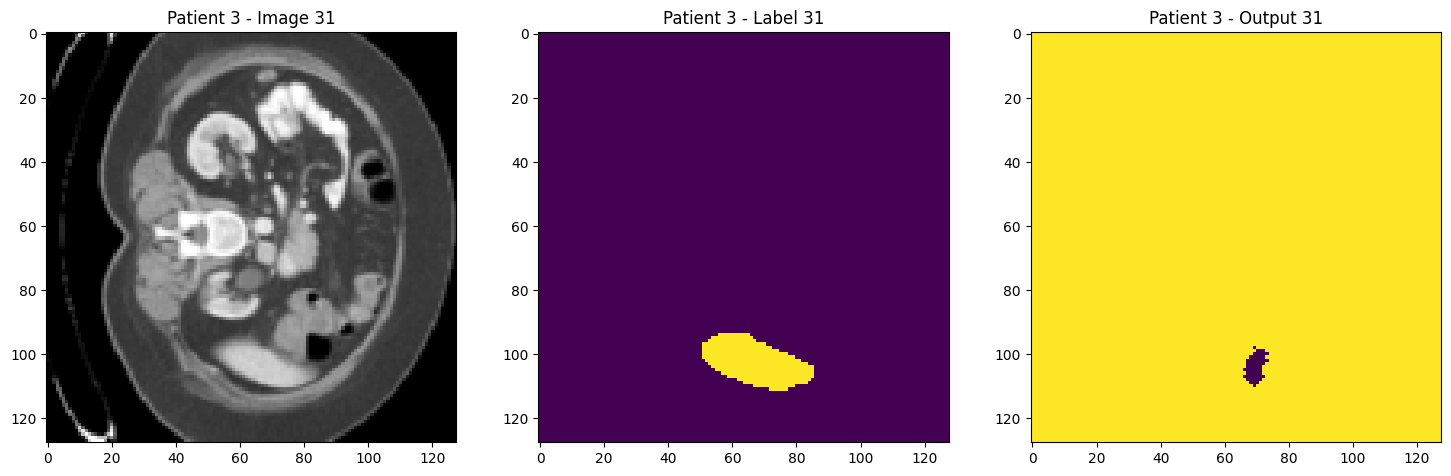

In [47]:
import torch
import matplotlib.pyplot as plt
from monai.inferers import sliding_window_inference
from monai.transforms import Activations

sw_batch_size = 4
roi_size = (128, 128, 64)

# Set model to evaluation mode (important to disable dropout, batch norm updates)
model.eval()

with torch.no_grad():
    for patient_idx, test_patient in enumerate(test_loader):  # ✅ Iterate through all patients
        print(f"Processing Patient {patient_idx+1}...")

        t_volume = test_patient['vol'].to(device)  # Move to GPU if available

        # Perform inference
        test_outputs = sliding_window_inference(t_volume, roi_size, sw_batch_size, model)
        
        # Apply sigmoid activation and threshold
        sigmoid_activation = Activations(sigmoid=True)
        test_outputs = sigmoid_activation(test_outputs)
        test_outputs = test_outputs > 0.53  # Convert to binary mask

        # ✅ Loop through slices for visualization
        num_slices = test_outputs.shape[-1]  # Get number of slices along the depth axis
        for i in range(min(32, num_slices)):  # Avoid index error if patient has fewer slices
            plt.figure(figsize=(18, 6))
            
            plt.subplot(1, 3, 1)
            plt.title(f"Patient {patient_idx+1} - Image {i}")
            plt.imshow(test_patient["vol"][0, 0, :, :, i].cpu(), cmap="gray")
            
            plt.subplot(1, 3, 2)
            plt.title(f"Patient {patient_idx+1} - Label {i}")
            plt.imshow(test_patient["seg"][0, 0, :, :, i].cpu() != 0)
            
            plt.subplot(1, 3, 3)
            plt.title(f"Patient {patient_idx+1} - Output {i}")
            plt.imshow(test_outputs.detach().cpu()[0, 0, :, :, i])
            
            plt.show()


# Save parameters

In [ ]:
import torch

# Define file path to save the model
model_path = "Liver_tumor/unet_model_v12.pth"

# Save model parameters
torch.save(model.state_dict(), model_path)

print(f"Model parameters saved to {model_path}")

# liver 1to 10 - > 400 (1e-5)
# liver 11 to 20 -> 400 (1e-5)
# liver 21to 60 -> 400 (1e-5)
# 60 to 80 -> 200 (1e-4)
# 80 to 90 -> 220 (1e-4)
# 90 to 100 -> 220 (1e-4)
# 100 to 110 -> 200 (1e-4) 11th done 12th is next pth
# 110 -> 115 (1e-4)


Model parameters saved to Liver_tumor/unet_model_v11.pth


In [42]:
!nvidia-smi

Tue Mar 25 19:09:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.70                 Driver Version: 572.70         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   62C    P8              5W /   75W |     507MiB /   4096MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [43]:
torch.cuda.empty_cache()

In [46]:
import numpy as np
seg_mask = test_patient["seg"][0, 0, :, :, 27].detach().cpu().numpy()
print(f"Unique labels in segmentation mask: {np.unique(seg_mask)}")


Unique labels in segmentation mask: [0.]
